In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Table of Contents
---

- [Basic Train Data Exploration](#Basic-Train-Data-Exploration)
- [Data Preprocessing](#Data-Preprocessing)
- [Data Visualization](#data-visualization)
    - [Daily CGM signal per subject](#daily-cgm-signal-per-subject)
- [Test Data](#test-data)
- [Key insights](#key-insights)

## Basic Train Data Exploration

In [2]:
# Sample data loading
data = pd.read_csv("../data/cgm_train.csv")

In [3]:
data

Subject ID  Day       Breakfast Time           Lunch Time  \
0             1    2  2021-09-19 08:41:00  2021-09-19 12:24:00   
1             1    3  2021-09-20 09:50:00  2021-09-20 15:20:00   
2             1    4  2021-09-21 09:34:00  2021-09-21 13:09:00   
3             1    5  2021-09-22 09:46:00  2021-09-22 13:50:00   
4             1    6  2021-09-23 09:07:00  2021-09-23 13:17:00   
..          ...  ...                  ...                  ...   
319           7    6  2021-12-18 08:52:00  2021-12-18 12:28:00   
320           7    7  2021-12-19 08:43:00  2021-12-19 13:13:00   
321           7    8  2021-12-20 09:06:00  2021-12-20 12:46:00   
322           7    9  2021-12-21 08:34:00  2021-12-21 12:38:00   
323           7   10  2021-12-22 08:44:00  2021-12-22 12:34:00   

                                              CGM Data  
0    [('2021-09-19 08:20:00', 98.26666666666667), (...  
1    [('2021-09-20 09:10:00', 97.18333333333334), (...  
2    [('2021-09-21 09:20:00', 107.36666666666666), ...  
3    [('2021-09-22 09:25:00', 107.28333333333333), ...  
4    [('2021-09-23 08:55:00', 103.0), ('2021-09-23 ...  
..                                                 ...  
319  [('2021-12-18 08:50:00', 101.36), ('2021-12-18...  
320  [('2021-12-19 08:40:00', 100.68), ('2021-12-19...  
321  [('2021-12-20 09:00:00', 104.04), ('2021-12-20...  
322  [('2021-12-21 08:25:00', 96.4), ('2021-12-21 0...  
323  [('2021-12-22 08:35:00', 96.68), ('2021-12-22 ...  

[324 rows x 5 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Subject ID      324 non-null    int64 
 1   Day             324 non-null    int64 
 2   Breakfast Time  324 non-null    object
 3   Lunch Time      324 non-null    object
 4   CGM Data        324 non-null    object
dtypes: int64(2), object(3)
memory usage: 12.8+ KB


### Convert strings to datetimes

In [5]:
data_copy = data.copy()

data['Breakfast Time'] = pd.to_datetime(data['Breakfast Time'], errors='coerce')
data['Lunch Time'] = pd.to_datetime(data['Lunch Time'], errors='coerce')


In [6]:
invalid_date_indices = data.index[data['Breakfast Time'].isna() | data['Lunch Time'].isna()].tolist()

# Display the indices
print(invalid_date_indices)

[52, 88, 97, 107, 110, 121, 139, 172, 176, 187, 189, 195, 198, 201, 217, 220, 221, 223, 224, 225, 234, 238, 241, 243, 244, 252, 268, 272, 274, 275, 276, 277, 278, 280, 284, 289, 294, 295, 296, 298, 301, 311, 314]


Some people didn't record the breakfast and lunch time. 

In [7]:
data_copy.loc[invalid_date_indices]

Subject ID  Day       Breakfast Time           Lunch Time  \
52            8    9                   {}  2021-12-21 12:45:00   
88           12    9                   {}  2022-03-02 14:55:00   
97           13    9                   {}  2022-03-12 12:39:00   
107          14   10                   {}  2022-04-08 12:48:00   
110          15    4  2022-04-02 09:26:00                   {}   
121          16    6  2022-04-07 07:53:00                   {}   
139          19    6                   {}  2022-04-21 14:05:00   
172          26    3                   {}  2022-08-08 12:58:00   
176          26    7  2022-08-12 09:07:00                   {}   
187          28    9  2022-08-24 09:10:10                   {}   
189          29    2                   {}  2022-09-29 11:56:25   
195          29    8  2022-10-05 06:21:46                   {}   
198          30    2                   {}  2022-12-01 14:05:45   
201          30    5                   {}  2022-12-04 12:33:50   
217          32    3                   {}                   {}   
220          32    6                   {}  2023-07-10 13:09:37   
221          32    7  2023-07-11 07:14:43                   {}   
223          32    9  2023-07-13 05:57:06                   {}   
224          32   10                   {}  2023-07-14 14:12:48   
225          33    2                   {}                   {}   
234          35    2                   {}  2023-08-25 12:49:44   
238          35    6  2023-08-29 06:44:49                   {}   
241          35    9  2023-09-01 07:37:01                   {}   
243          36    2                   {}  2023-08-31 12:14:53   
244          36    3                   {}  2023-09-01 11:59:45   
252          38    2                   {}  2023-12-10 12:00:25   
268          41    9  2023-12-05 08:10:52                   {}   
272          42    4  2023-12-02 10:10:02                   {}   
274          42    6  2023-12-04 08:39:38                   {}   
275          42    7  2023-12-05 10:02:09                   {}   
276          42    8                   {}                   {}   
277          42    9                   {}  2023-12-07 13:11:17   
278          42   10                   {}                   {}   
280          44    3                   {}  2024-01-05 13:00:04   
284          44    7                   {}                   {}   
289          45    3                   {}                   {}   
294          45    8  2024-01-31 09:21:56                   {}   
295          45    9  2024-02-01 10:03:19                   {}   
296          45   10  2024-02-02 09:07:46                   {}   
298          48    3                   {}                   {}   
301          48    6  2024-02-14 07:35:41                   {}   
311          49    7                   {}  2024-03-05 12:16:15   
314          49   10                   {}  2024-03-08 13:10:28   

                                              CGM Data  
52   [('2021-12-21 08:10:00', 124.58), ('2021-12-21...  
88   [('2022-03-02 11:00:00', 139.04), ('2022-03-02...  
97   [('2022-03-12 12:40:00', 103.0), ('2022-03-12 ...  
107  [('2022-04-08 08:15:00', 131.58), ('2022-04-08...  
110  [('2022-04-02 09:20:00', 105.0), ('2022-04-02 ...  
121  [('2022-04-07 07:45:00', 110.23666666666666), ...  
139  [('2022-04-21 13:30:00', 117.0), ('2022-04-21 ...  
172  [('2022-08-08 12:45:00', 116.0), ('2022-08-08 ...  
176                                                 []  
187  [('2022-08-24 09:00:00', 143.28), ('2022-08-24...  
189  [('2022-09-29 05:45:00', 131.68), ('2022-09-29...  
195  [('2022-10-05 06:20:00', 106.77333333333333), ...  
198  [('2022-12-01 11:50:00', 140.8), ('2022-12-01 ...  
201  [('2022-12-04 12:00:00', 219.25), ('2022-12-04...  
217                                                 []  
220  [('2023-07-10 04:25:00', 108.62666666666667), ...  
221  [('2023-07-11 07:05:00', 119.94666666666667), ...  
223  [('2023-07-13 05:35:00', 92.12), ('2023-07-13 ...  
224  [('2023-07-1

In [8]:
data["Subject ID"].nunique()

36

In [9]:
data["Subject ID"].value_counts()

Subject ID
1     9
2     9
3     9
5     9
6     9
8     9
9     9
10    9
11    9
12    9
13    9
14    9
15    9
16    9
17    9
19    9
20    9
22    9
23    9
26    9
28    9
29    9
30    9
31    9
32    9
33    9
35    9
36    9
38    9
41    9
42    9
44    9
45    9
48    9
49    9
7     9
Name: count, dtype: int64

We have 36 subject recorded their CGM data for 9 days.

In [10]:
data.columns

Index(['Subject ID', 'Day', 'Breakfast Time', 'Lunch Time', 'CGM Data'], dtype='object')

## Data Preprocessing

To make plotting easier, the original dataframe is expanded to have row for each cgm reading. 

In [11]:
data_expanded = []

# Loop through each row to expand 'CGM Data'
for _, row in data.iterrows():
    subject_id = row['Subject ID']
    day = row['Day']
    breakfast_time = row['Breakfast Time']
    lunch_time = row['Lunch Time']
    
    # Parse CGM data
    cgm_data = ast.literal_eval(row['CGM Data'])  # Convert string to list of tuples
    
    # Expand each CGM entry into a new row
    for timestamp, cgm_reading in cgm_data:
        data_expanded.append({
            'Subject ID': subject_id,
            'Day': day,
            'Breakfast Time': breakfast_time,
            'Lunch Time': lunch_time,
            'Timestamp': timestamp,
            'CGM Reading': cgm_reading
        })

# Create a new DataFrame from the expanded data
expanded_df = pd.DataFrame(data_expanded)

# Convert `Timestamp` and `CGM Reading` to appropriate types, if necessary
expanded_df['Timestamp'] = pd.to_datetime(expanded_df['Timestamp'])
expanded_df['CGM Reading'] = pd.to_numeric(expanded_df['CGM Reading'], errors='coerce')

# Display the expanded DataFrame
expanded_df.head()

Subject ID  Day      Breakfast Time          Lunch Time  \
0           1    2 2021-09-19 08:41:00 2021-09-19 12:24:00   
1           1    2 2021-09-19 08:41:00 2021-09-19 12:24:00   
2           1    2 2021-09-19 08:41:00 2021-09-19 12:24:00   
3           1    2 2021-09-19 08:41:00 2021-09-19 12:24:00   
4           1    2 2021-09-19 08:41:00 2021-09-19 12:24:00   

            Timestamp  CGM Reading  
0 2021-09-19 08:20:00    98.266667  
1 2021-09-19 08:25:00    95.183333  
2 2021-09-19 08:30:00    97.283333  
3 2021-09-19 08:35:00   106.116667  
4 2021-09-19 08:40:00   121.650000

In [12]:
expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29166 entries, 0 to 29165
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Subject ID      29166 non-null  int64         
 1   Day             29166 non-null  int64         
 2   Breakfast Time  27579 non-null  datetime64[ns]
 3   Lunch Time      27866 non-null  datetime64[ns]
 4   Timestamp       29166 non-null  datetime64[ns]
 5   CGM Reading     29166 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(2)
memory usage: 1.3 MB


In [13]:
expanded_df.shape

(29166, 6)

In [14]:
def process_df(data):
    data['Breakfast Time'] = pd.to_datetime(data['Breakfast Time'], errors='coerce')
    data['Lunch Time'] = pd.to_datetime(data['Lunch Time'], errors='coerce')
    data_expanded = []

    # Loop through each row to expand 'CGM Data'
    for _, row in data.iterrows():
        subject_id = row['Subject ID']
        day = row['Day']
        breakfast_time = row['Breakfast Time']
        lunch_time = row['Lunch Time']
        
        # Parse CGM data
        cgm_data = ast.literal_eval(row['CGM Data'])  # Convert string to list of tuples
        
        # Expand each CGM entry into a new row
        for timestamp, cgm_reading in cgm_data:
            data_expanded.append({
                'Subject ID': subject_id,
                'Day': day,
                'Breakfast Time': breakfast_time,
                'Lunch Time': lunch_time,
                'Timestamp': timestamp,
                'CGM Reading': cgm_reading
            })

    # Create a new DataFrame from the expanded data
    expanded_df = pd.DataFrame(data_expanded)

    # Convert `Timestamp` and `CGM Reading` to appropriate types, if necessary
    expanded_df['Timestamp'] = pd.to_datetime(expanded_df['Timestamp'])
    expanded_df['CGM Reading'] = pd.to_numeric(expanded_df['CGM Reading'], errors='coerce')

    return expanded_df

## Data Visualization

### Daily CGM signal per subject

In [15]:
def plot_cgm_daily_for_subject(data, subject_id):
    """
    Plot daily CGM signal for a specific Subject ID with optimized x-axis limits, dotted lines for meal times, 
    and actual dates in subplot titles.
    
    Parameters:
    - data: DataFrame with columns ['Subject ID', 'Day', 'Breakfast Time', 'Lunch Time', 'Timestamp', 'CGM Reading']
    - subject_id: ID of the subject to plot data for
    """
    
    # Filter data for the specific Subject ID
    subject_data = data[data['Subject ID'] == subject_id]
    
    # Initialize the figure with 9 subplots for 9 days
    fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharey=True)
    fig.suptitle(f"Daily CGM Signal for Subject {subject_id}", fontsize=16)
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    # Loop through each day and create a subplot
    for i, day in enumerate(subject_data['Day'].unique()):
        day_data = subject_data[subject_data['Day'] == day]
        ax = axes[i]
        
        # Plot CGM data
        ax.plot(day_data['Timestamp'], day_data['CGM Reading'], color='blue', label='CGM Reading')
        
        # Set x-axis to data range to avoid full-day plotting
        start_time = day_data['Timestamp'].min() - pd.Timedelta(minutes=10)
        end_time = day_data['Timestamp'].max() + pd.Timedelta(minutes=10)
        ax.set_xlim(start_time, end_time)
        
        # Get the actual date
        actual_date = day_data['Timestamp'].dt.date.iloc[0]
        
        # Add dotted line for Breakfast Time if available
        breakfast_time = day_data['Breakfast Time'].iloc[0] if pd.notnull(day_data['Breakfast Time'].iloc[0]) else None
        if breakfast_time:
            ax.axvline(breakfast_time, color='orange', linestyle='--', label='Breakfast Time')
        
        # Add dotted line for Lunch Time if available
        lunch_time = day_data['Lunch Time'].iloc[0] if pd.notnull(day_data['Lunch Time'].iloc[0]) else None
        if lunch_time:
            ax.axvline(lunch_time, color='green', linestyle='--', label='Lunch Time')
        
        # Title and labels for each subplot, including the actual date
        ax.set_title(f"Day {day} - {actual_date}", fontsize=12)
        ax.set_xlabel("Time", fontsize=10)
        ax.set_ylabel("CGM Reading", fontsize=10)
        
        # Optimize x-axis tick formatting for a narrower time window
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks every hour
        ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))  # Set minor ticks every 15 minutes
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for readability

    # Remove empty subplots if there are fewer than 9 days
    for j in range(i + 1, 9):
        fig.delaxes(axes[j])

    # Adjust layout and add a legend to the first subplot
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.05))
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    plt.show()

In [16]:
expanded_df["Subject ID"].unique()

array([ 1,  2,  3,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20,
       22, 23, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 41, 42, 44, 45, 48,
       49,  7])

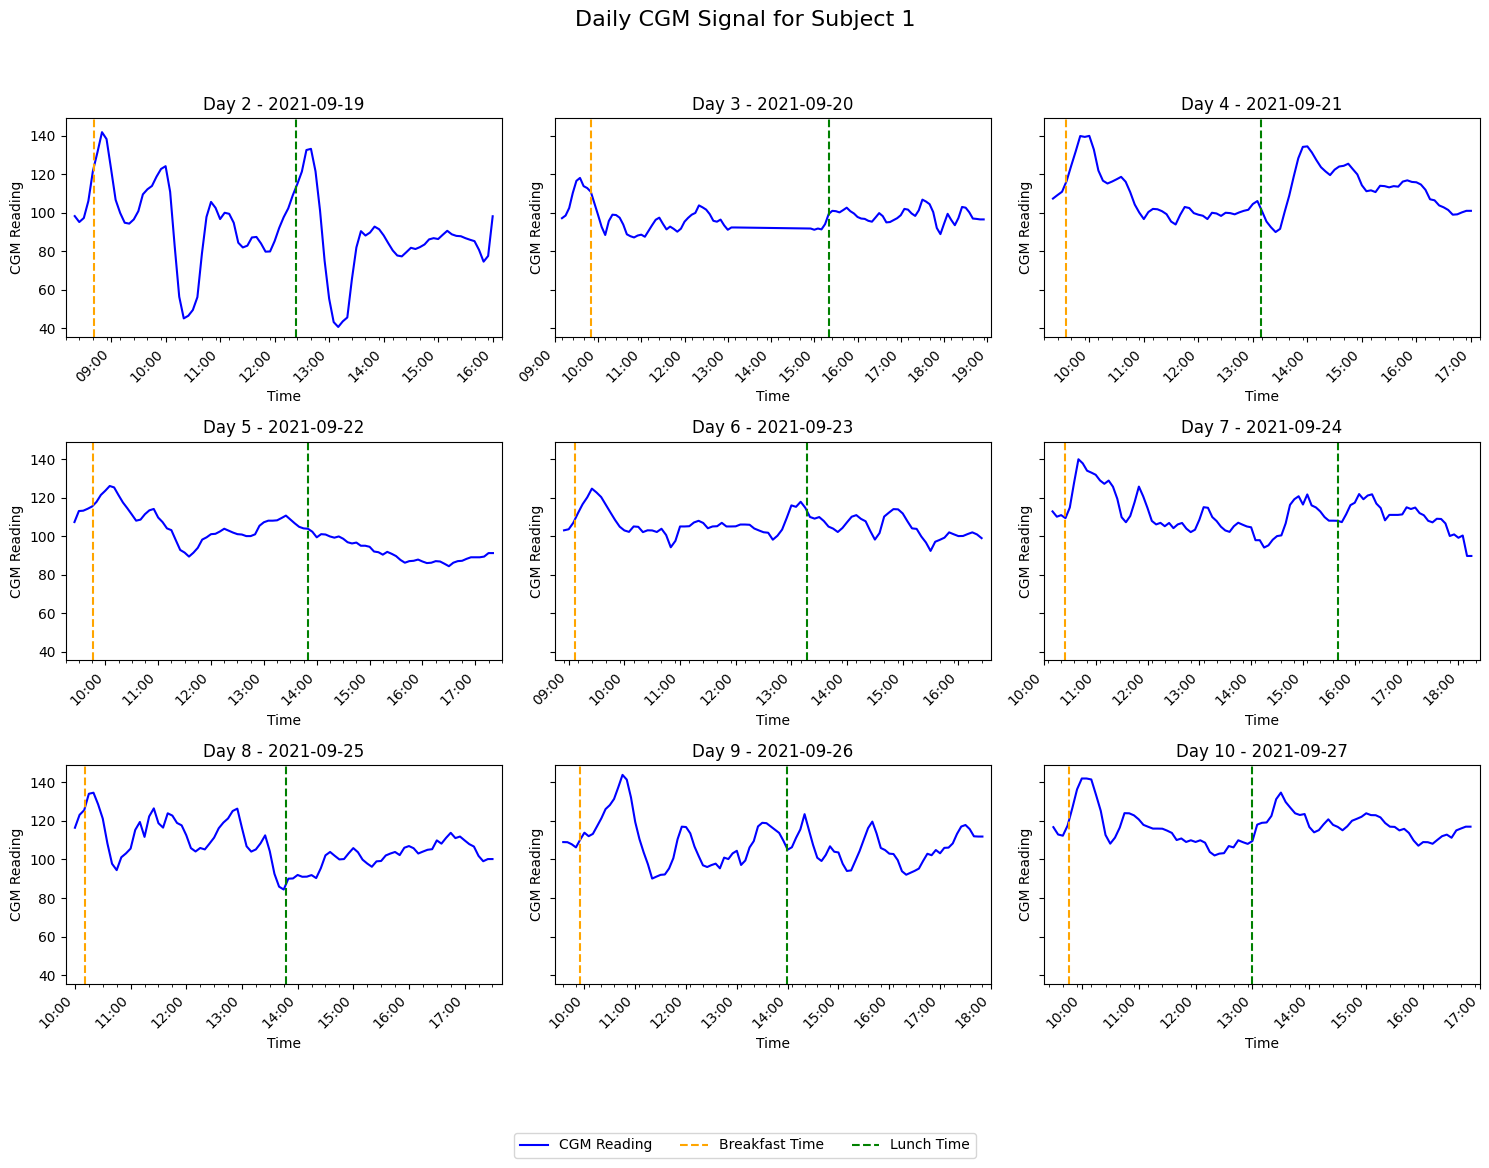

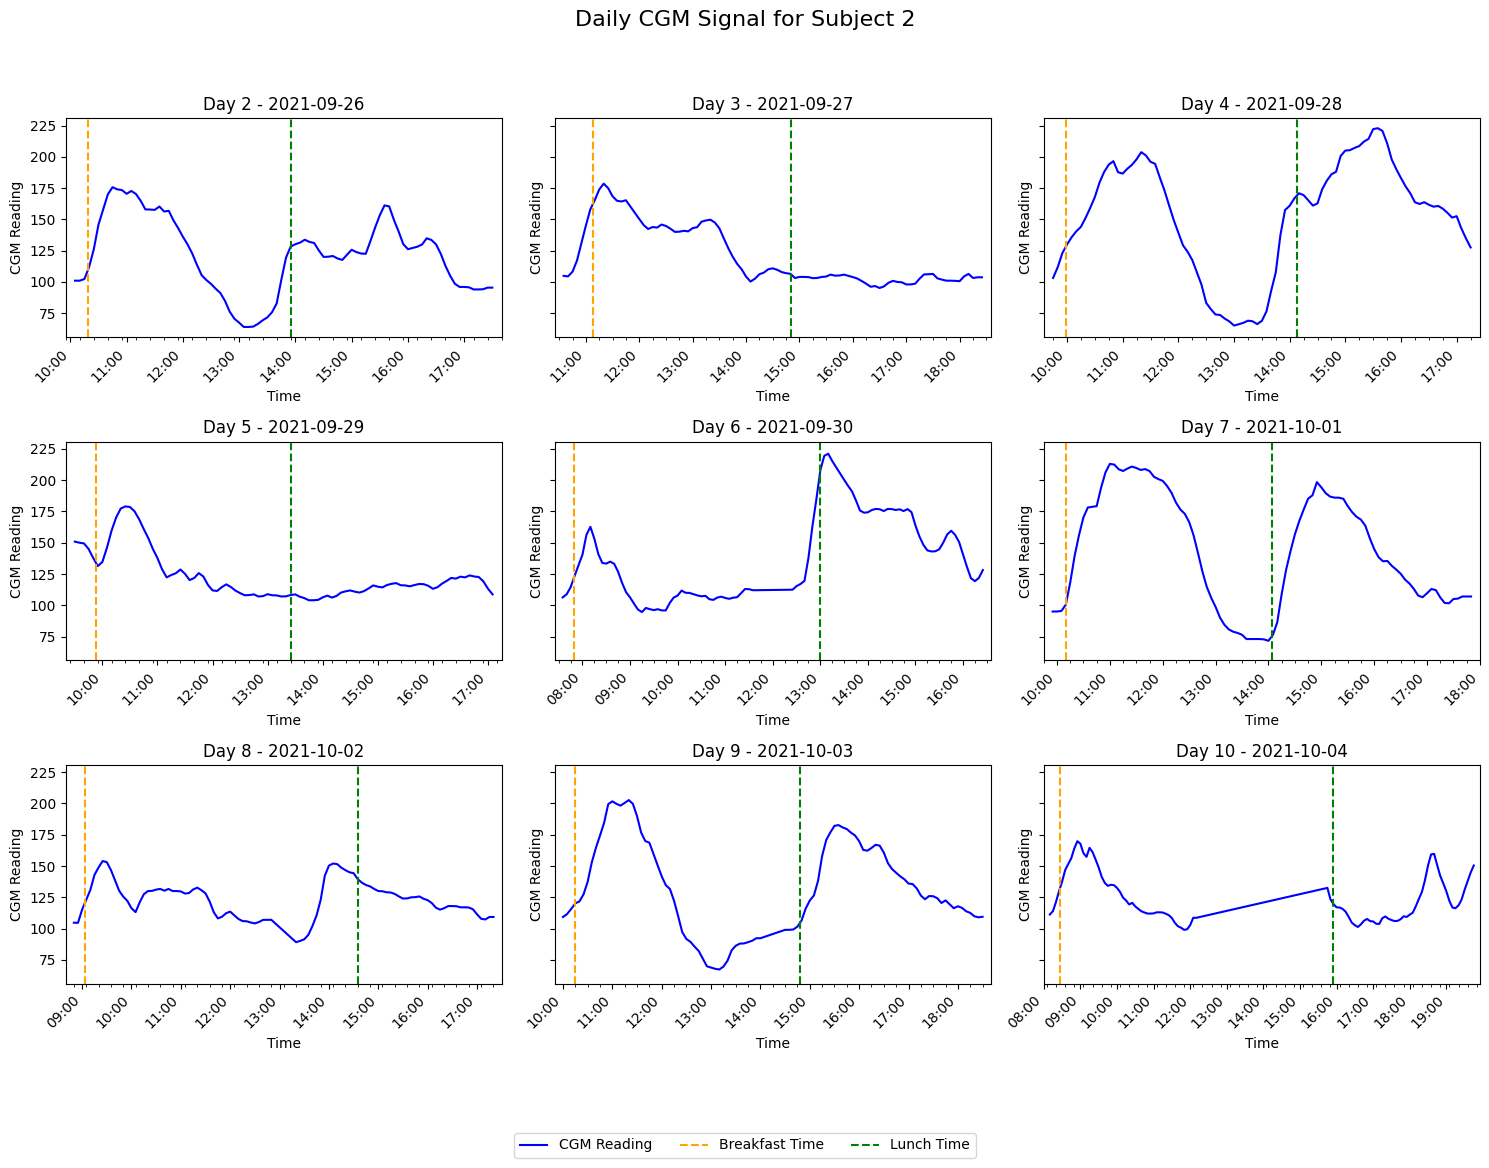

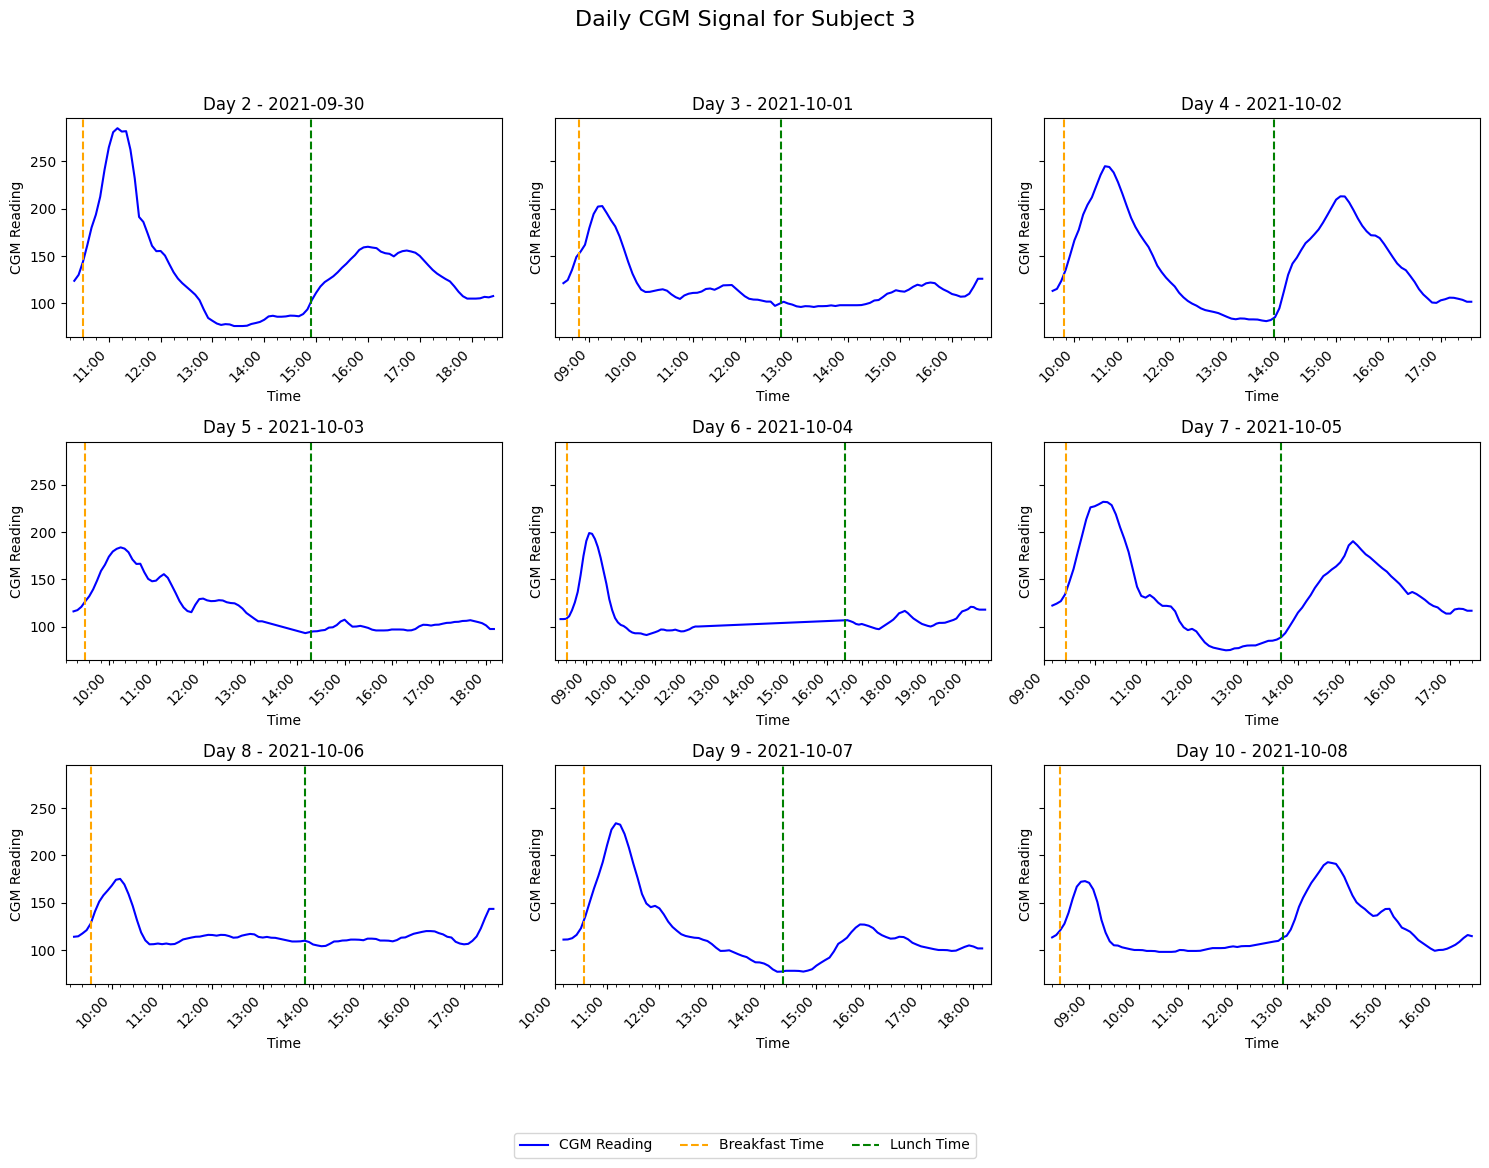

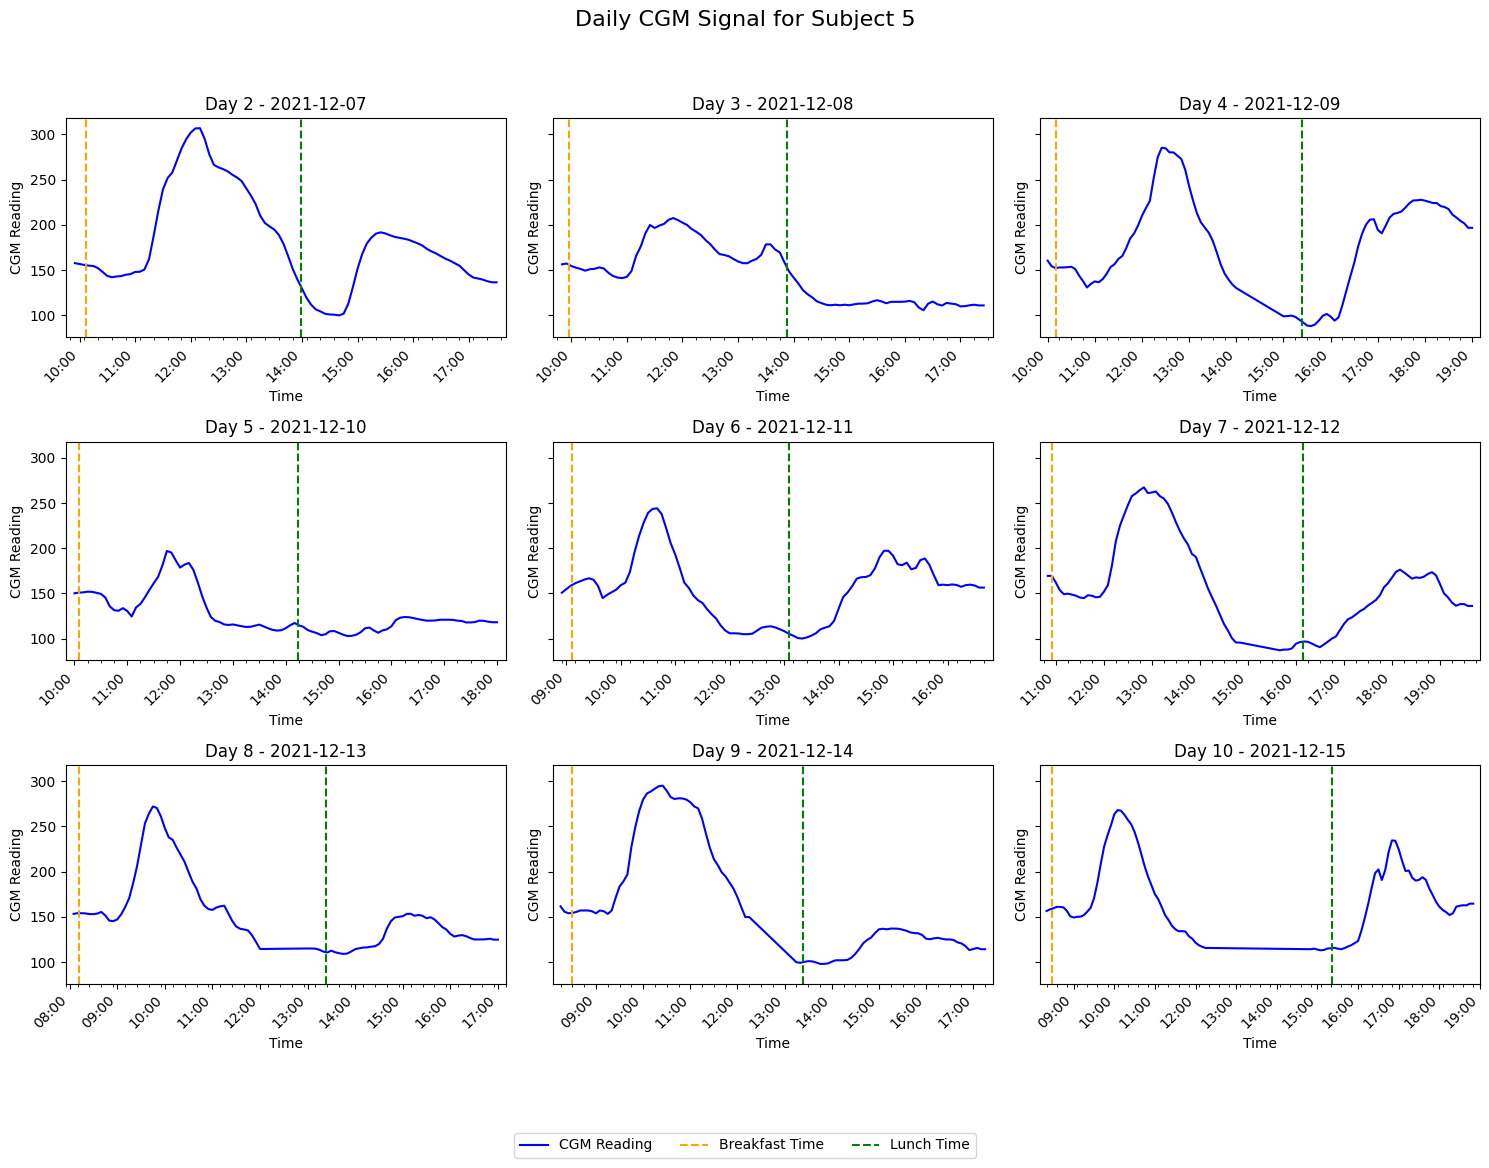

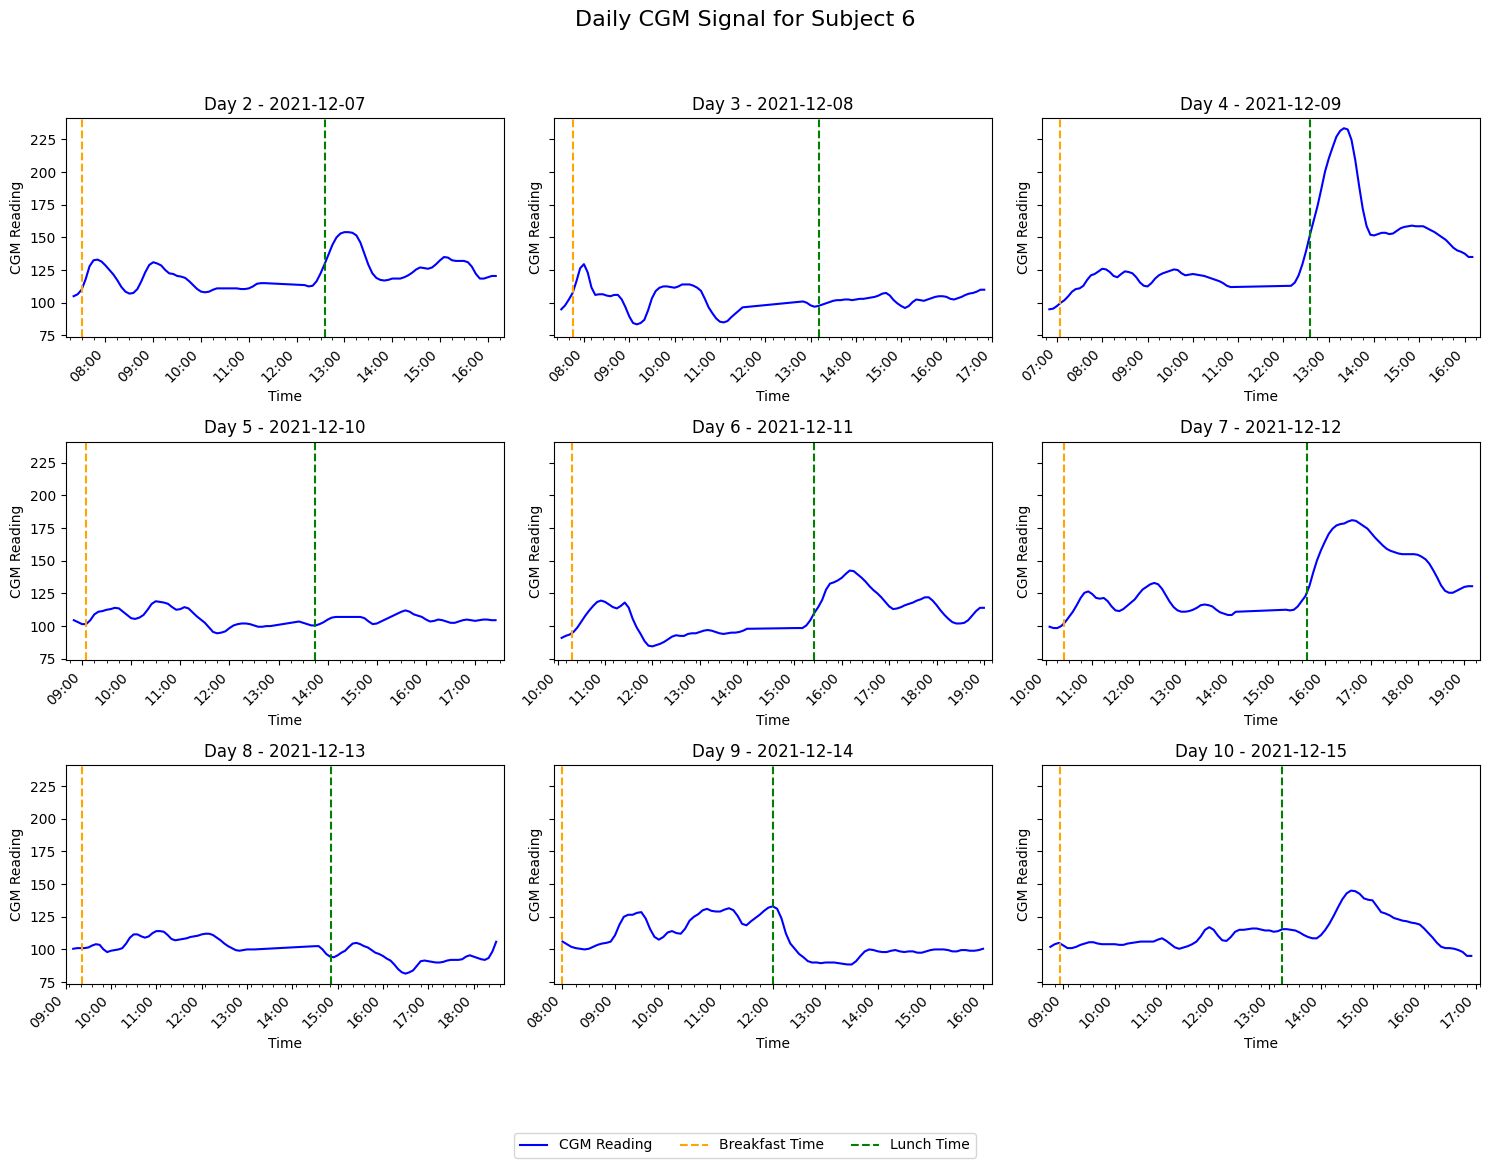

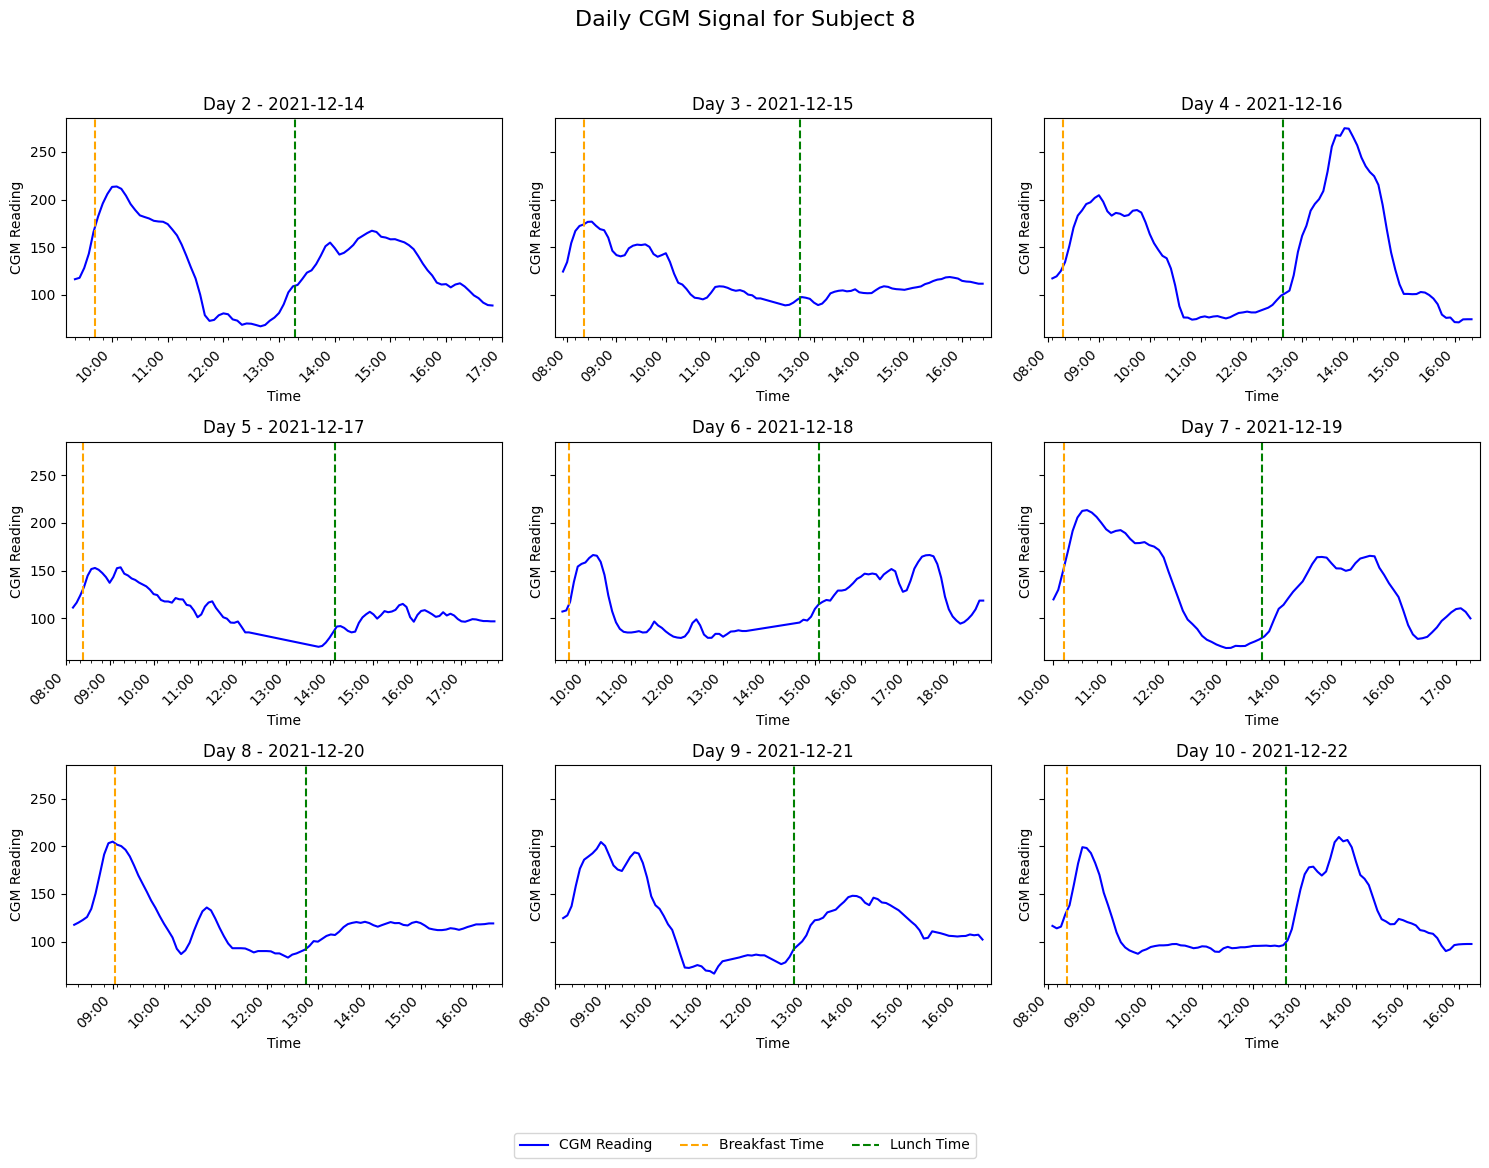

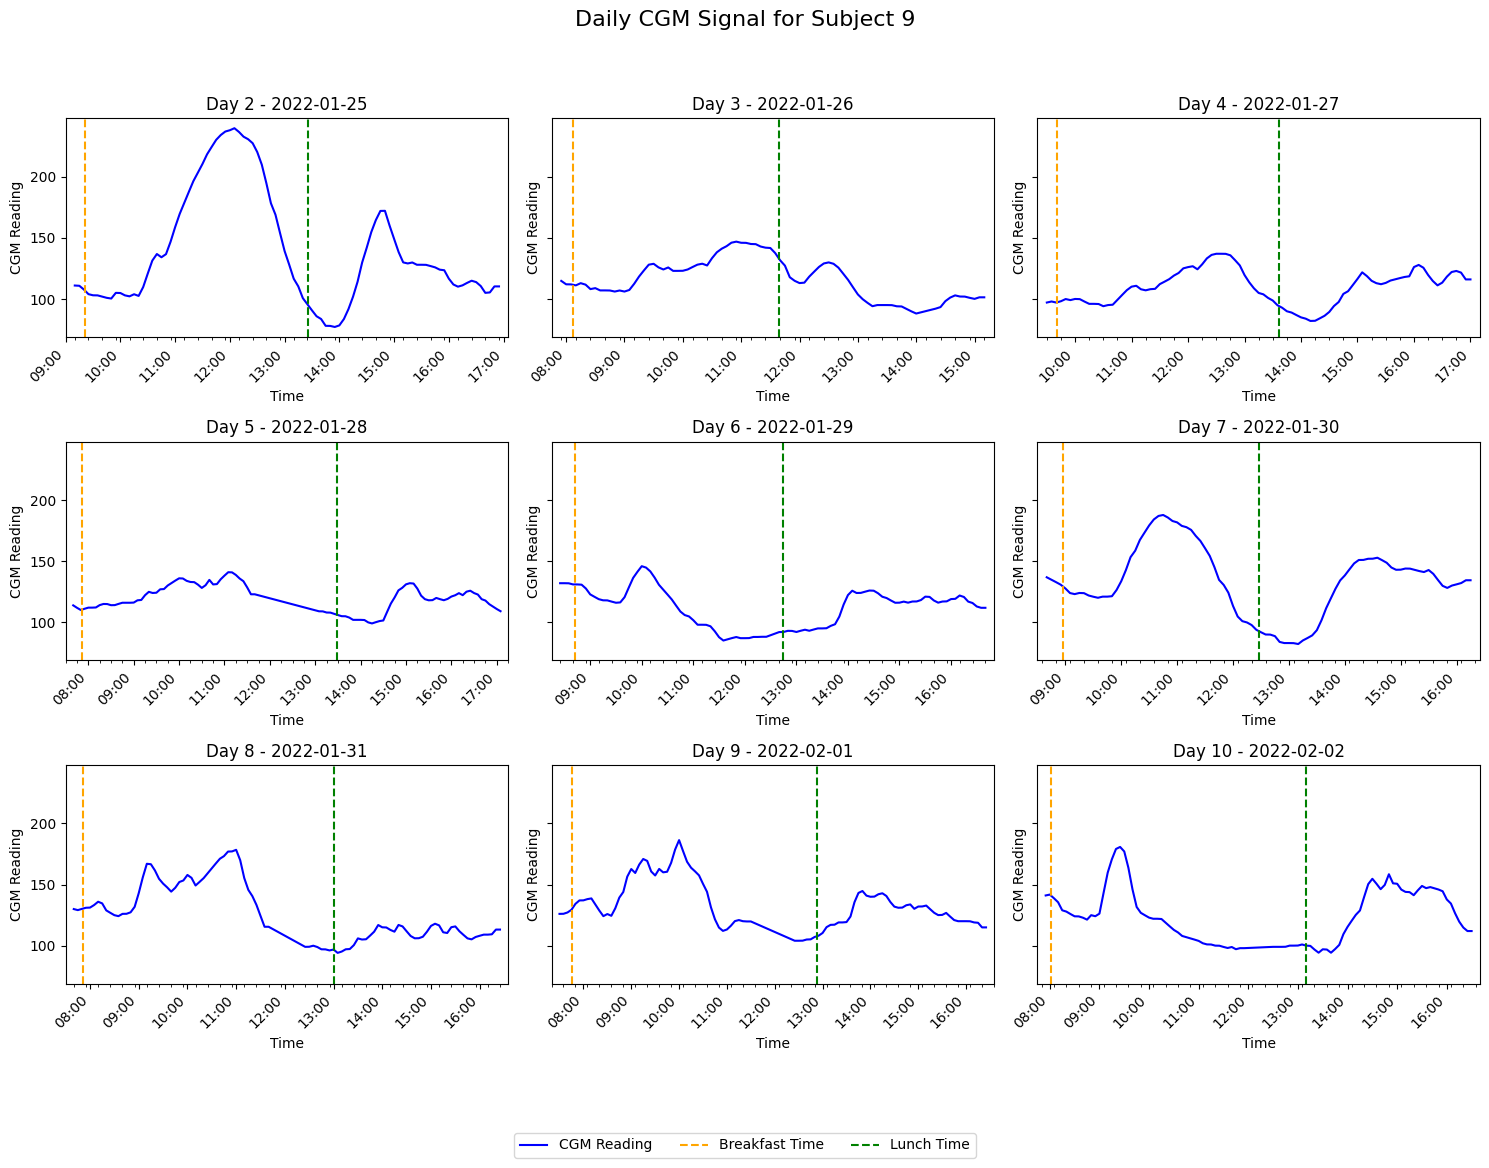

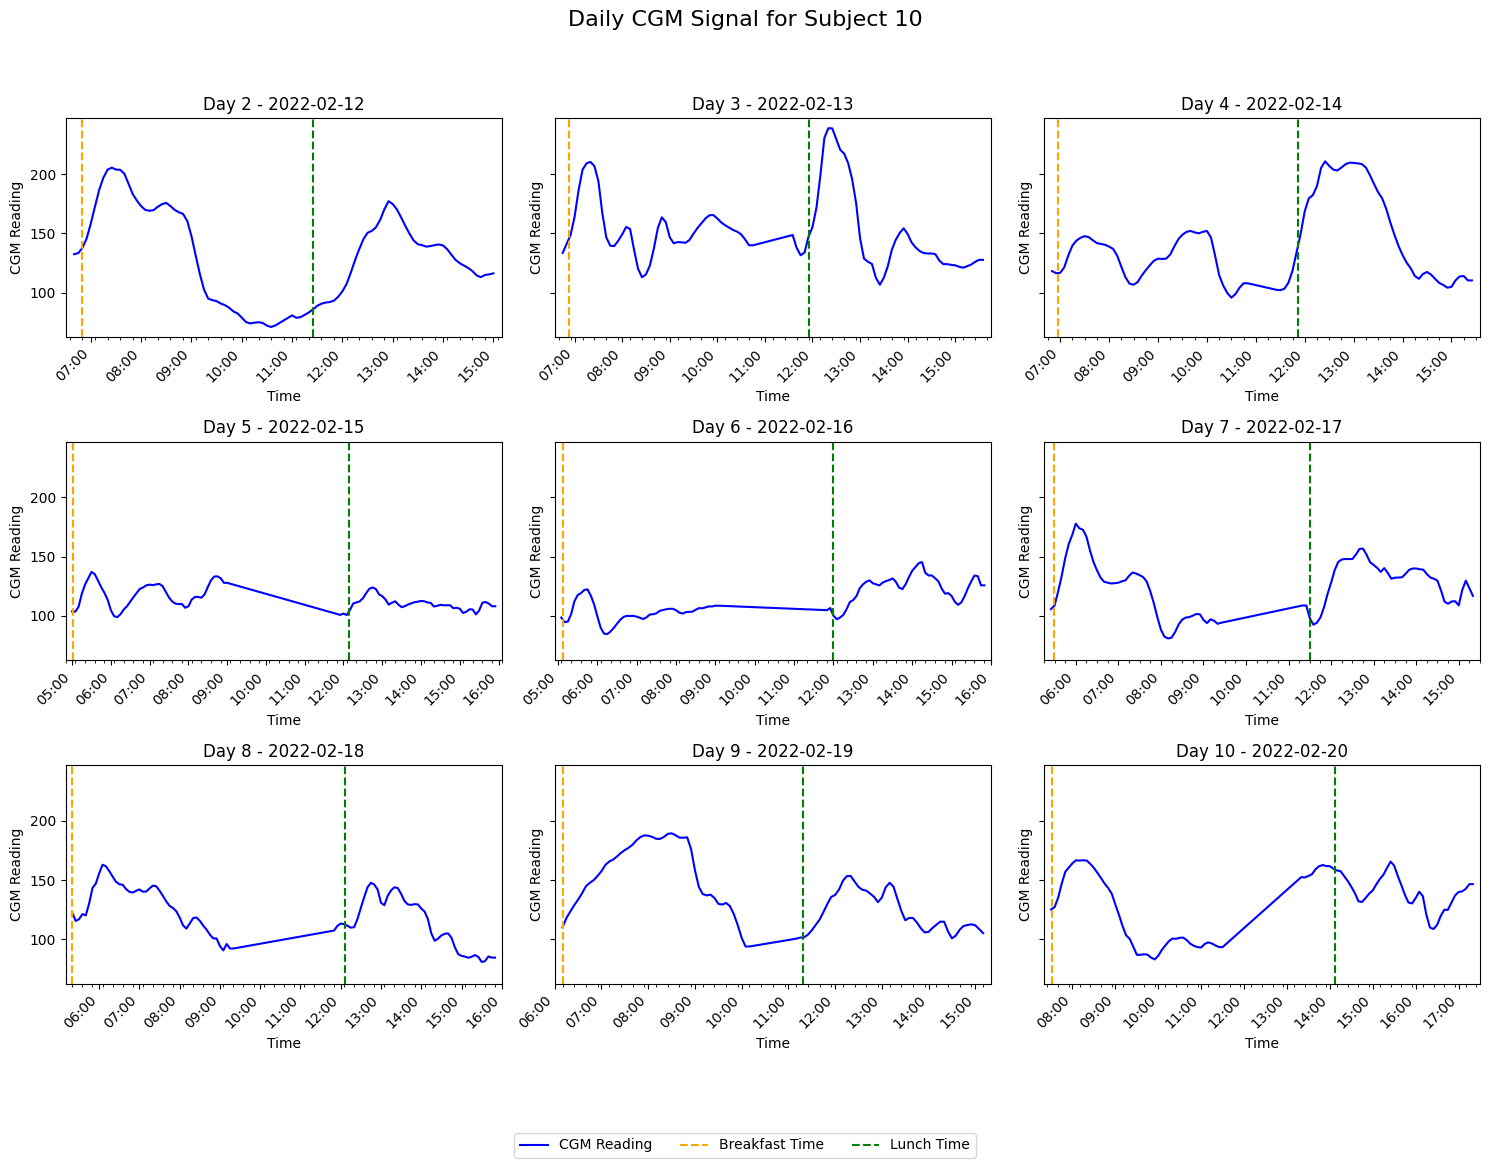

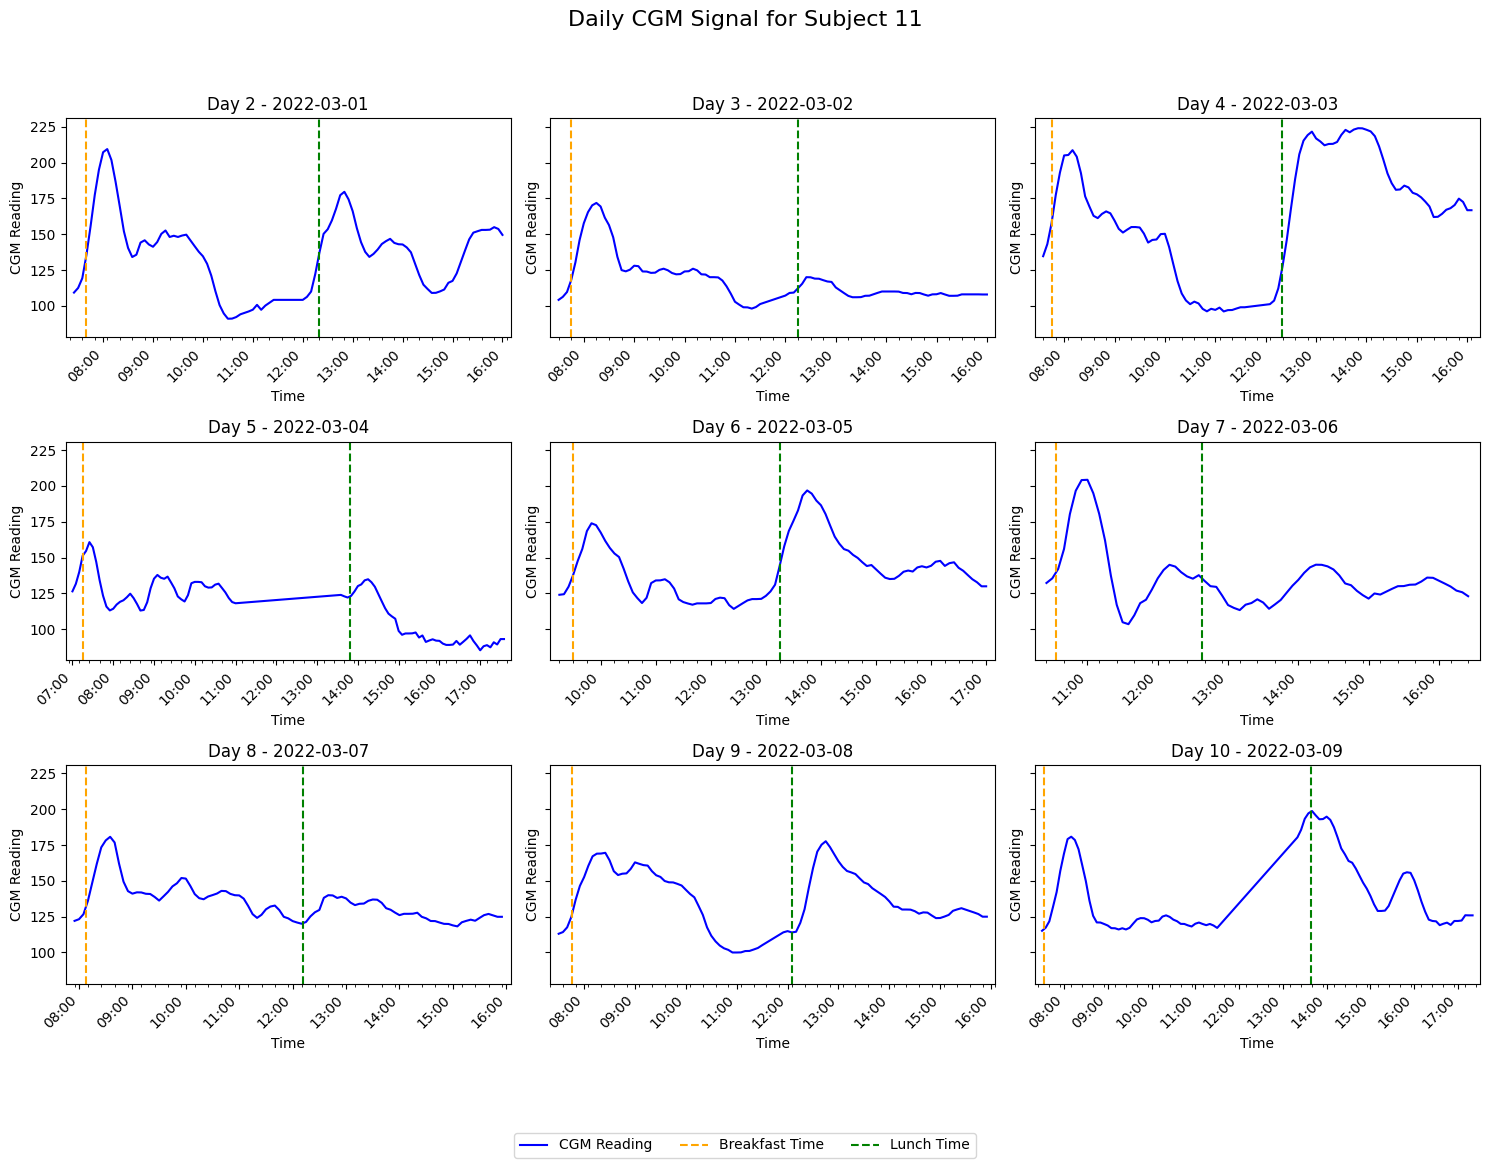

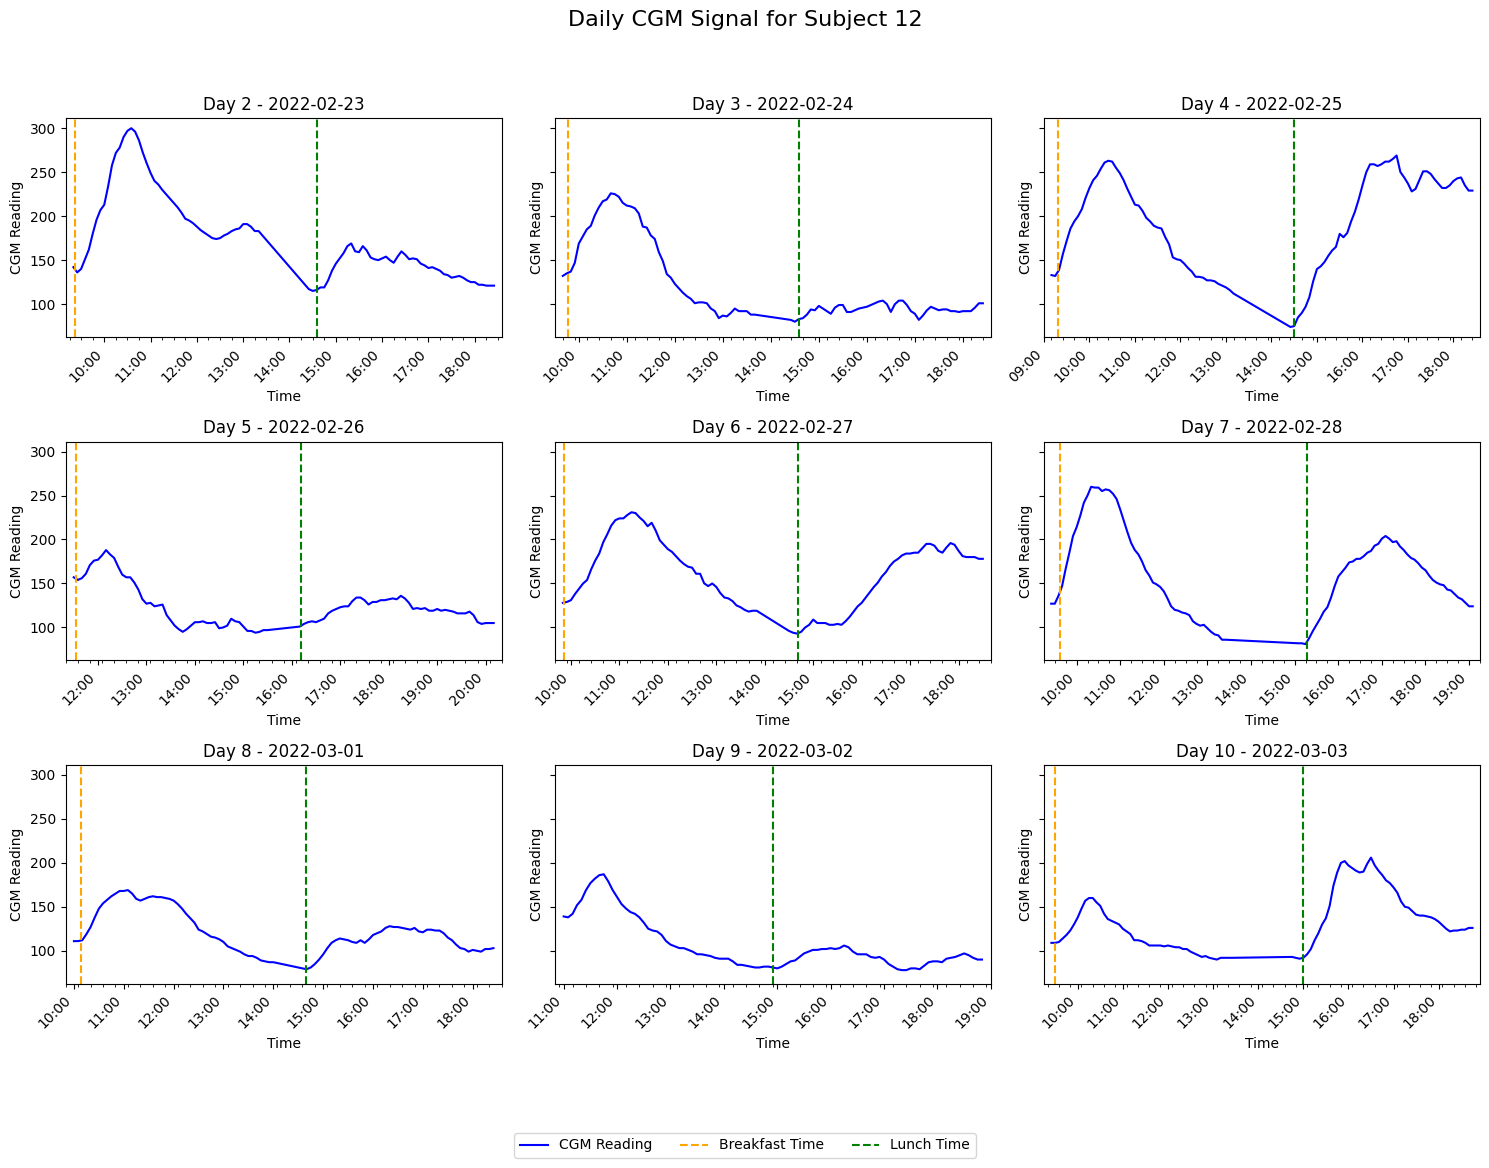

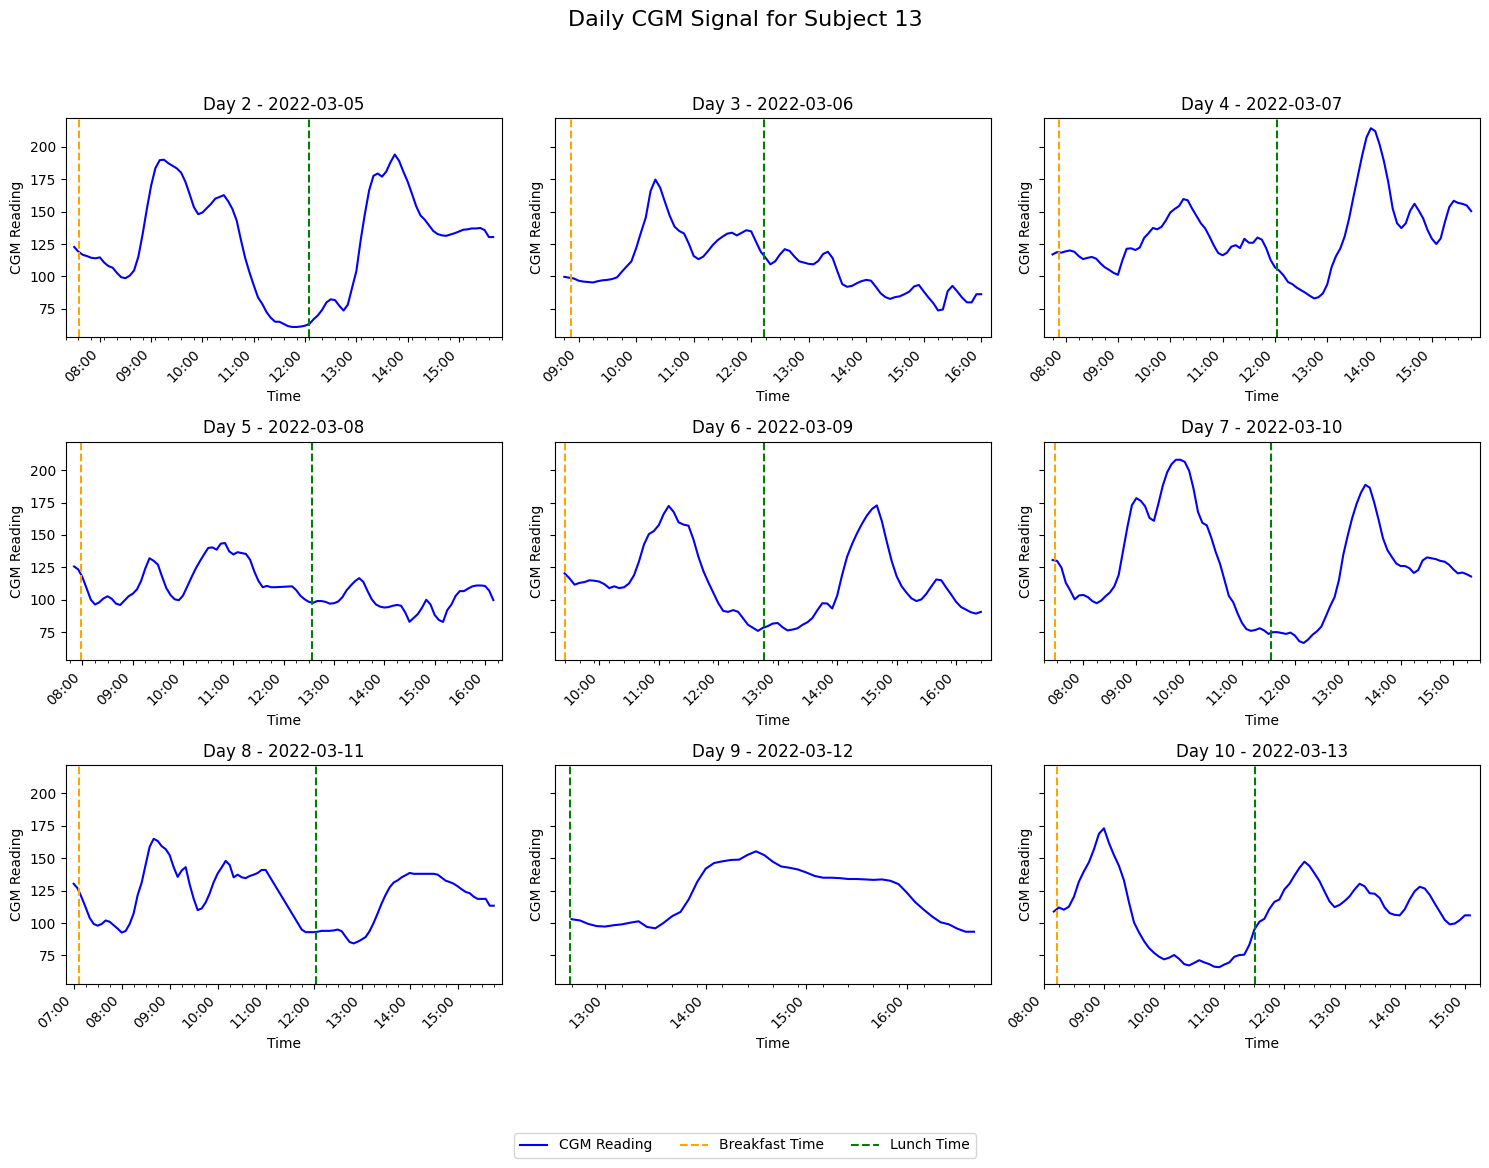

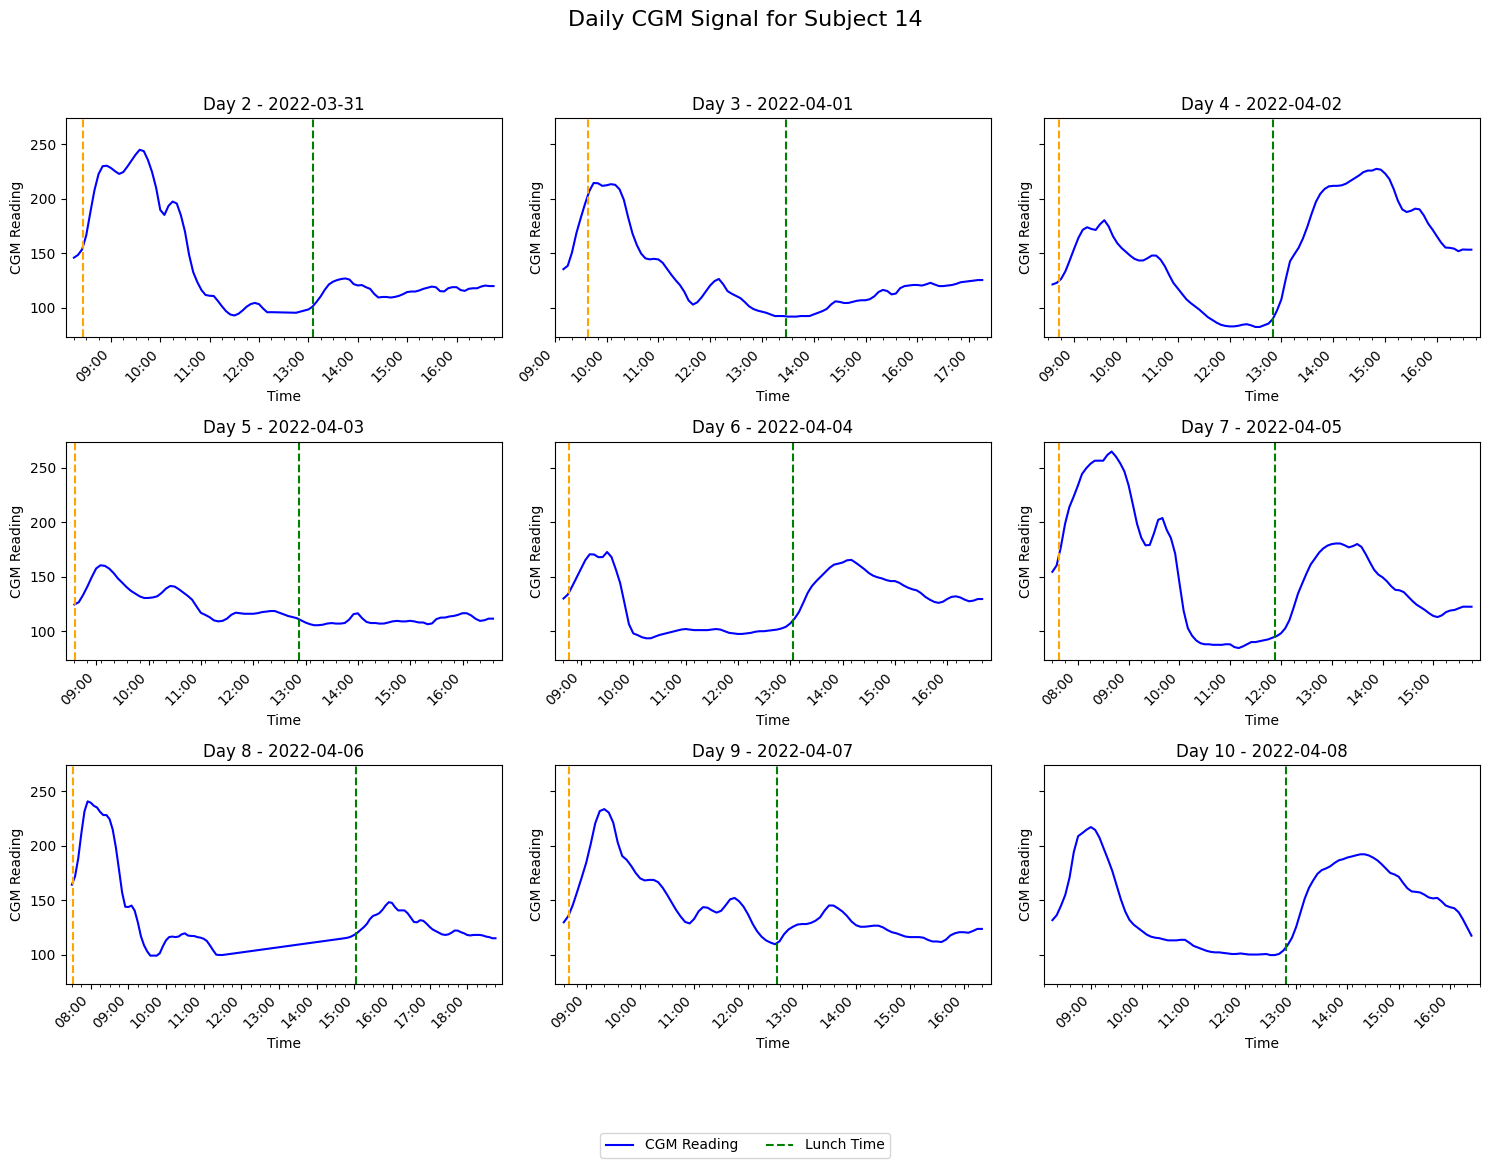

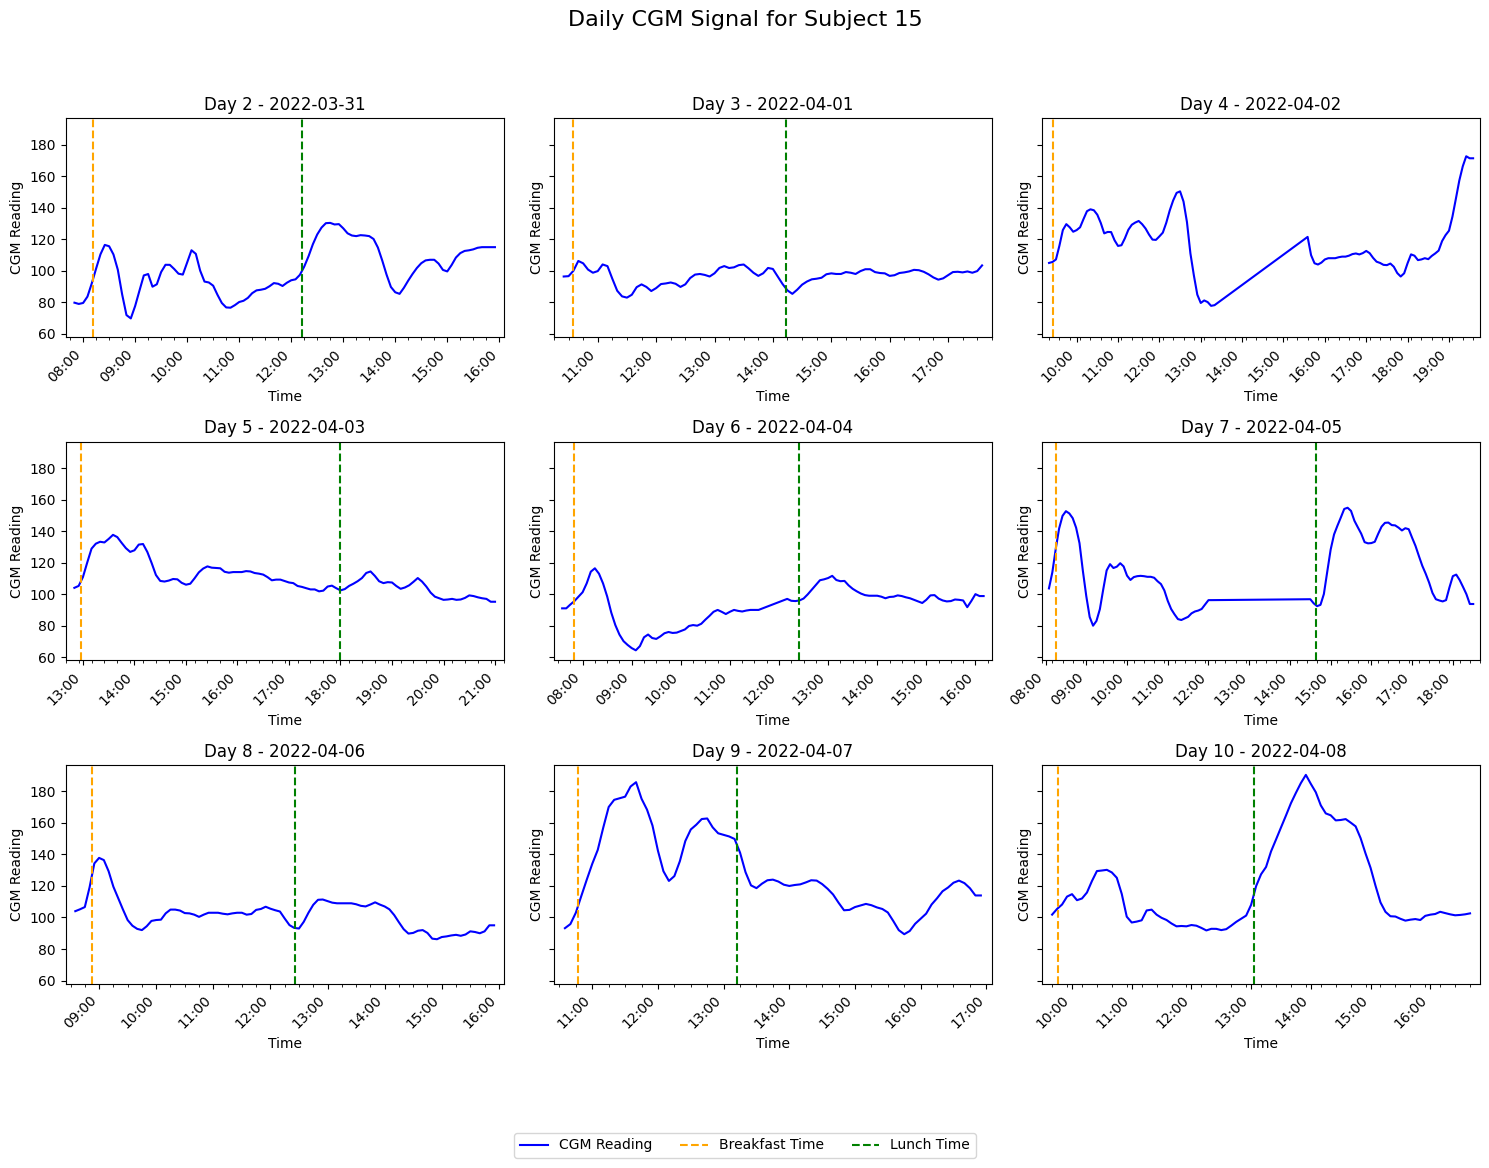

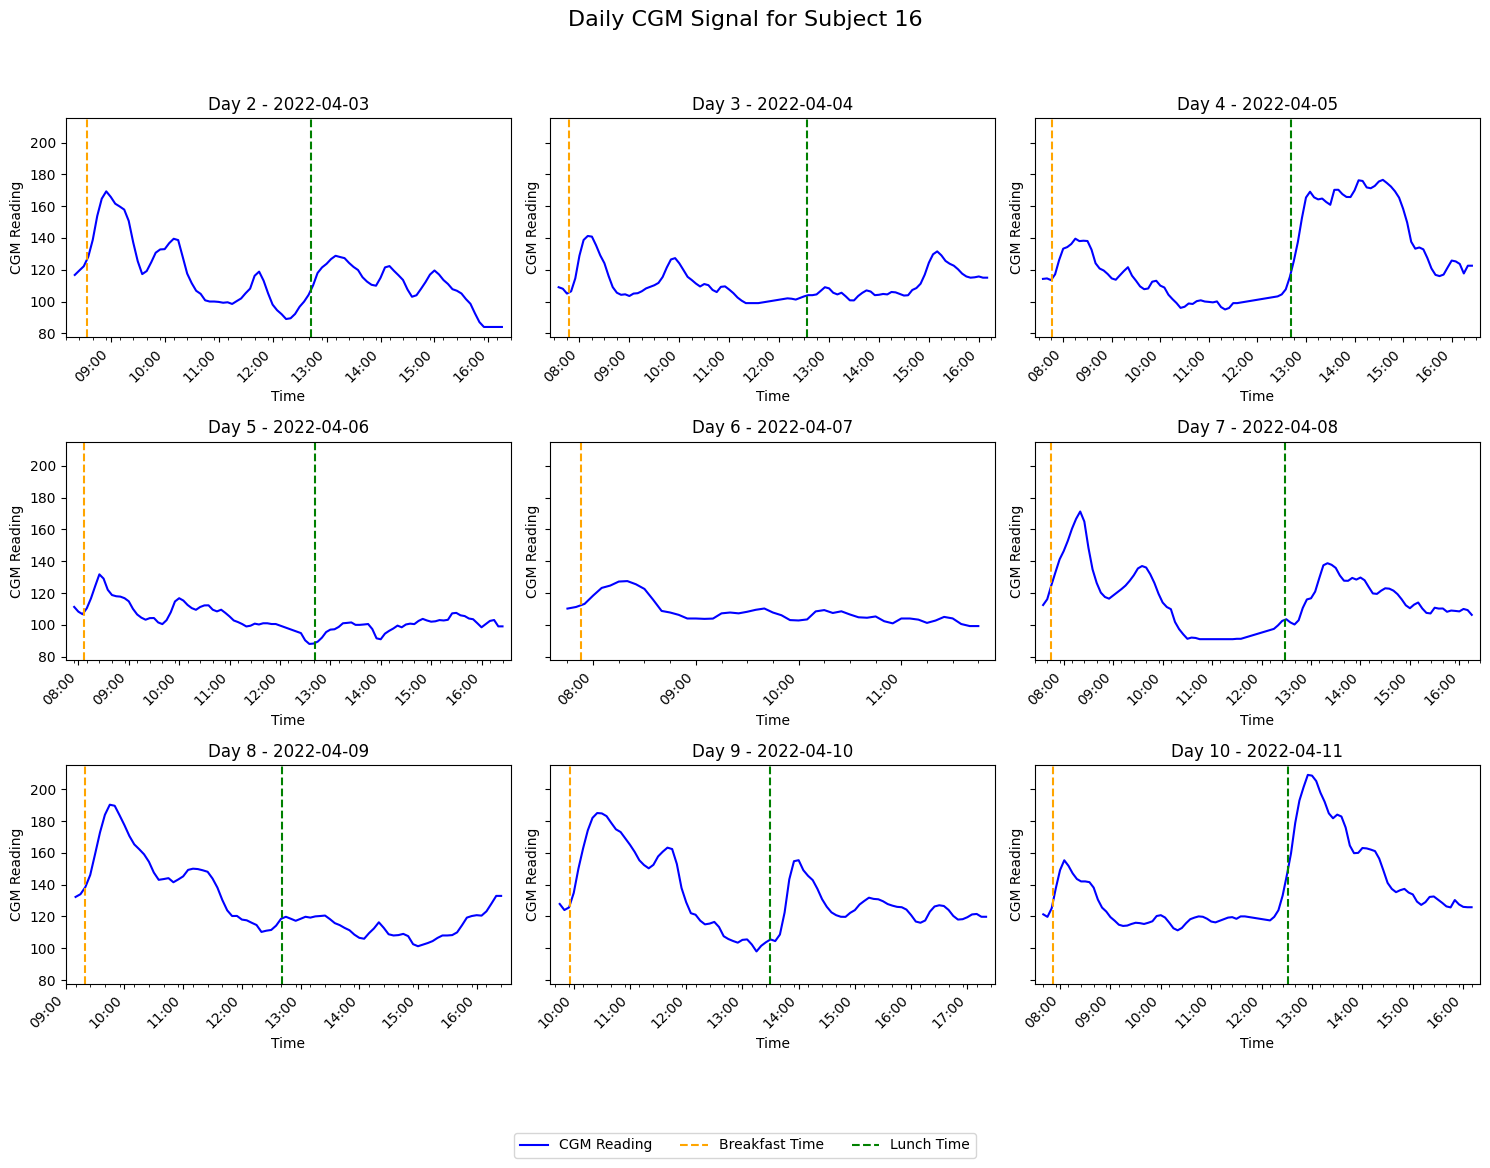

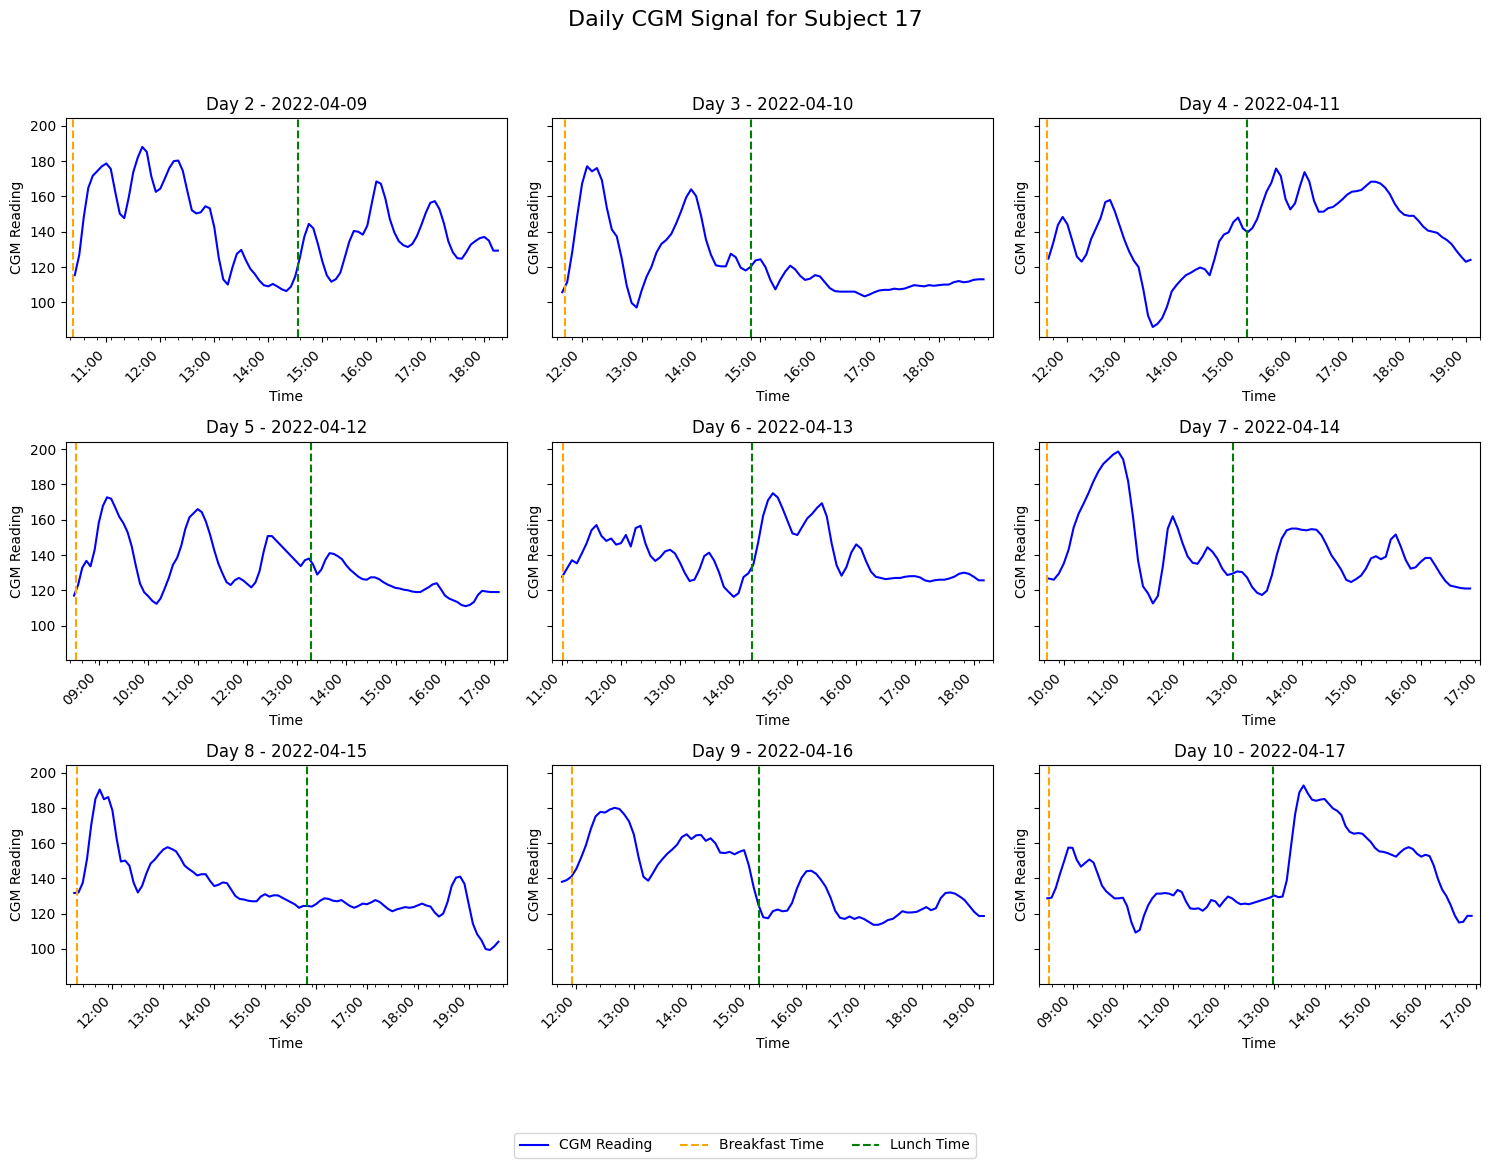

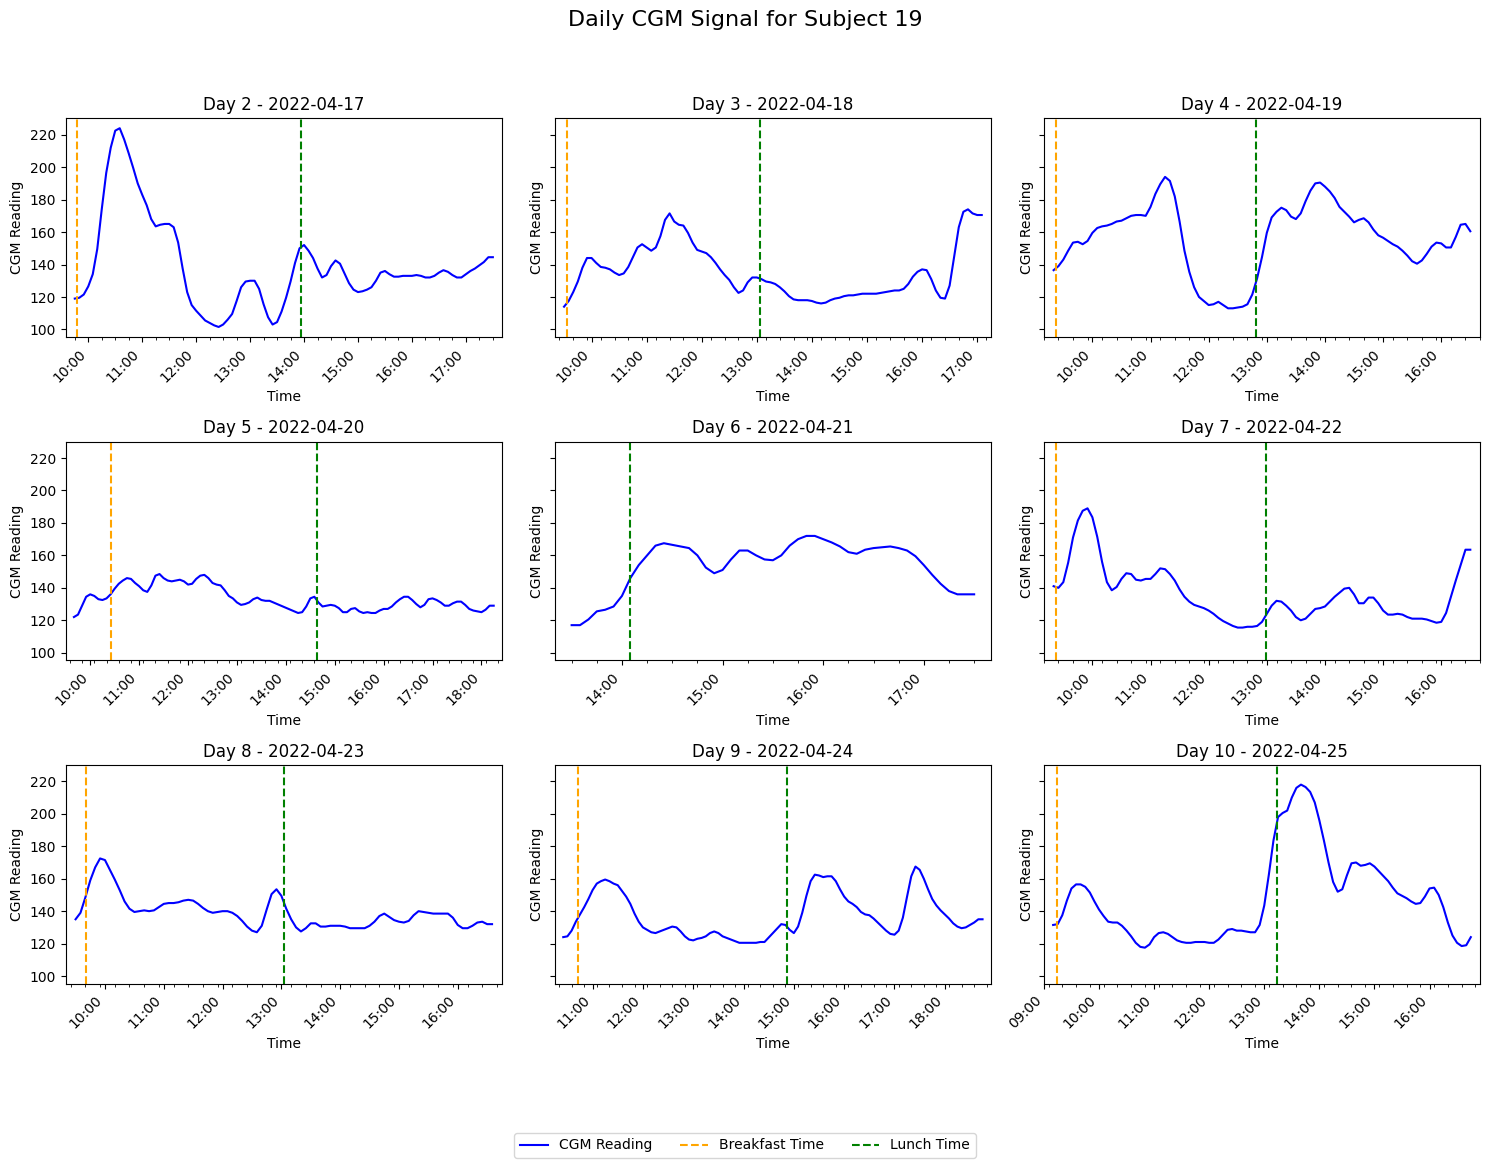

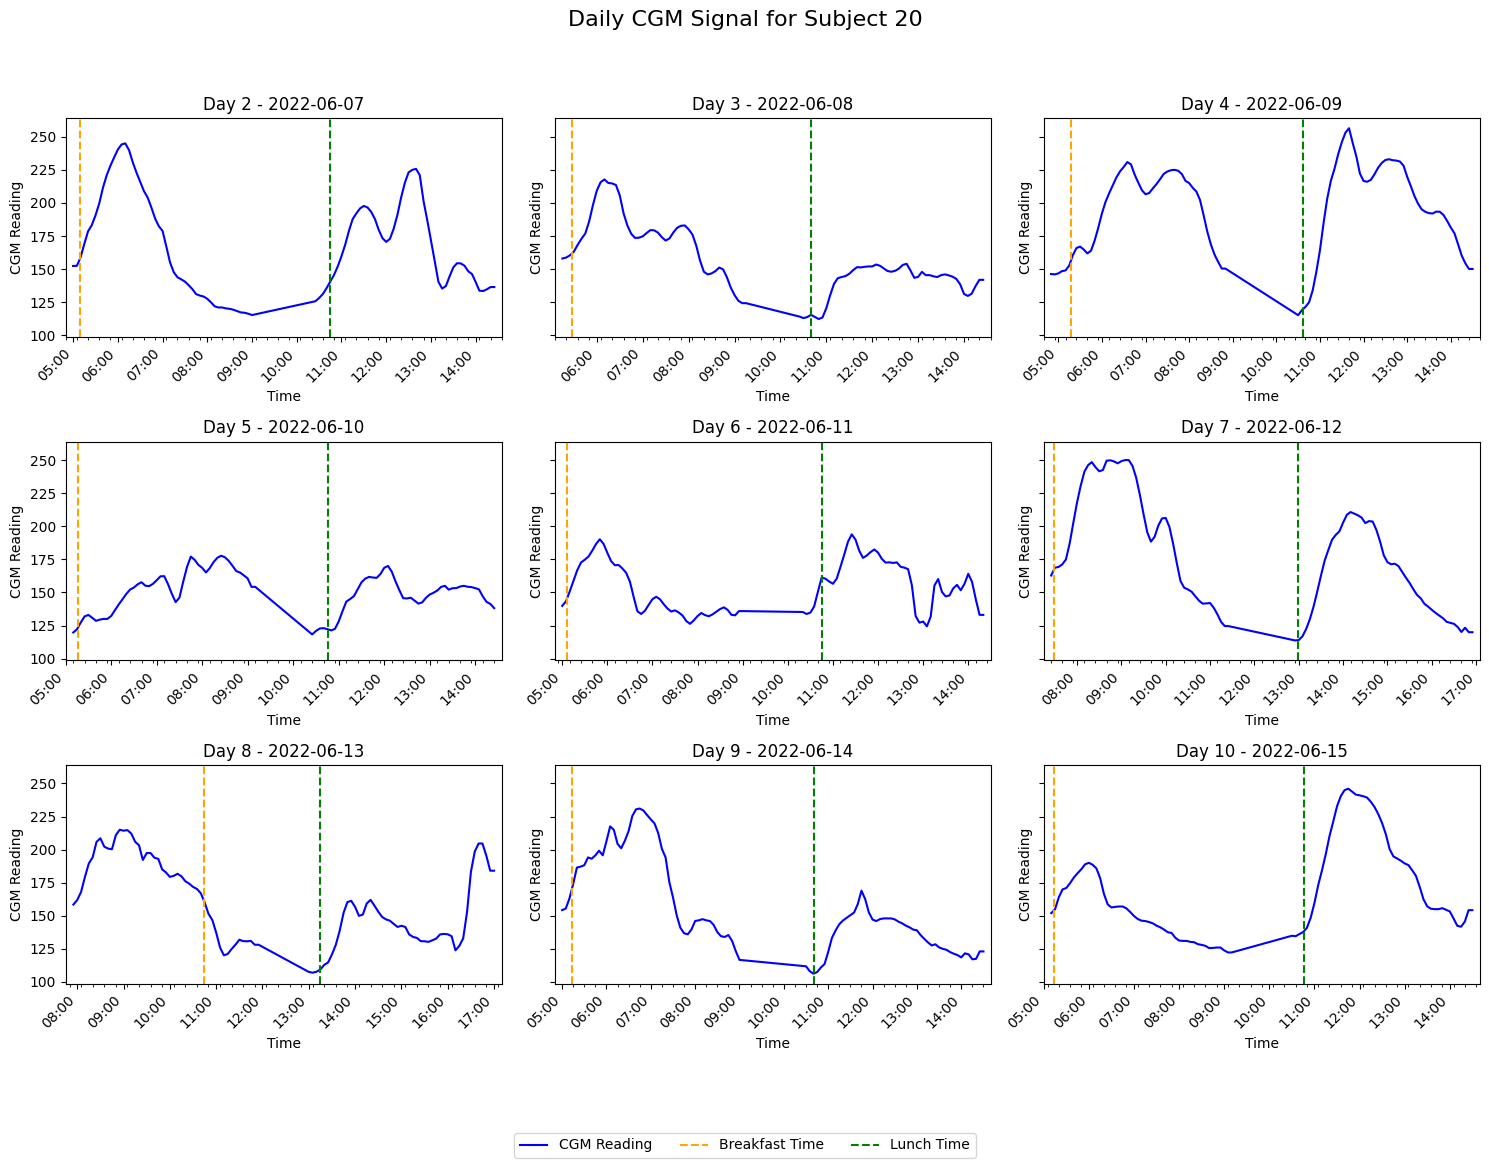

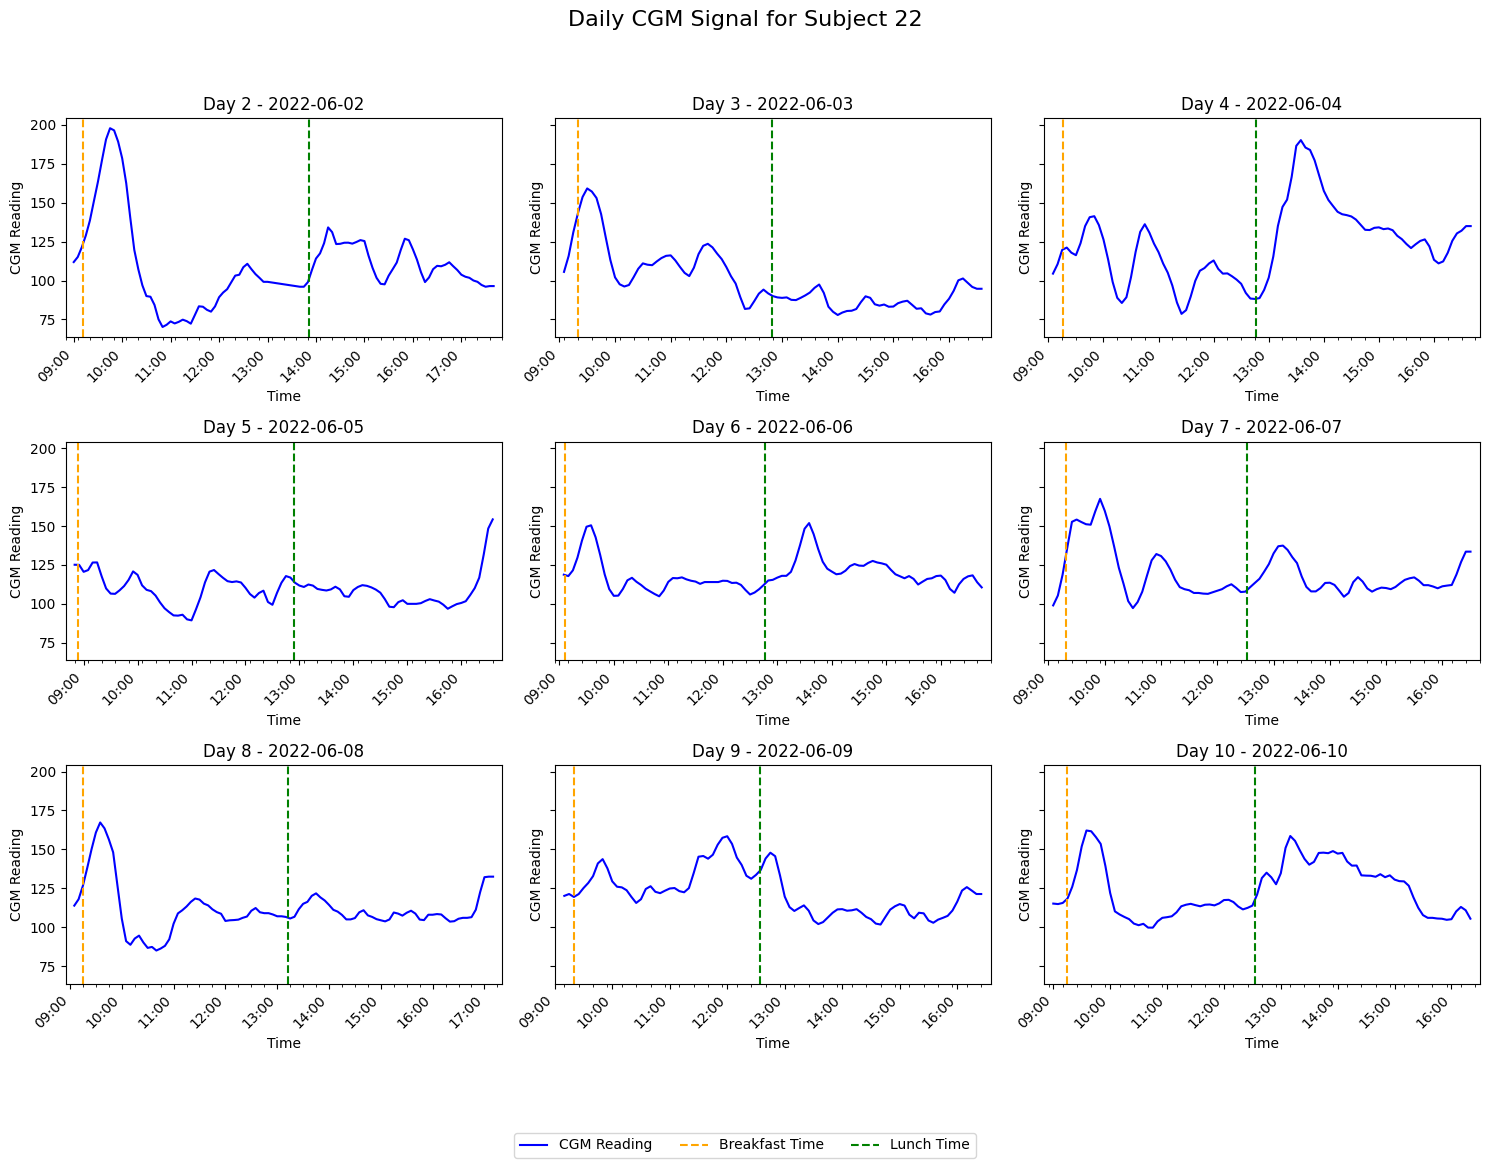

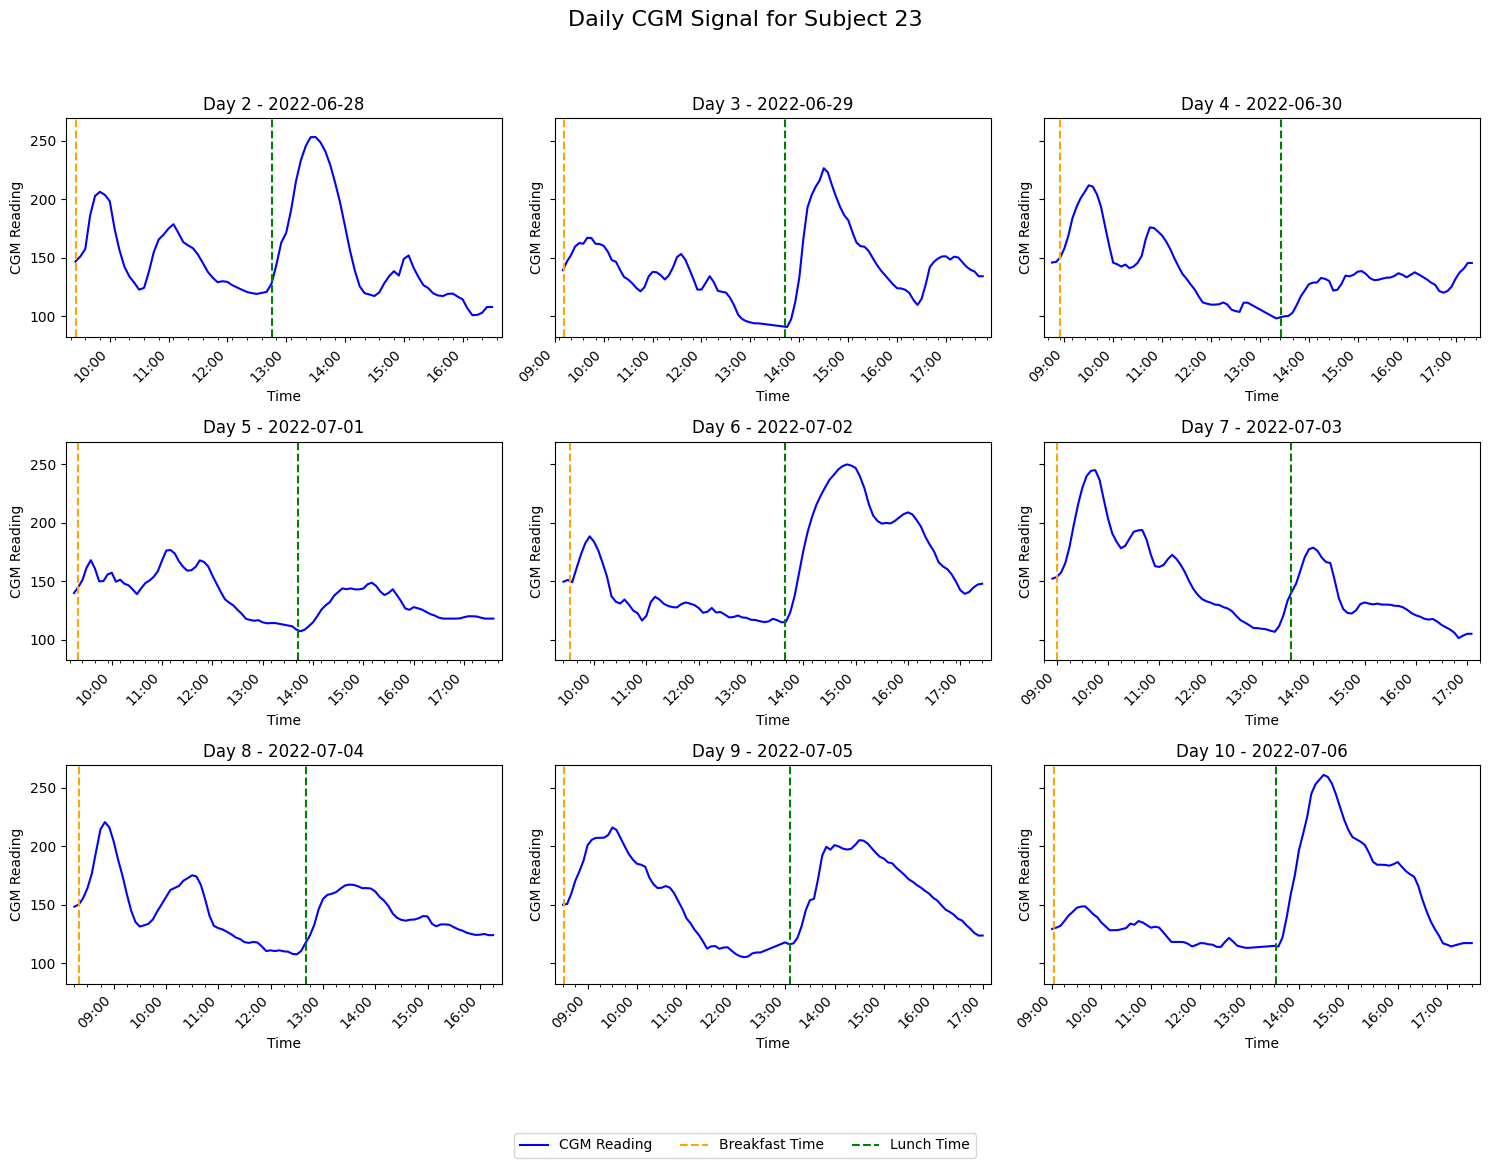

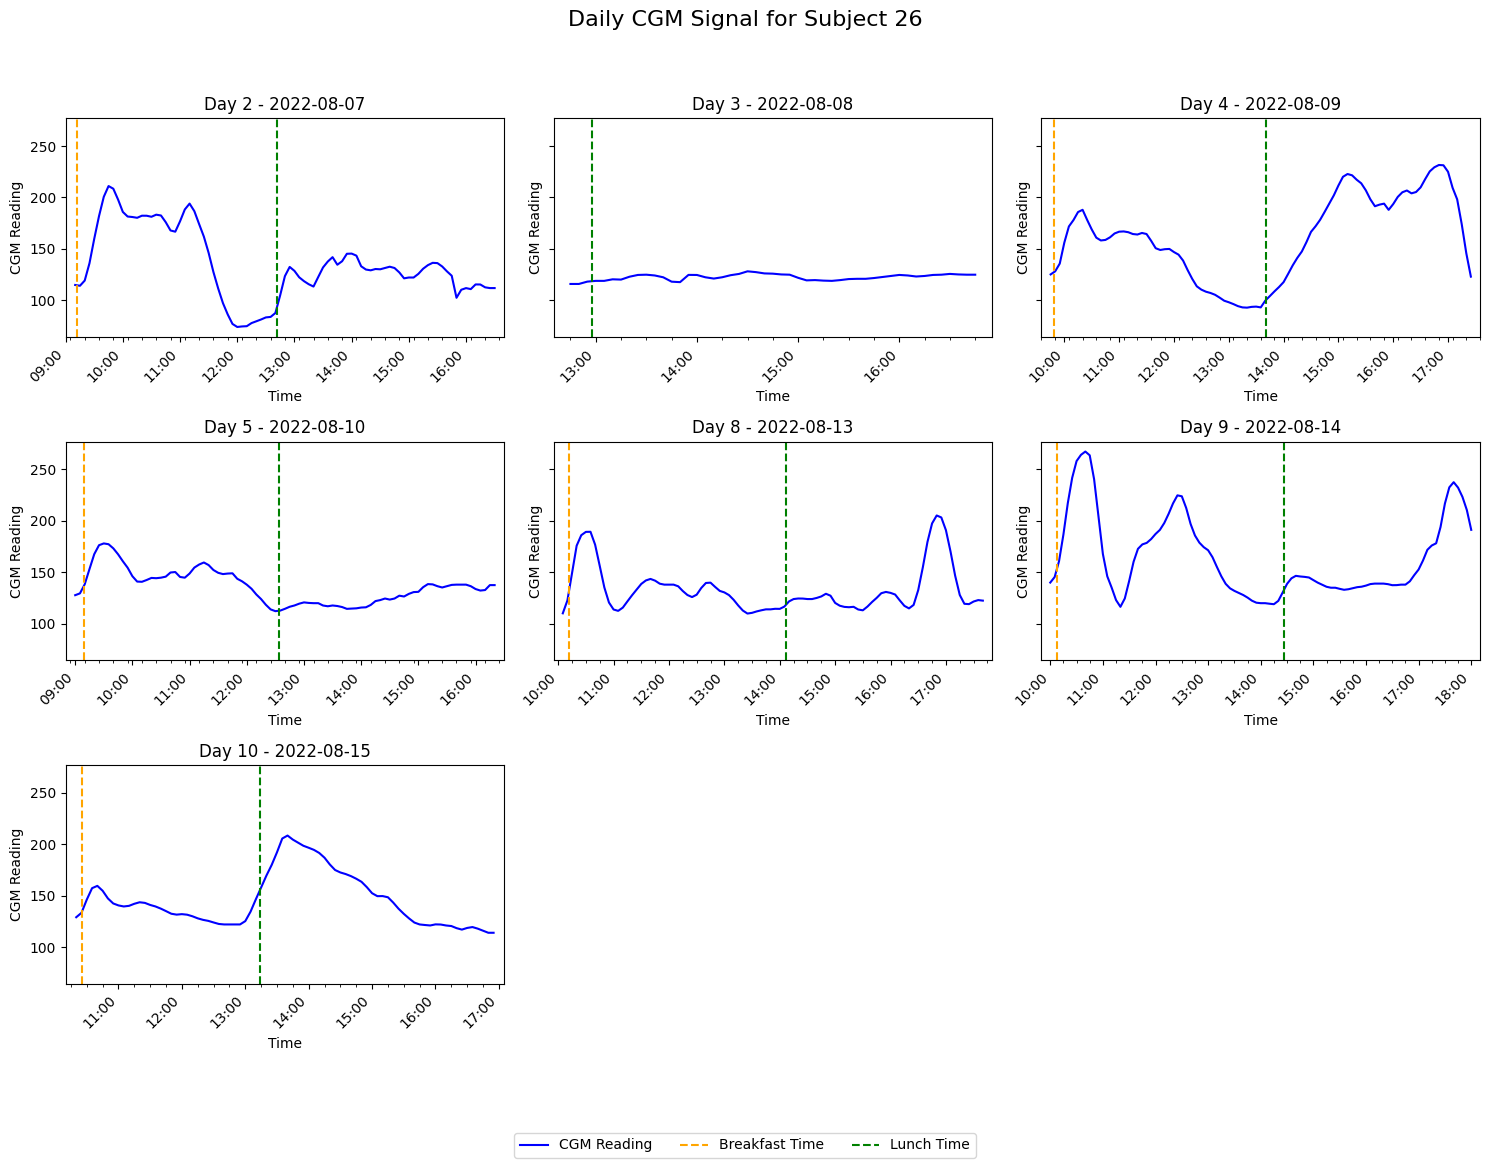

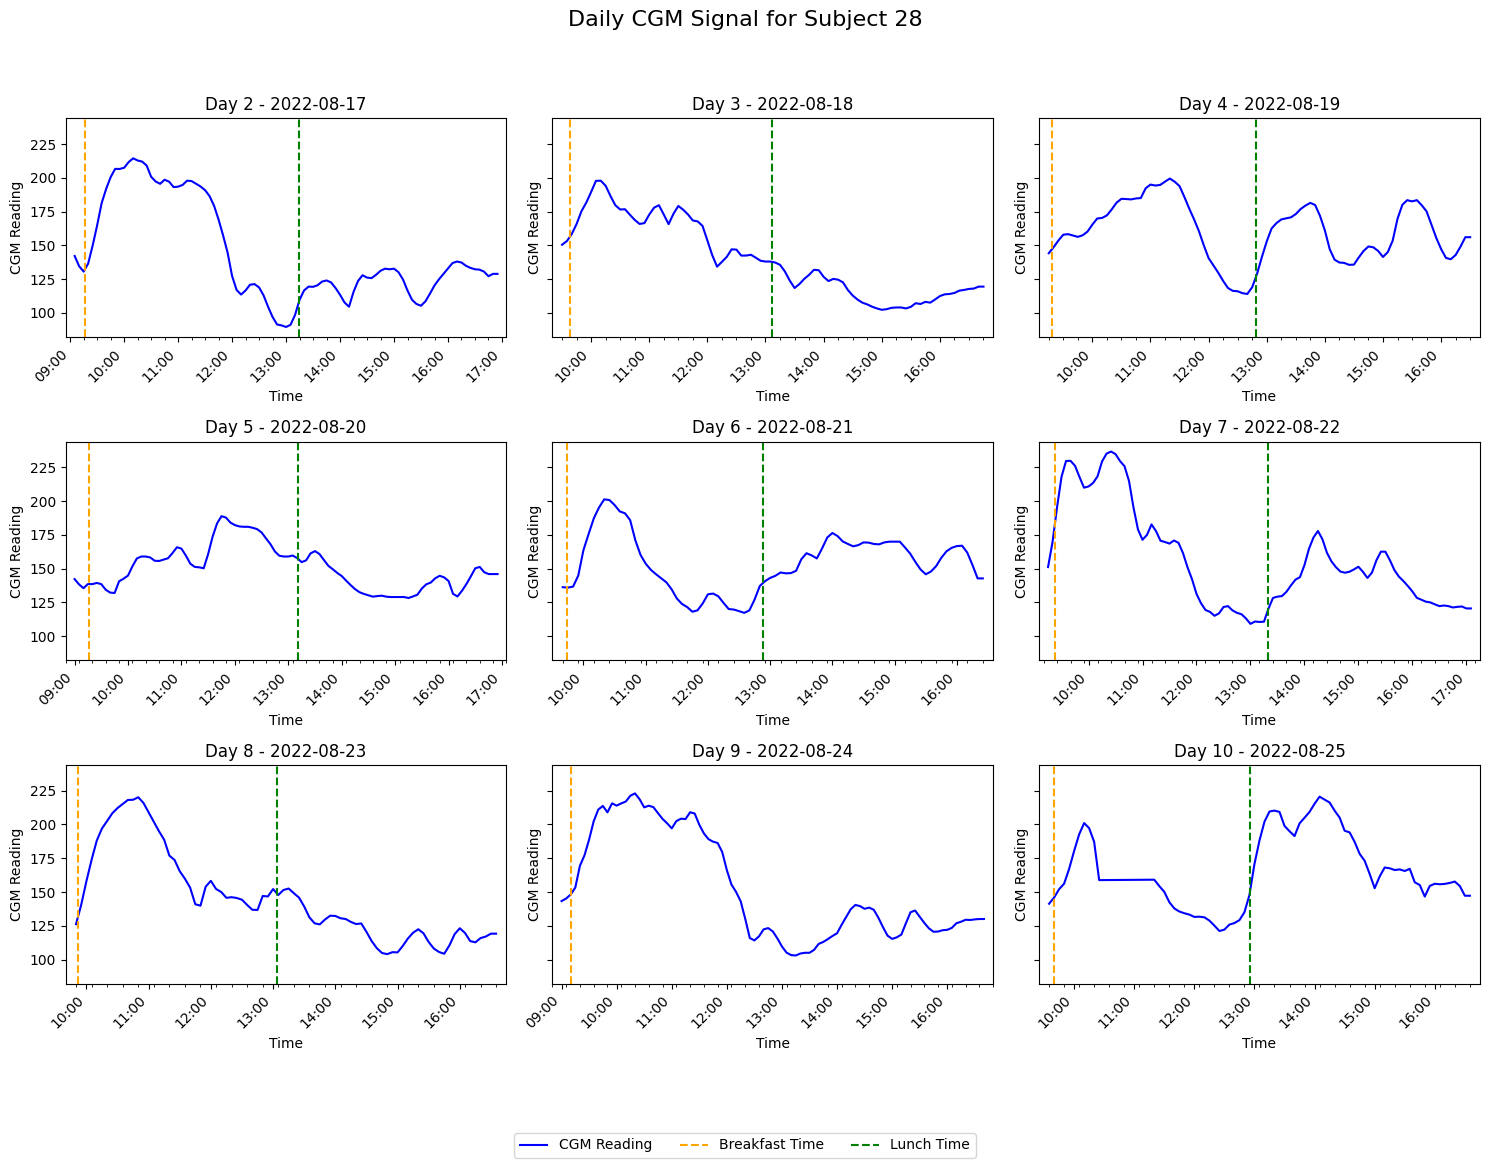

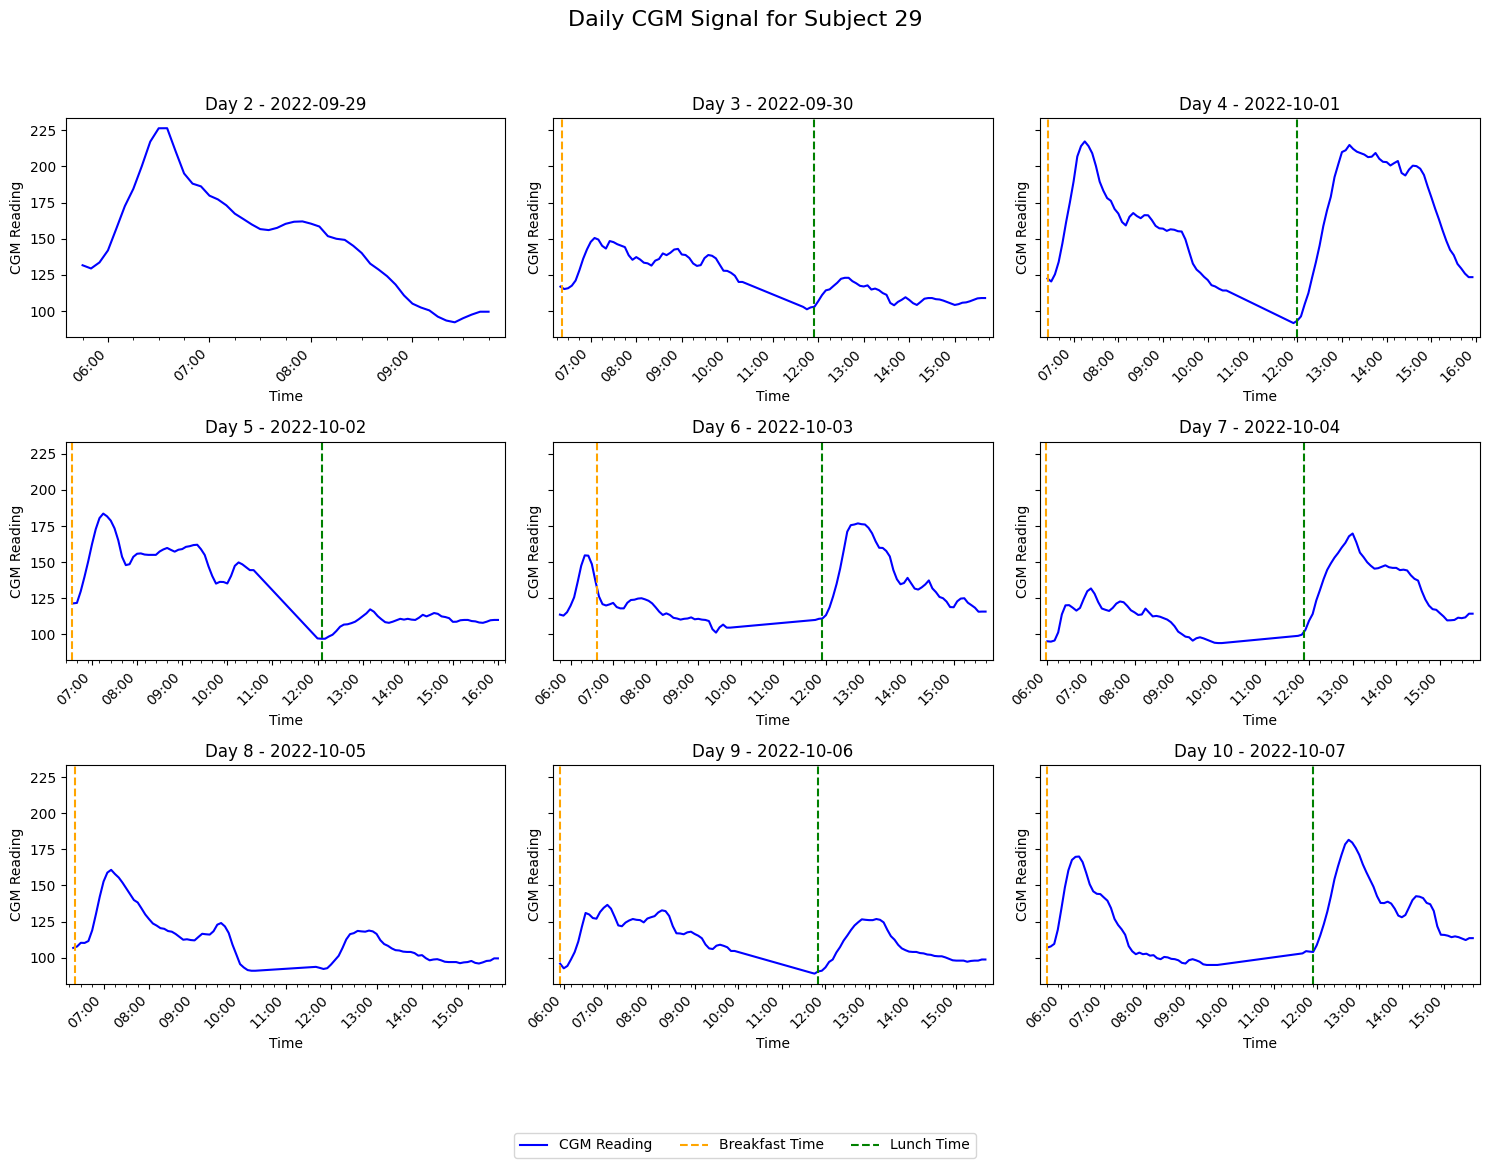

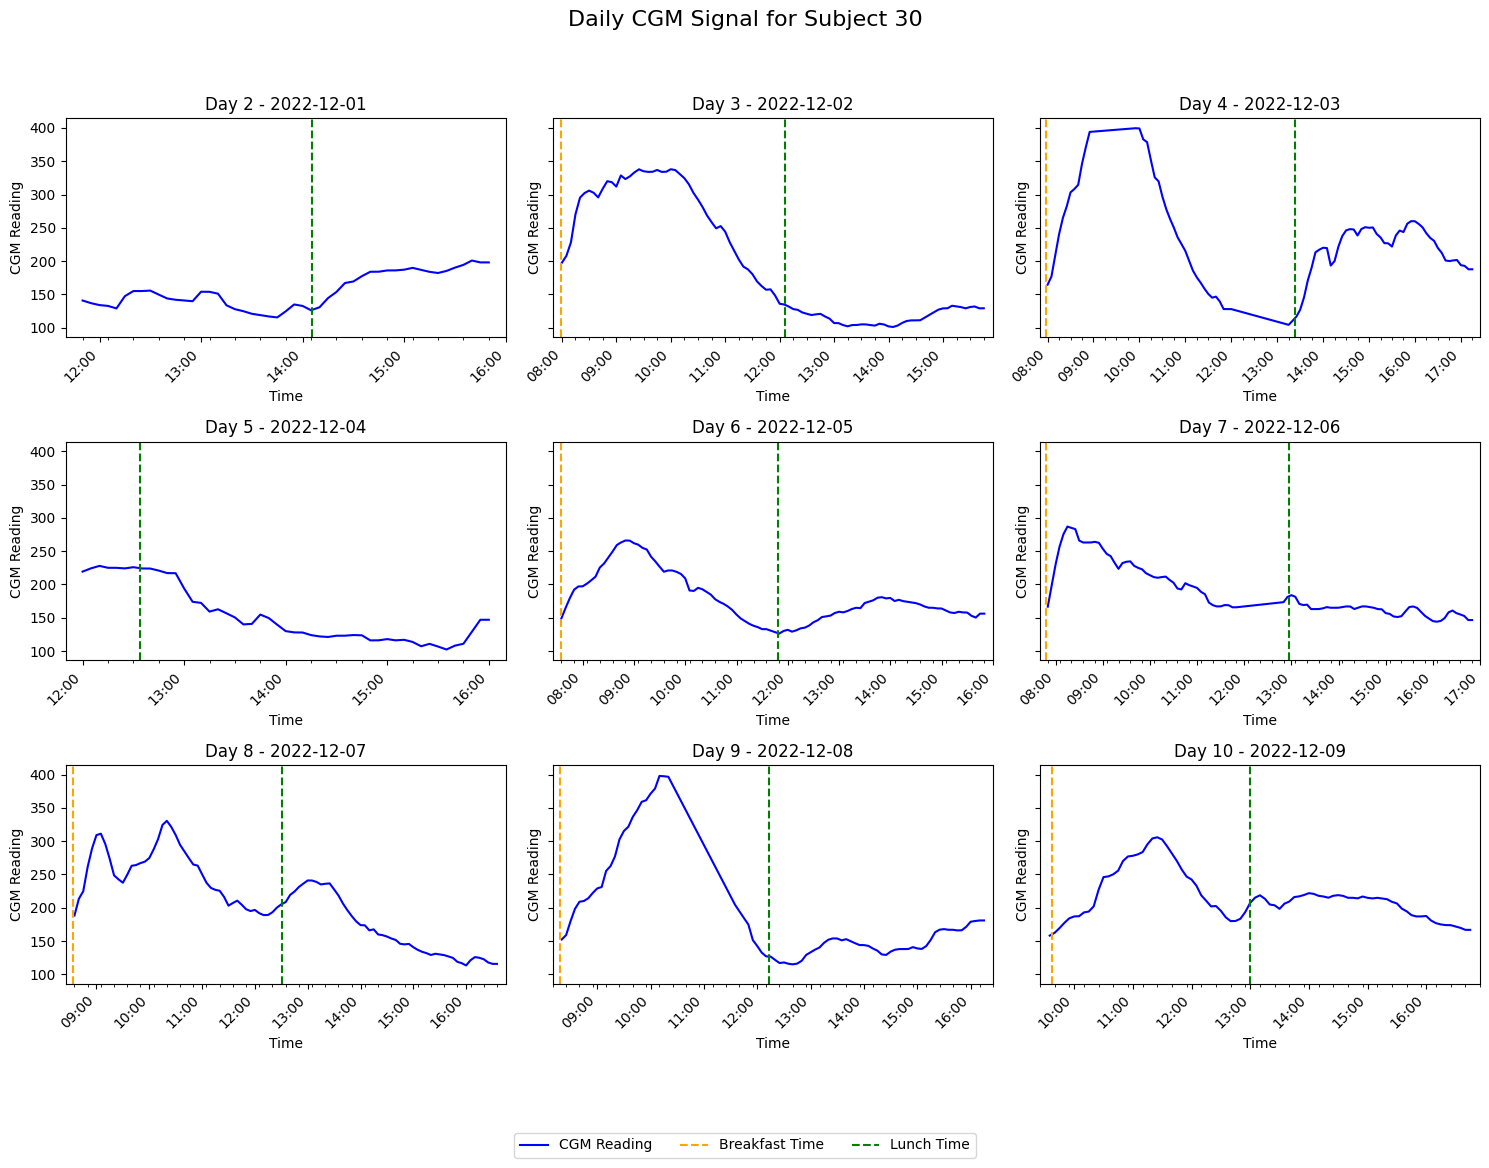

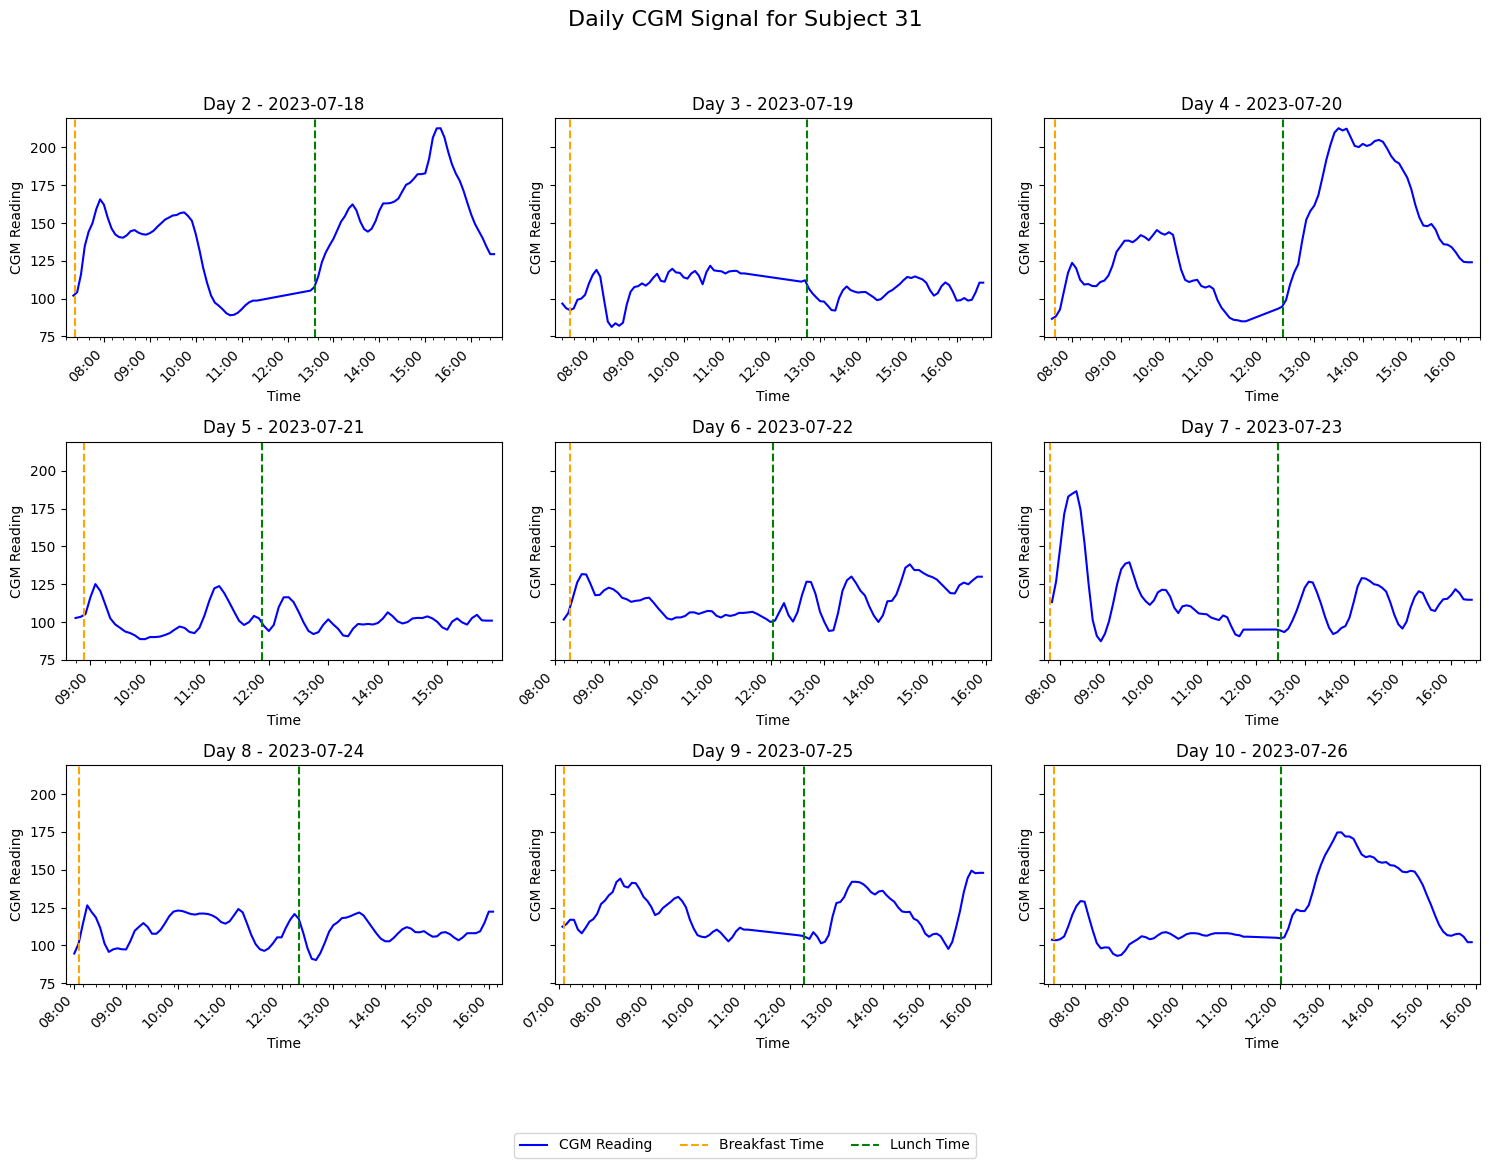

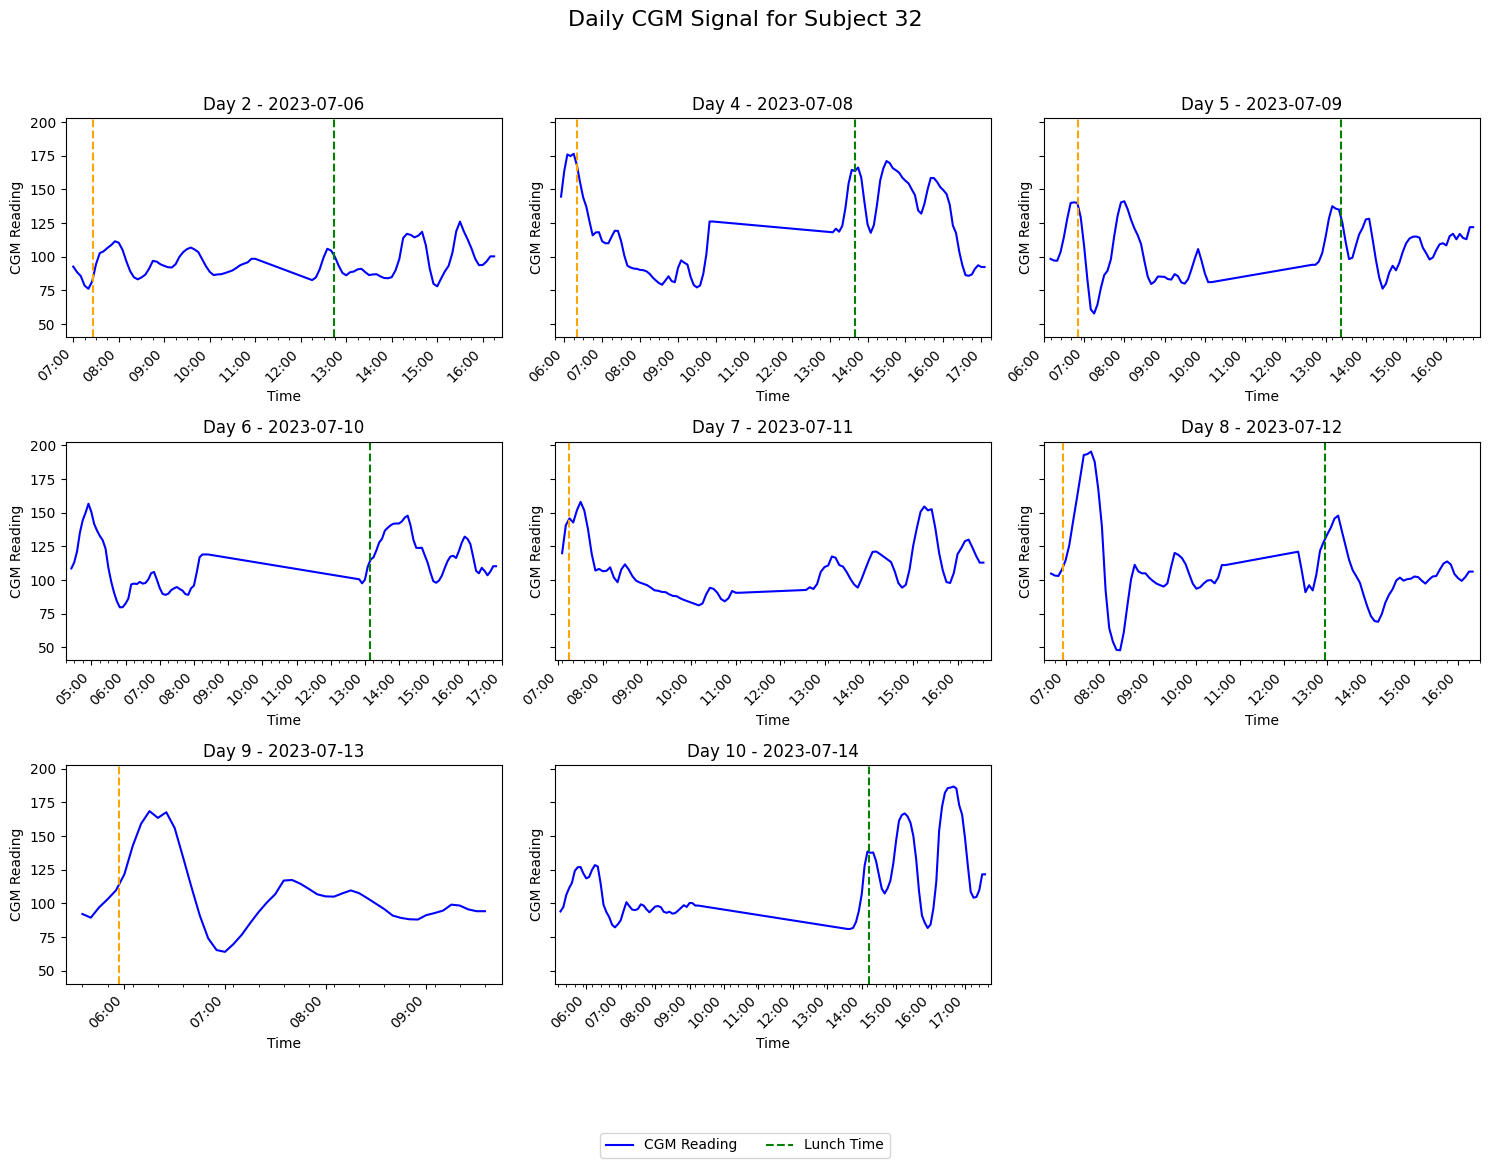

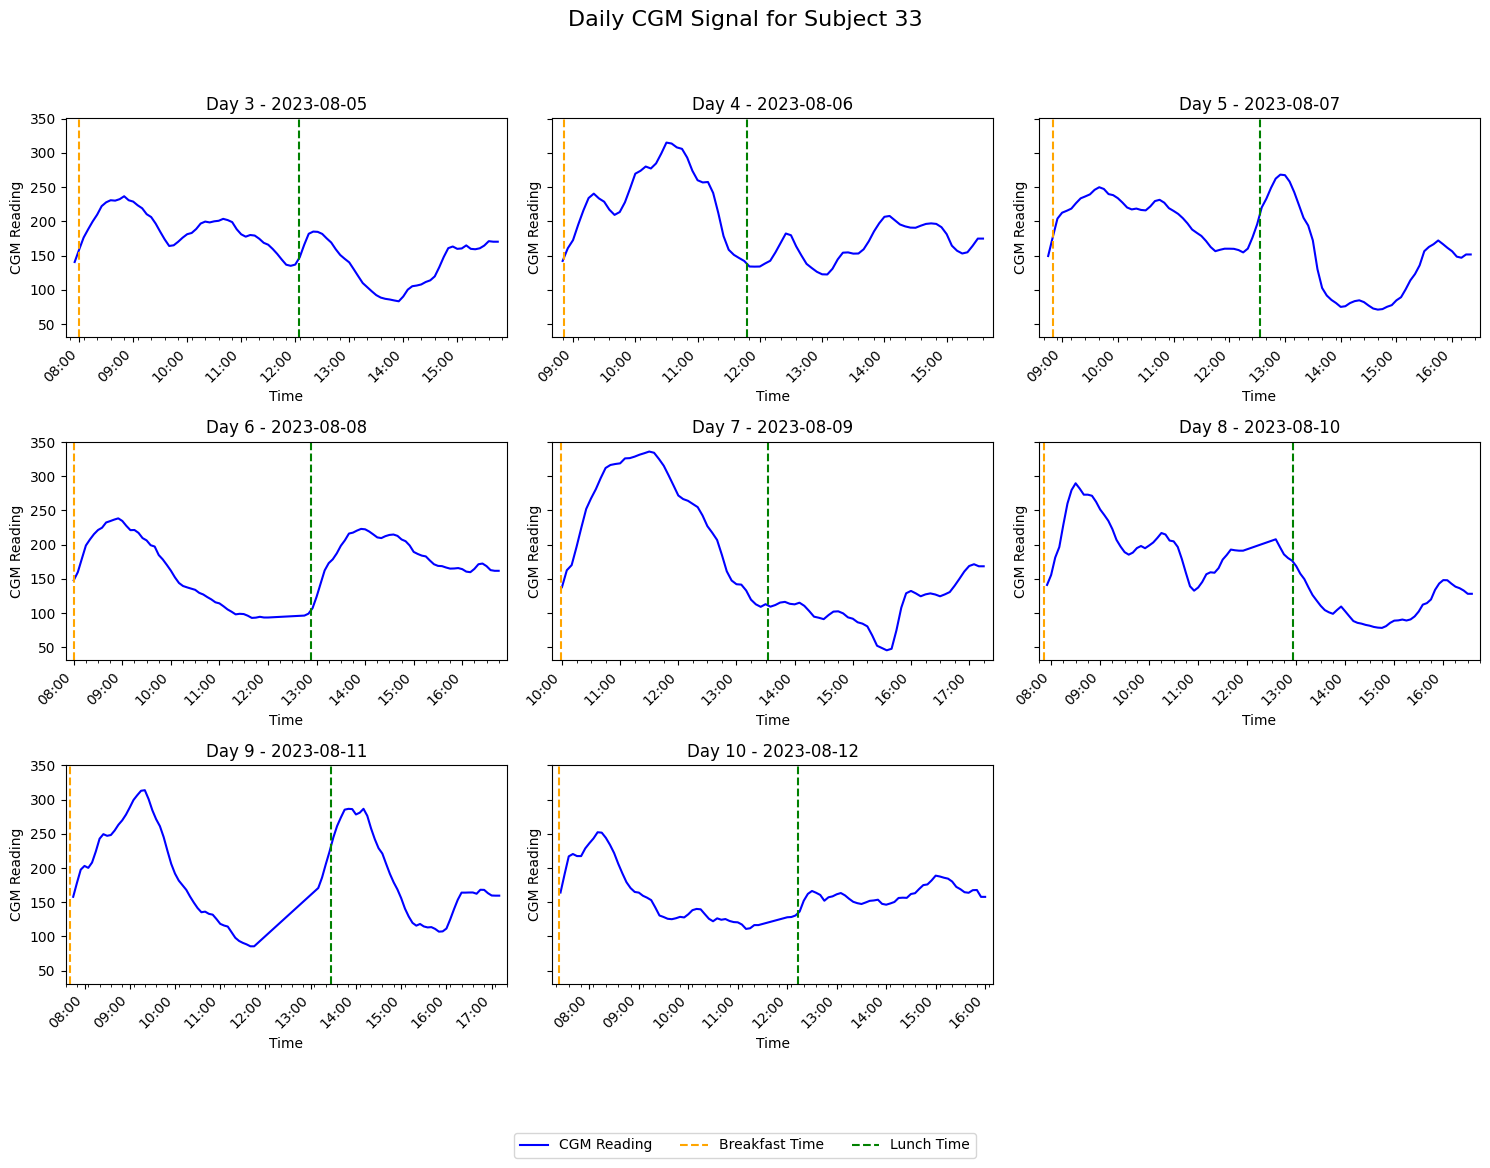

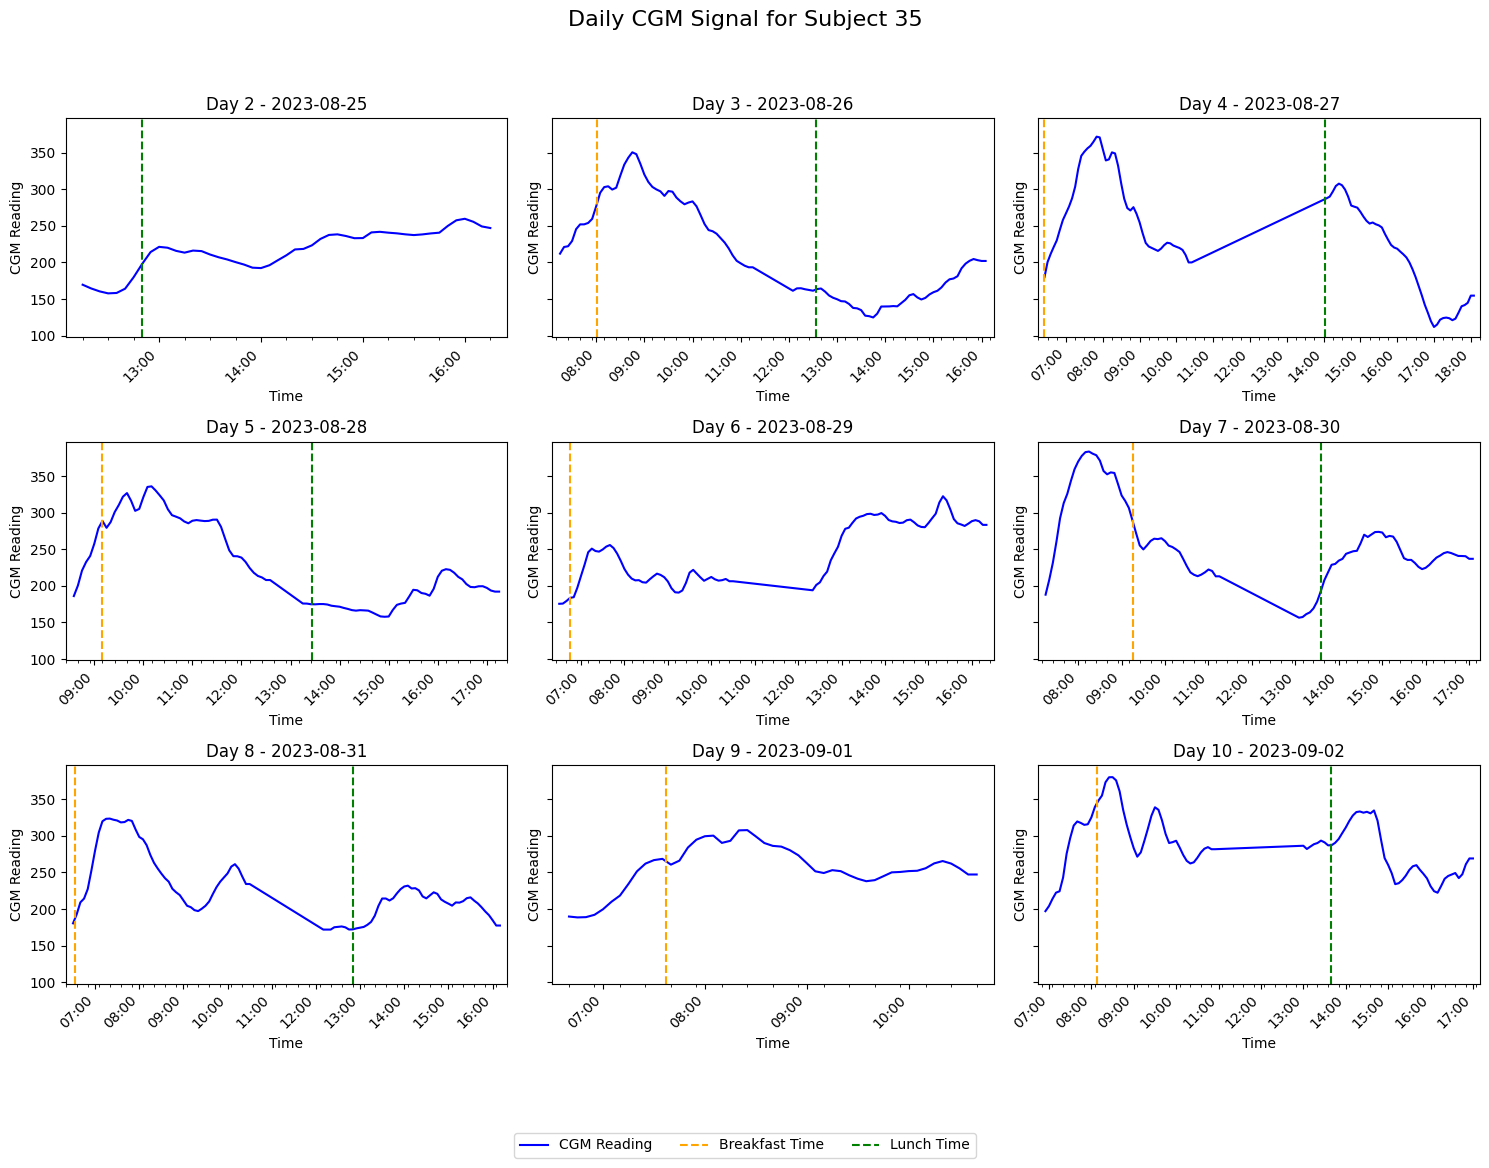

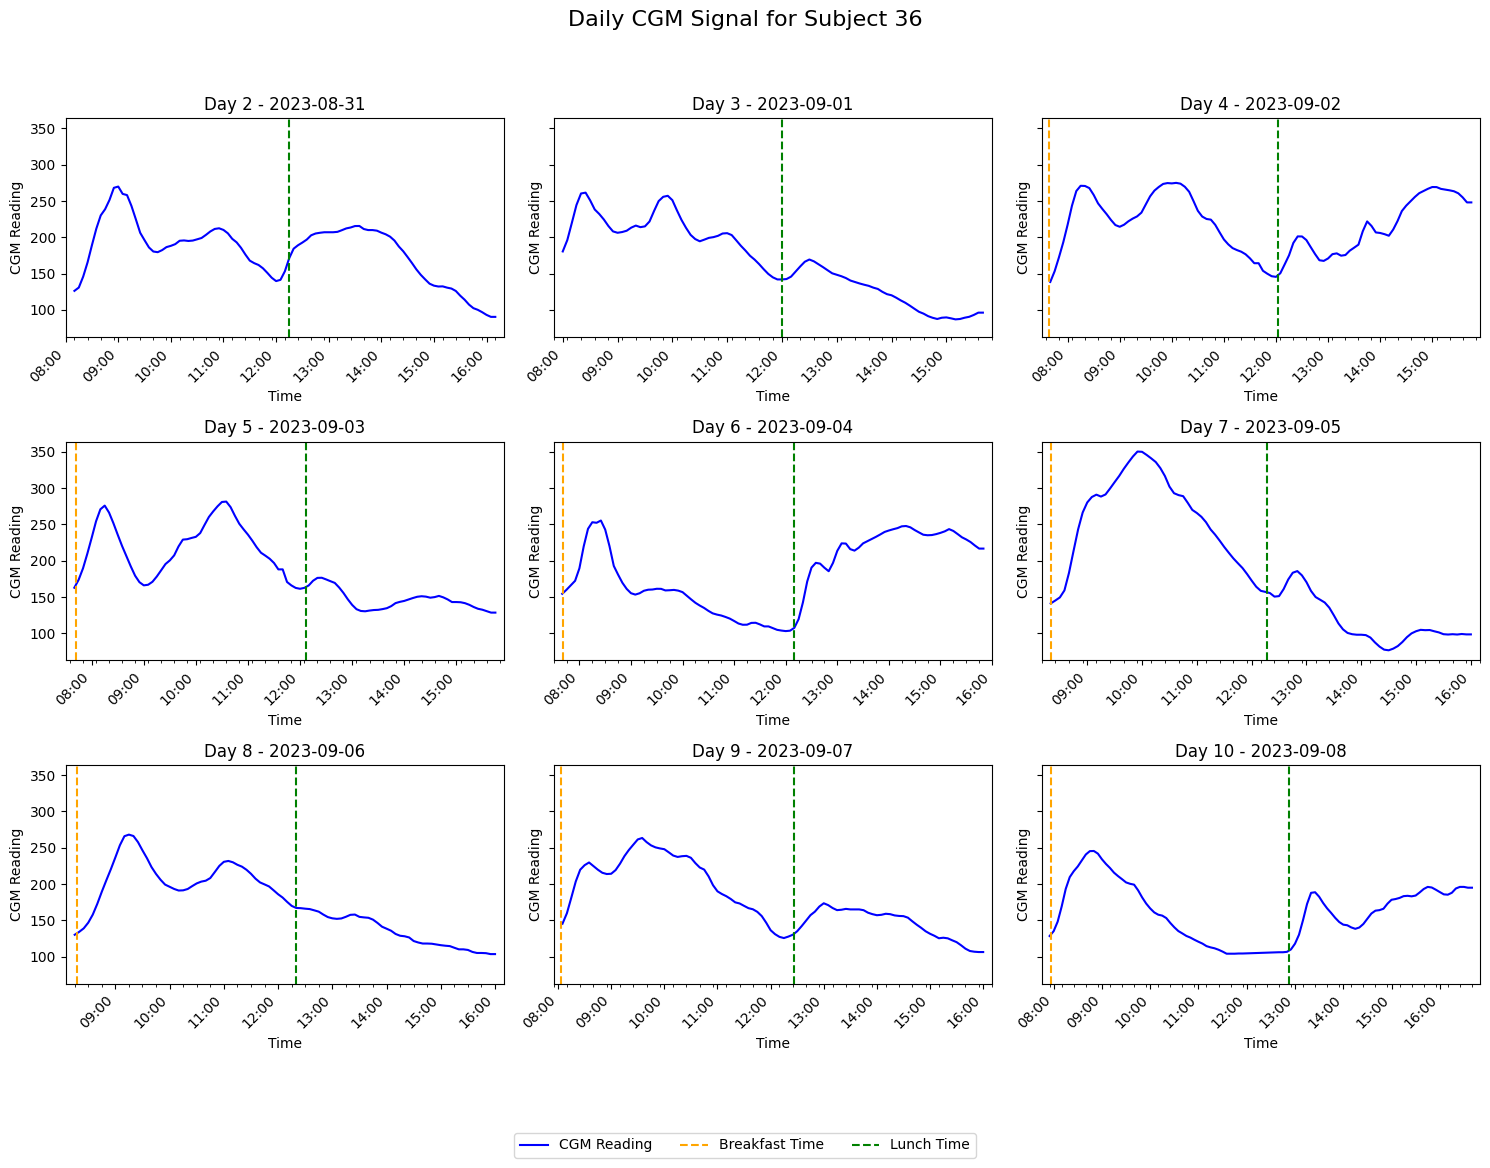

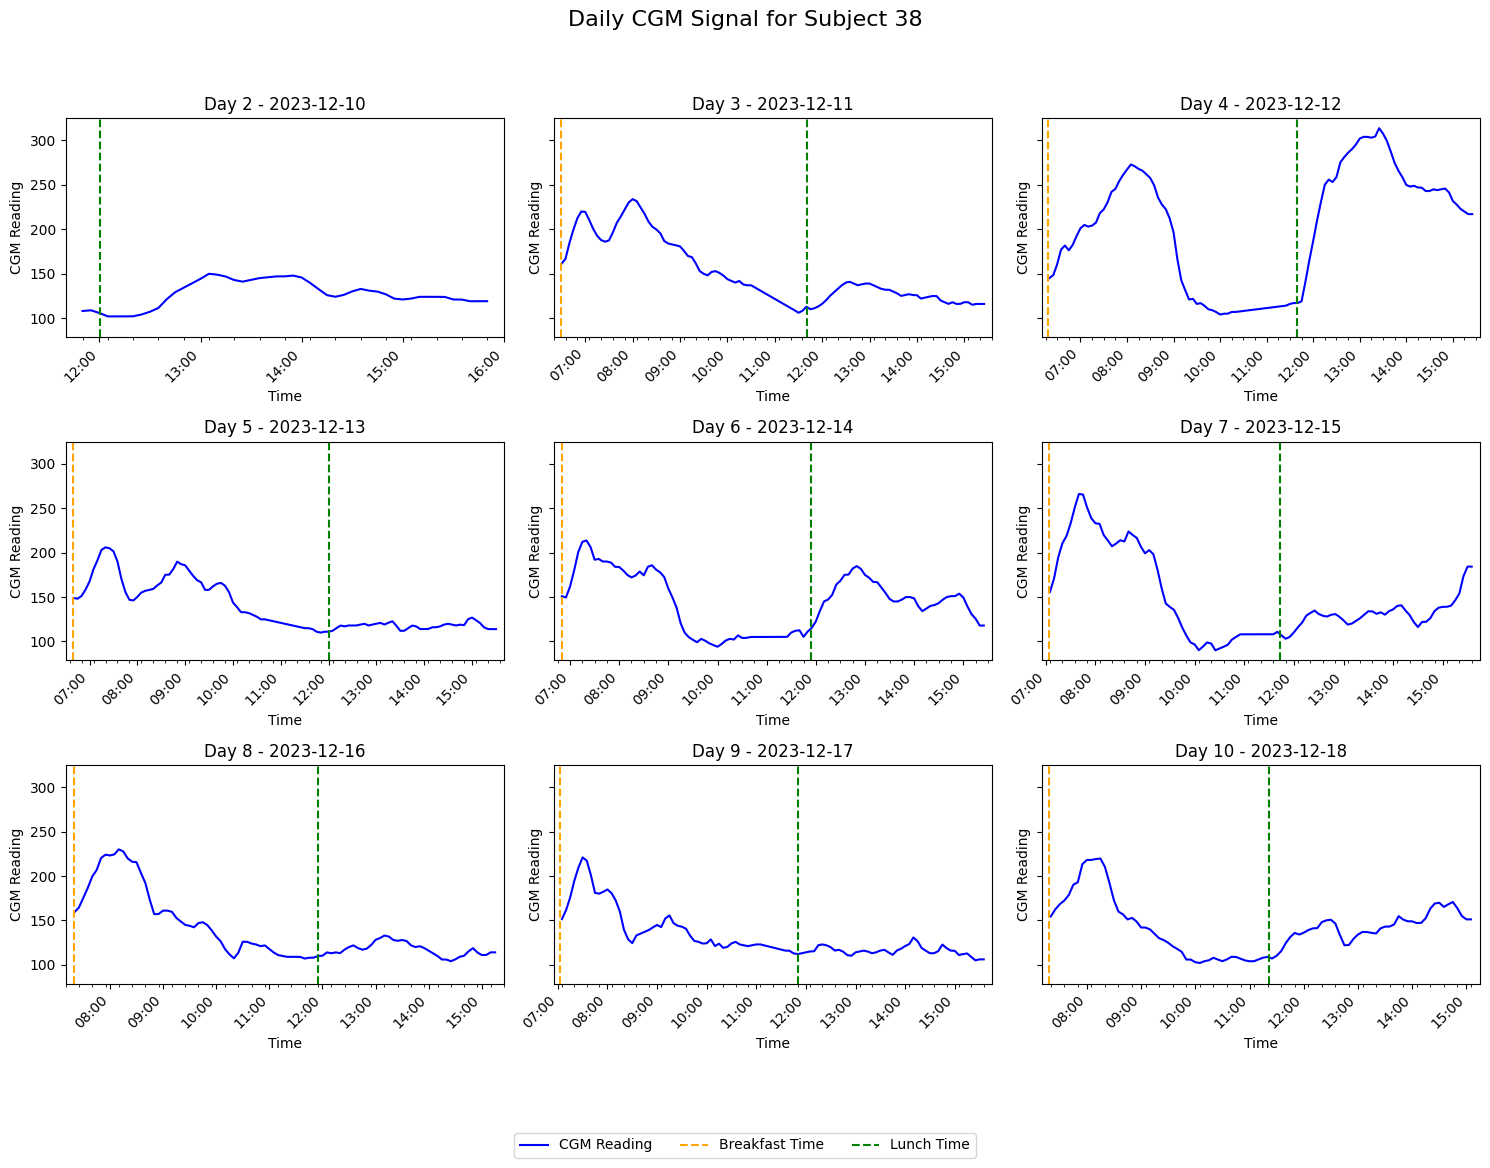

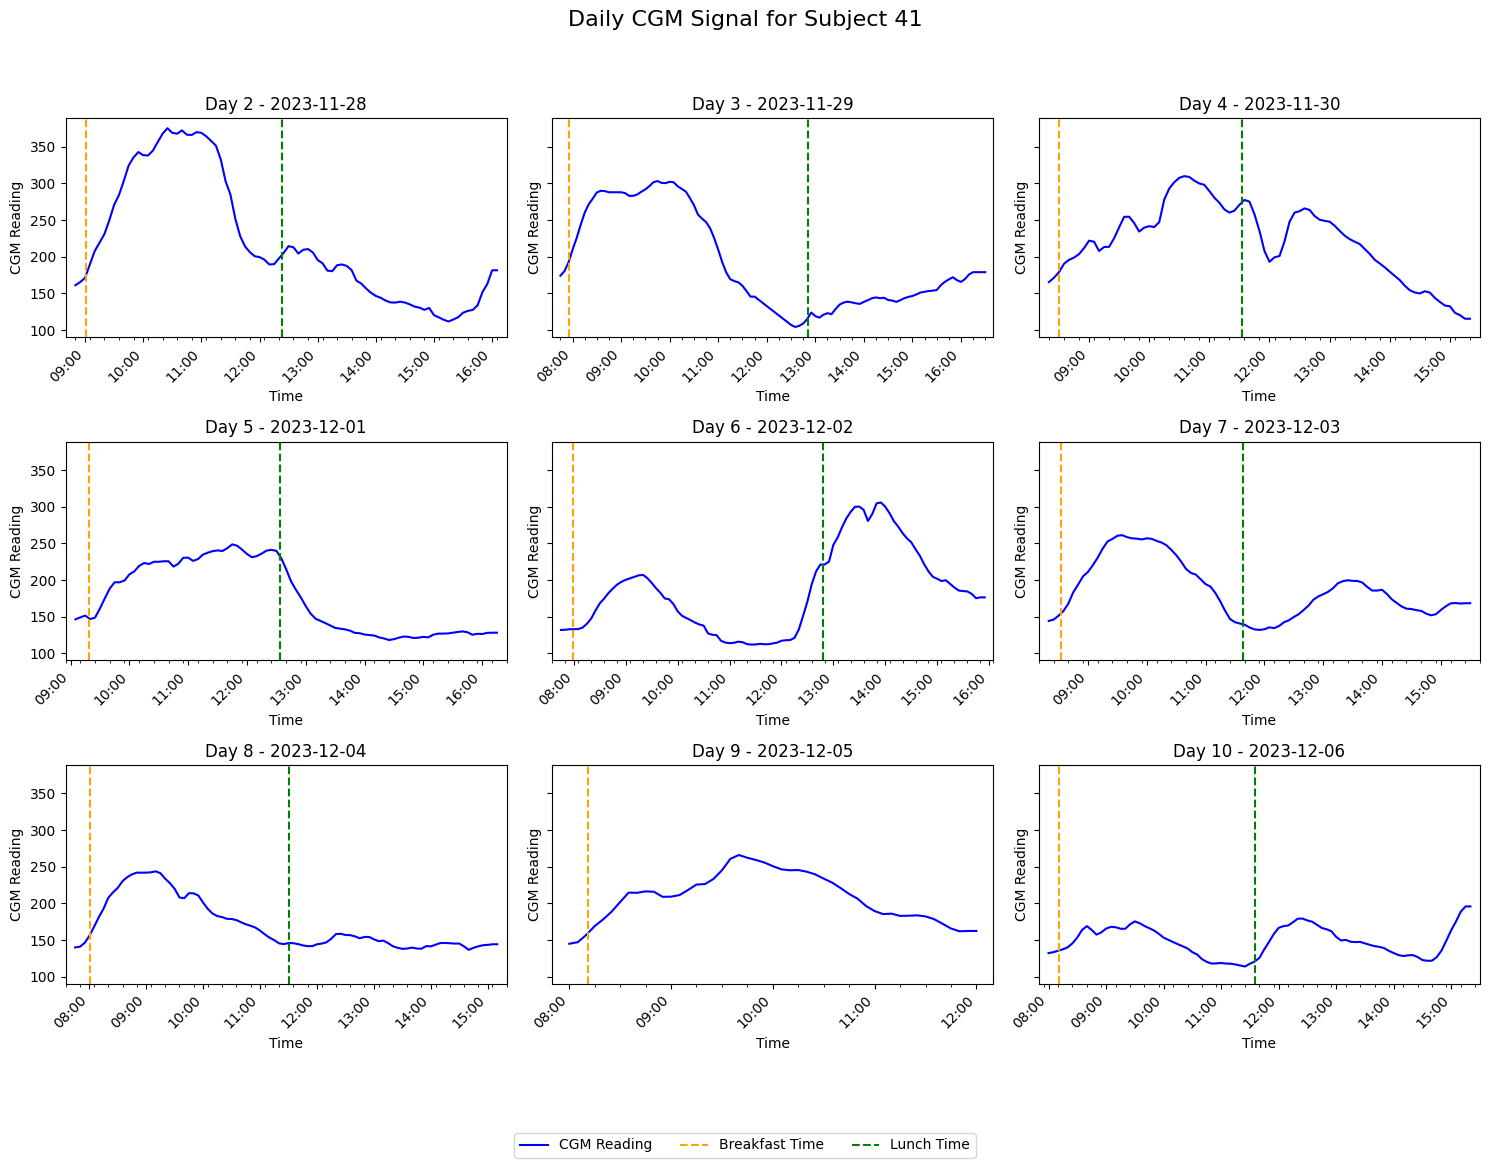

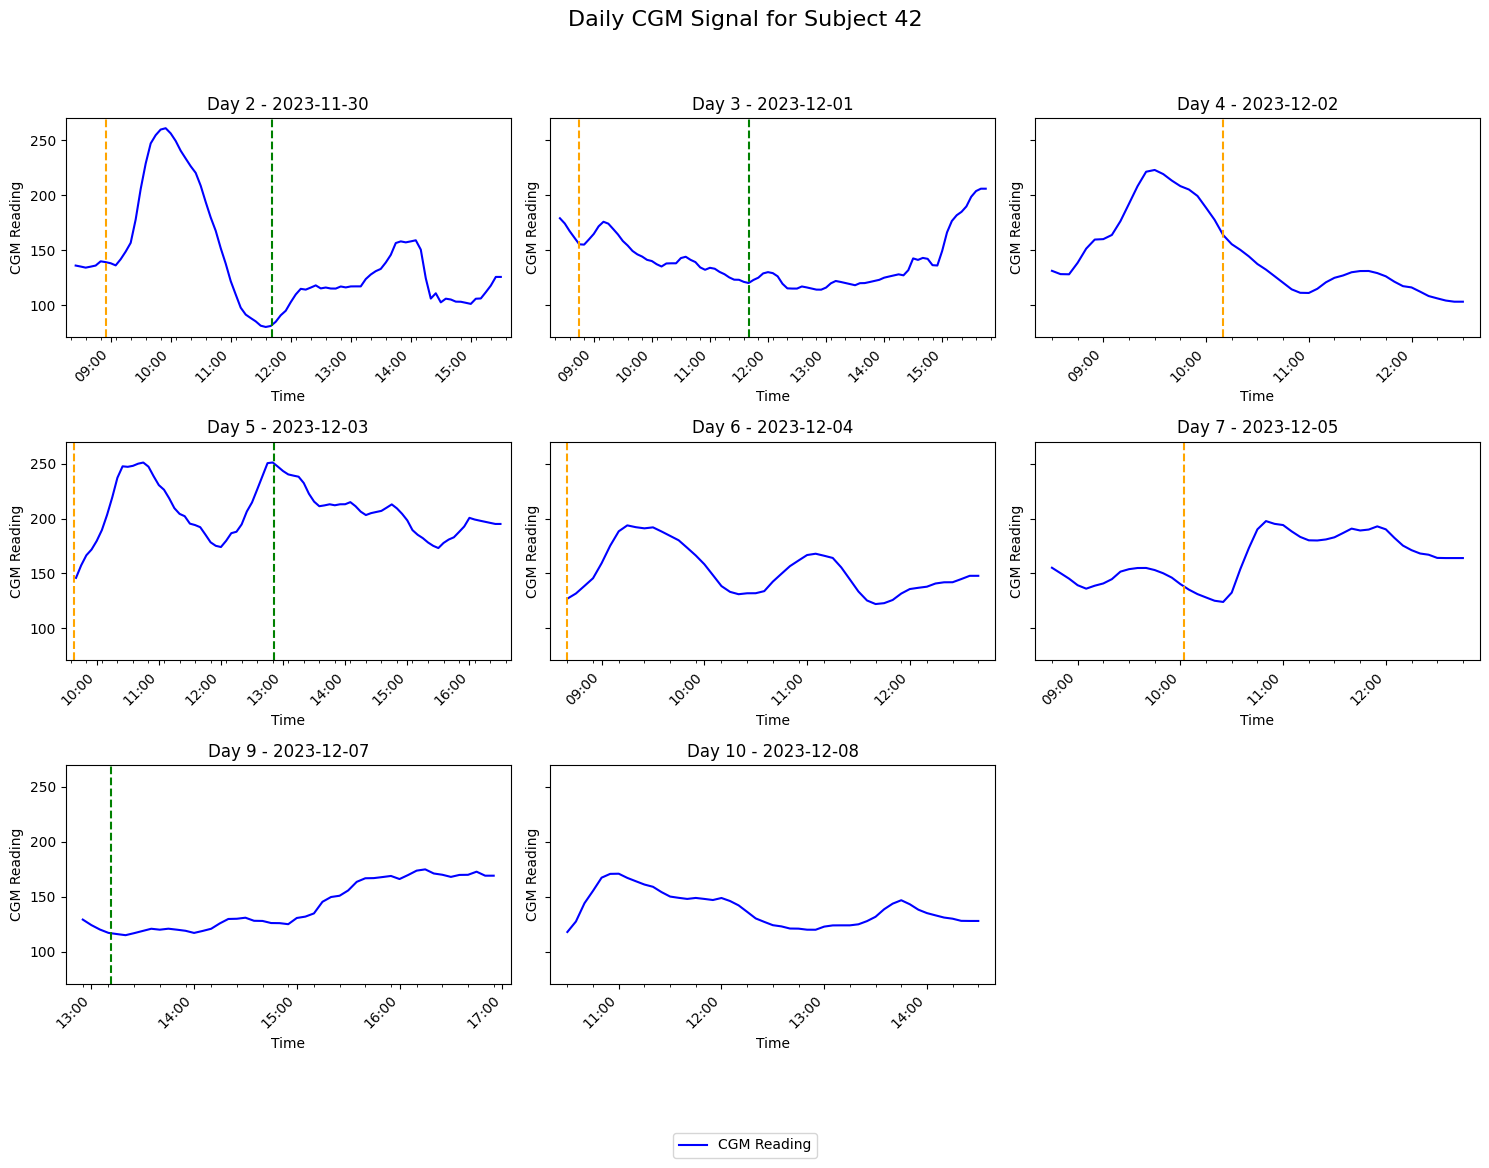

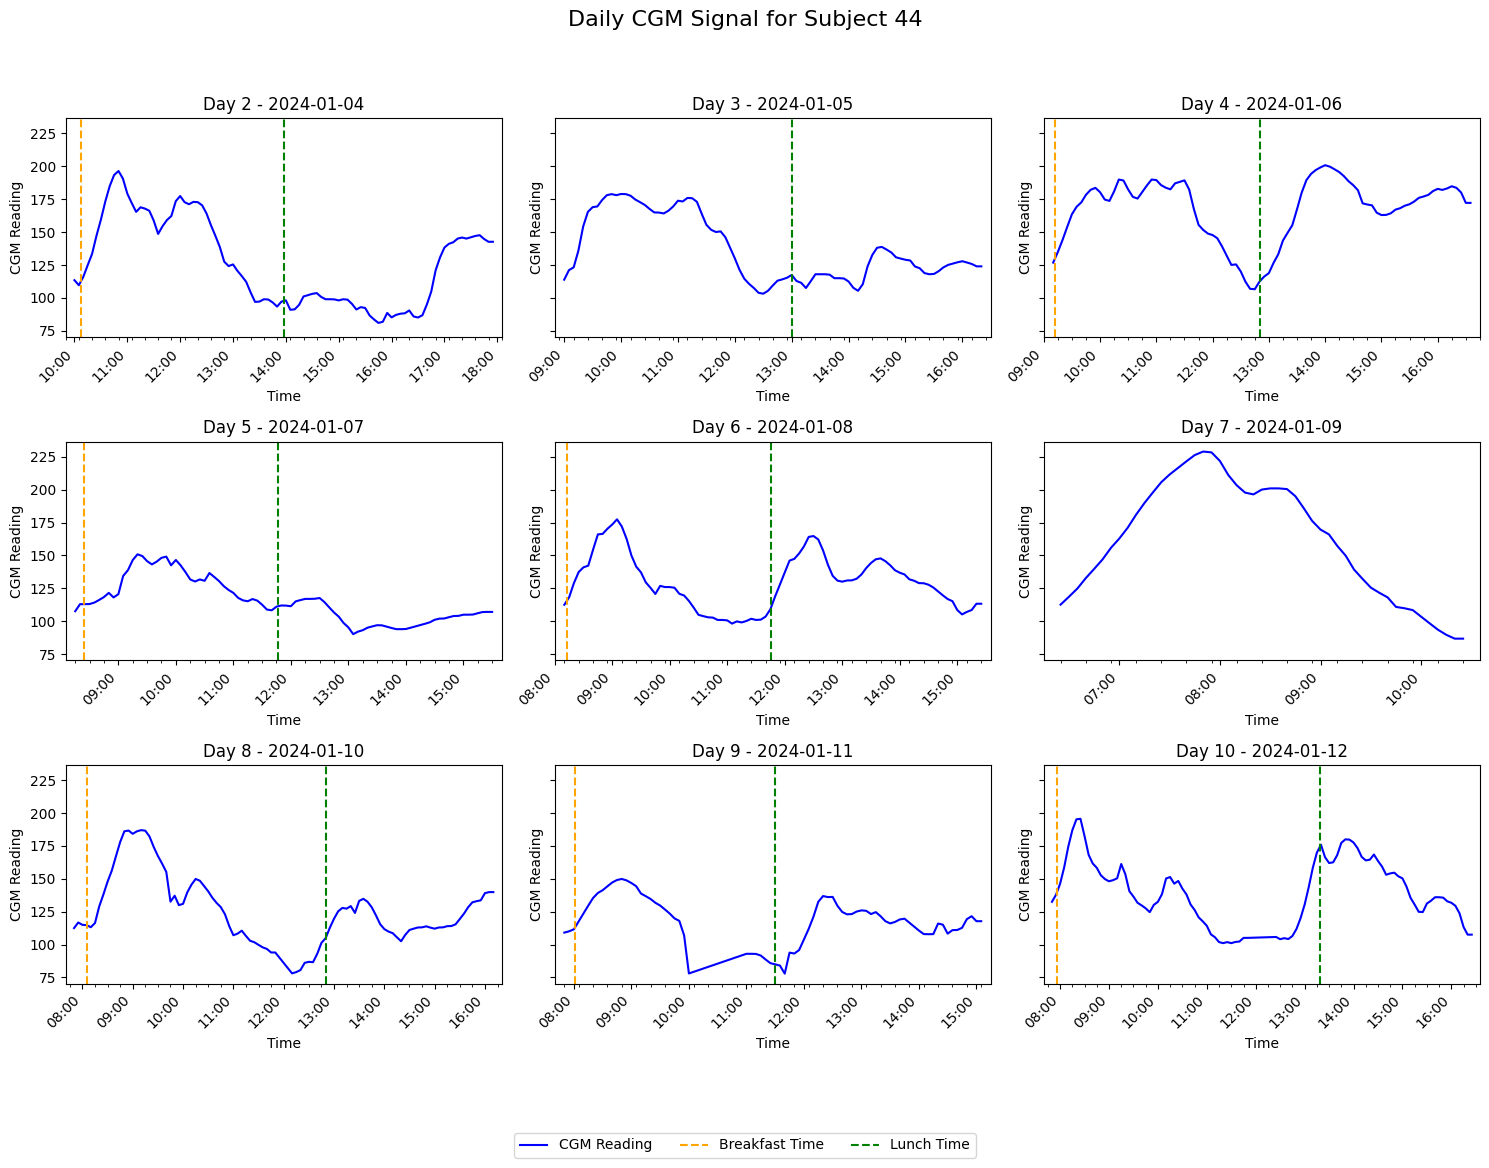

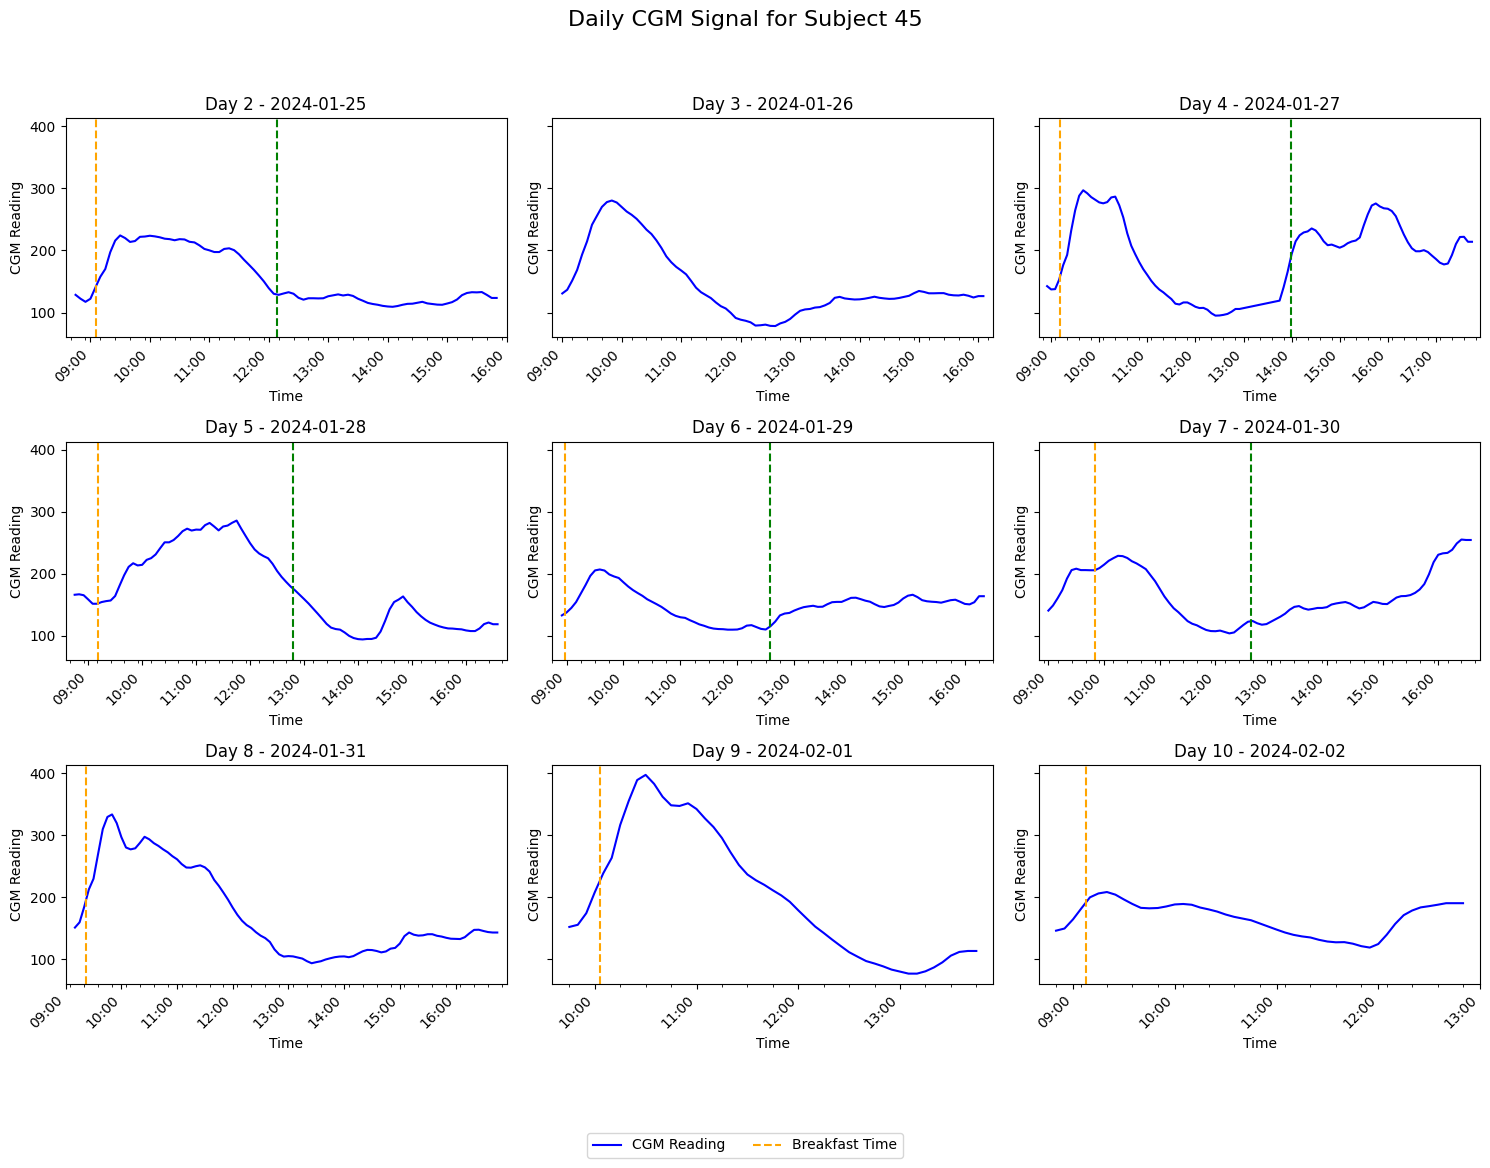

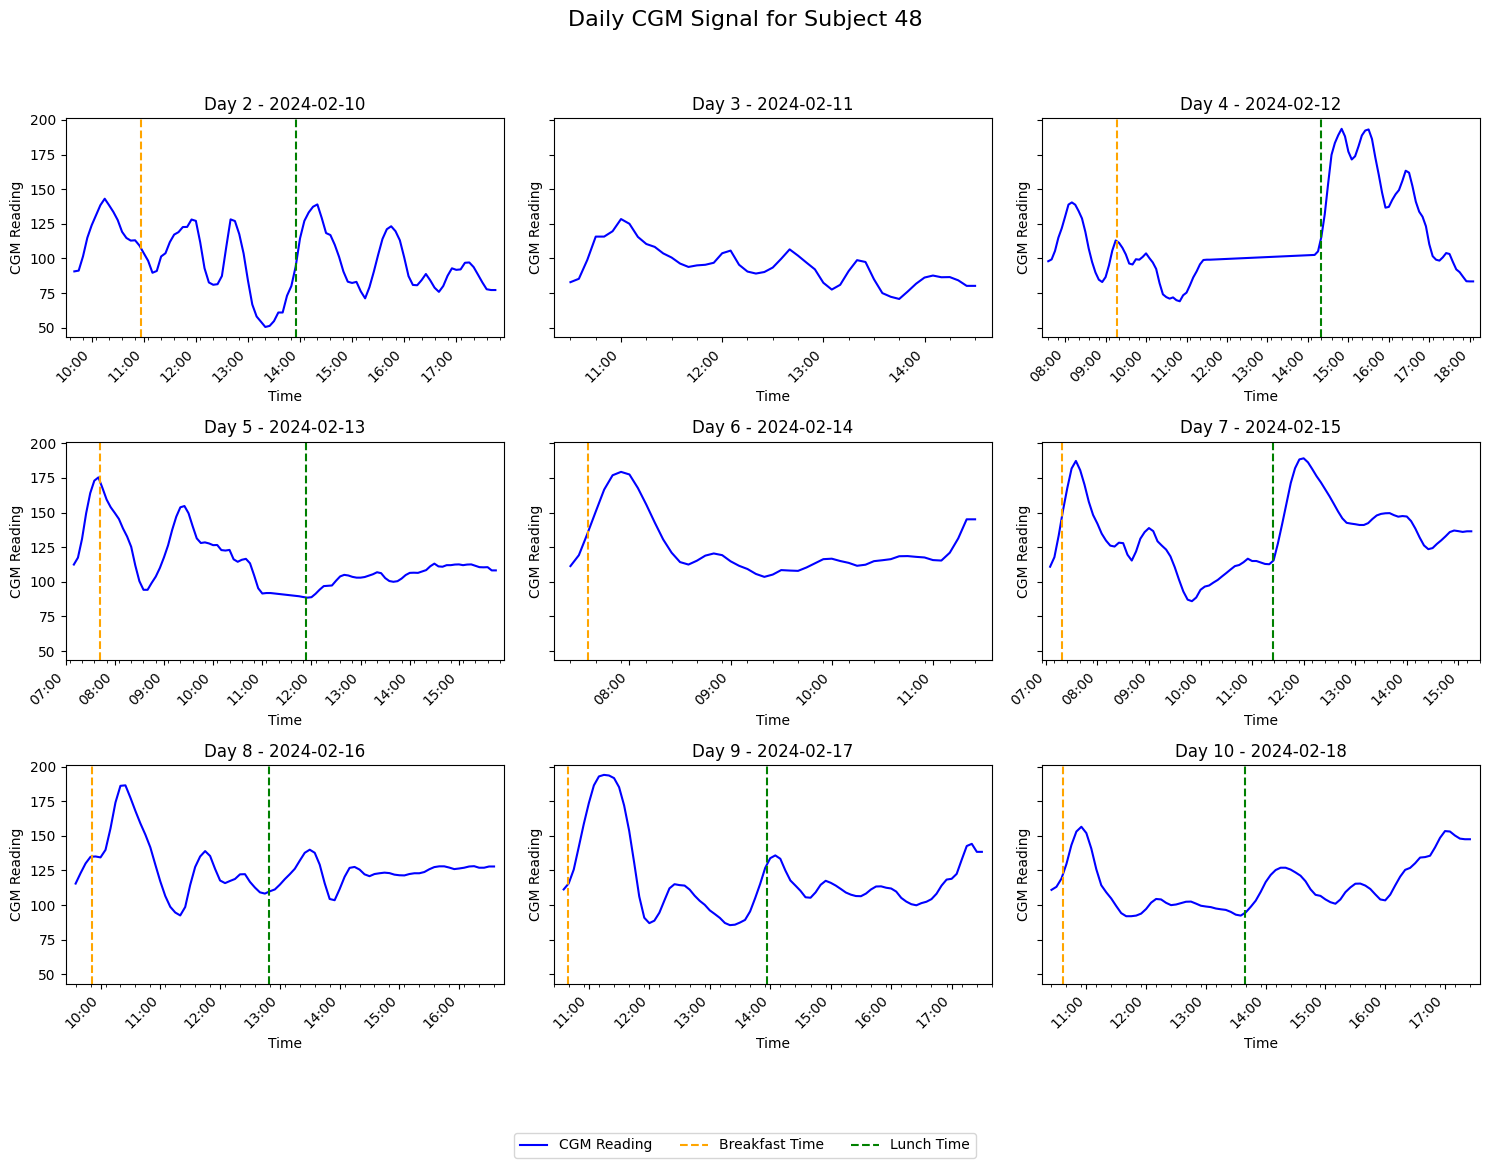

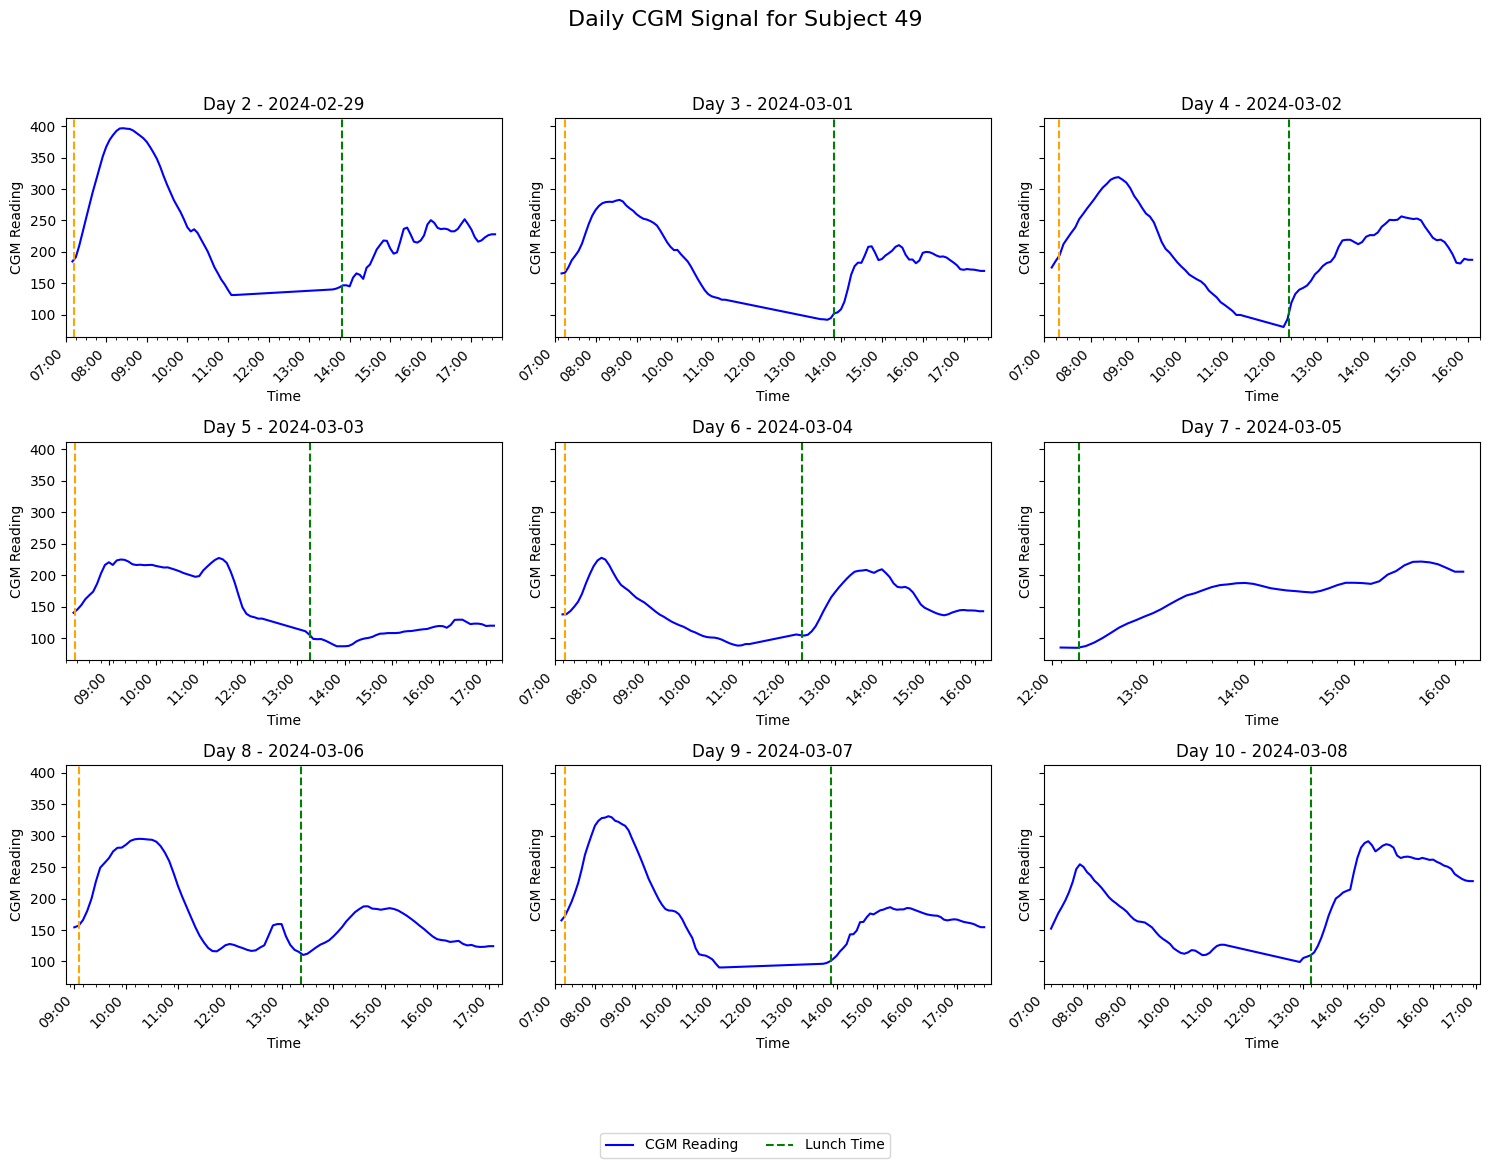

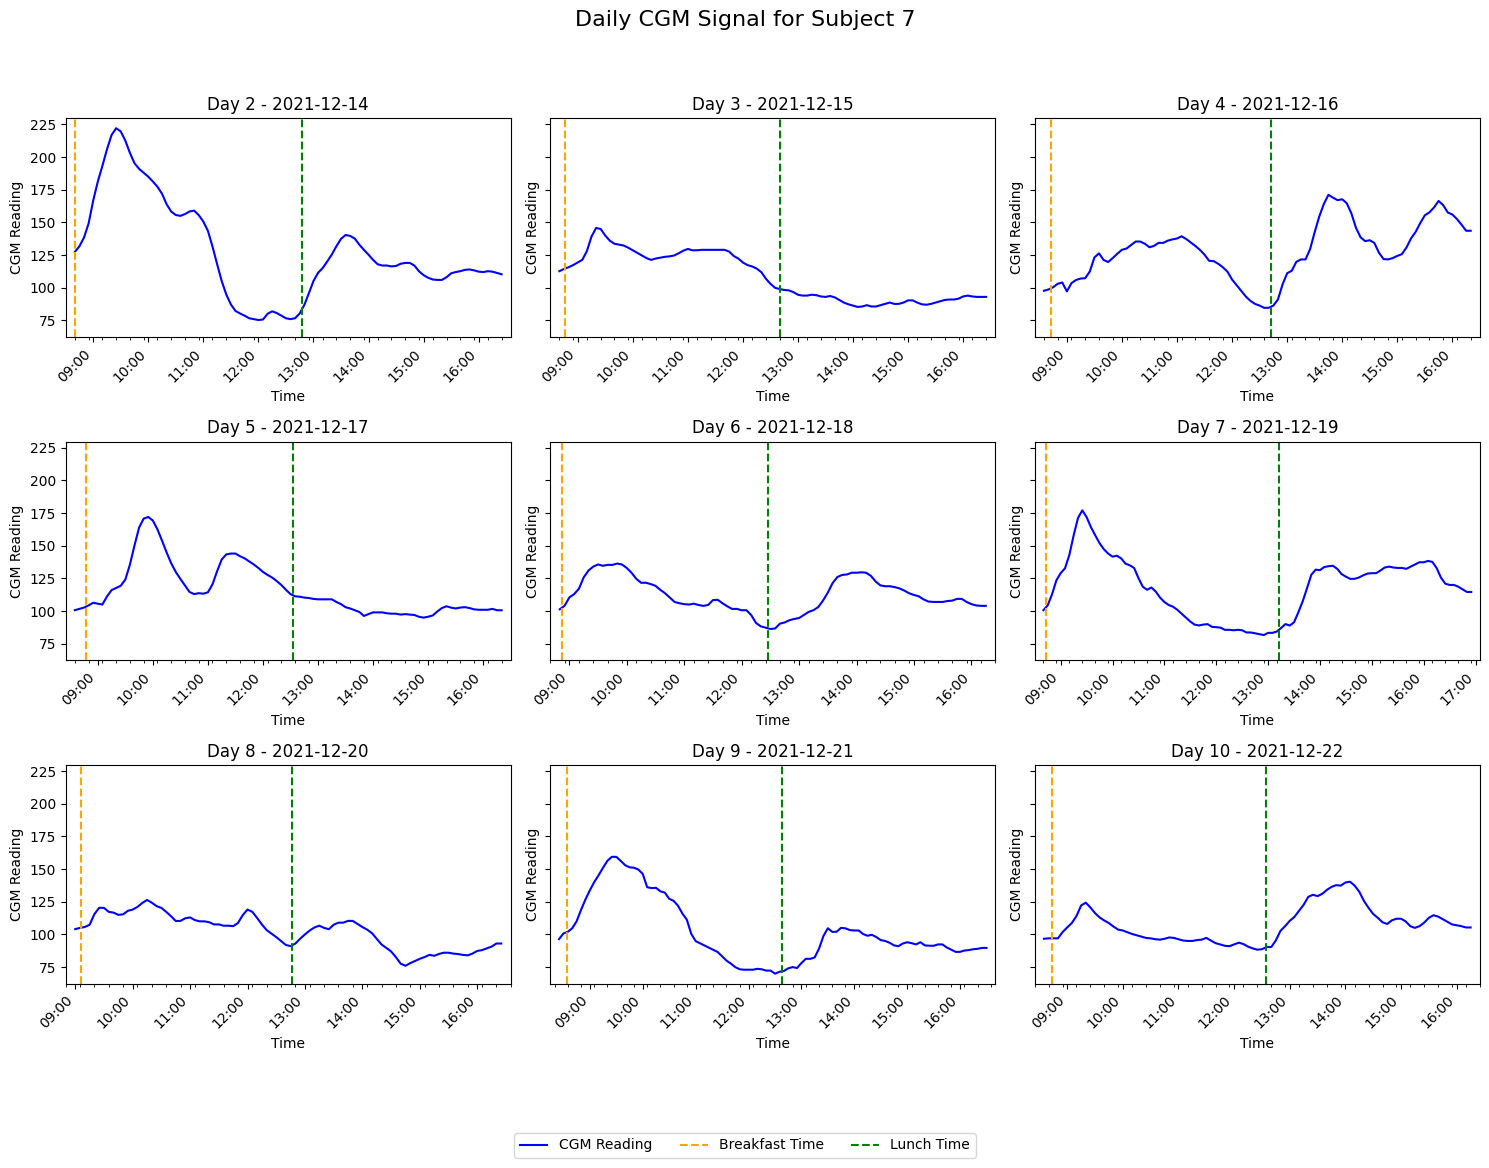

In [17]:
for id in expanded_df["Subject ID"].unique():
    plot_cgm_daily_for_subject(expanded_df, subject_id=id)

## Test Data

In [18]:
data_test = pd.read_csv("../data/cgm_test.csv")
data_test

Subject ID  Day       Breakfast Time           Lunch Time  \
0            4    2  2021-10-02 09:55:00  2021-10-02 13:46:00   
1            4    3  2021-10-03 09:53:00  2021-10-03 13:46:00   
2            4    6  2021-10-06 09:04:00  2021-10-06 12:36:00   
3            4    7  2021-10-07 08:56:00  2021-10-07 12:32:00   
4            4    8  2021-10-08 09:09:00  2021-10-08 12:36:00   
..         ...  ...                  ...                  ...   
68          18    5  2022-04-26 08:30:23  2022-04-26 13:39:53   
69          18    6  2022-04-27 09:17:34  2022-04-27 13:42:28   
70          18    7  2022-04-28 08:21:45  2022-04-28 14:57:13   
71          18    8  2022-04-29 08:52:06  2022-04-29 13:21:09   
72          18   10  2022-05-01 08:41:47  2022-05-01 13:11:54   

                                             CGM Data  
0   [('2021-10-02 09:55:00', 114.68333333333334), ...  
1   [('2021-10-03 09:50:00', 103.0), ('2021-10-03 ...  
2   [('2021-10-06 09:00:00', 96.41), ('2021-10-06 ...  
3   [('2021-10-07 08:50:00', 95.0), ('2021-10-07 0...  
4   [('2021-10-08 09:00:00', 94.13666666666667), (...  
..                                                ...  
68  [('2022-04-26 08:25:00', 142.94), ('2022-04-26...  
69  [('2022-04-27 09:15:00', 138.28333333333333), ...  
70  [('2022-04-28 08:20:00', 138.65666666666667), ...  
71  [('2022-04-29 08:50:00', 143.71666666666667), ...  
72  [('2022-05-01 08:40:00', 142.65666666666667), ...  

[73 rows x 5 columns]

In [19]:
data_test["Subject ID"].nunique()

9

In [20]:
data_test["Subject ID"].value_counts()

Subject ID
21    9
39    9
27    9
43    9
34    8
18    8
47    8
4     7
46    6
Name: count, dtype: int64

In [21]:
expanded_df_test = process_df(data_test)

In [22]:
expanded_df_test

Subject ID  Day      Breakfast Time          Lunch Time  \
0              4    2 2021-10-02 09:55:00 2021-10-02 13:46:00   
1              4    2 2021-10-02 09:55:00 2021-10-02 13:46:00   
2              4    2 2021-10-02 09:55:00 2021-10-02 13:46:00   
3              4    2 2021-10-02 09:55:00 2021-10-02 13:46:00   
4              4    2 2021-10-02 09:55:00 2021-10-02 13:46:00   
...          ...  ...                 ...                 ...   
6896          18   10 2022-05-01 08:41:47 2022-05-01 13:11:54   
6897          18   10 2022-05-01 08:41:47 2022-05-01 13:11:54   
6898          18   10 2022-05-01 08:41:47 2022-05-01 13:11:54   
6899          18   10 2022-05-01 08:41:47 2022-05-01 13:11:54   
6900          18   10 2022-05-01 08:41:47 2022-05-01 13:11:54   

               Timestamp  CGM Reading  
0    2021-10-02 09:55:00   114.683333  
1    2021-10-02 10:00:00   120.913333  
2    2021-10-02 10:05:00   136.006667  
3    2021-10-02 10:10:00   158.143333  
4    2021-10-02 10:15:00   179.093333  
...                  ...          ...  
6896 2022-05-01 16:45:00   132.343333  
6897 2022-05-01 16:50:00   132.000000  
6898 2022-05-01 16:55:00   131.343333  
6899 2022-05-01 17:00:00   129.686667  
6900 2022-05-01 17:05:00   129.686667  

[6901 rows x 6 columns]

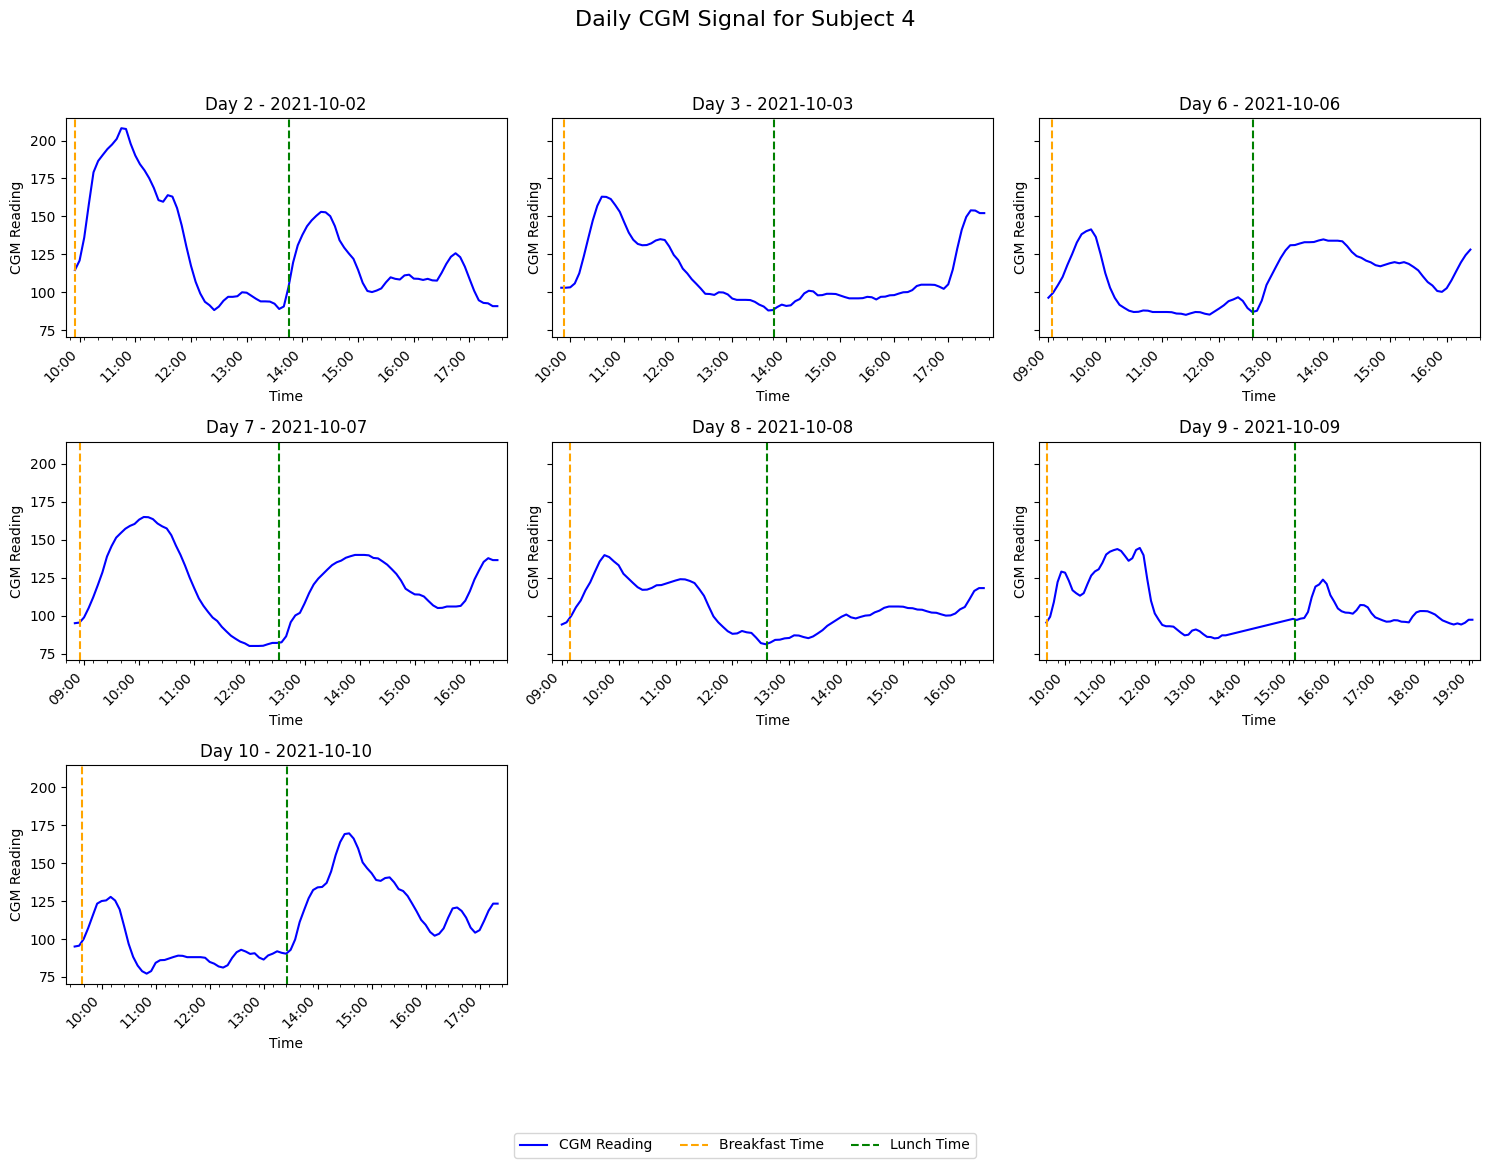

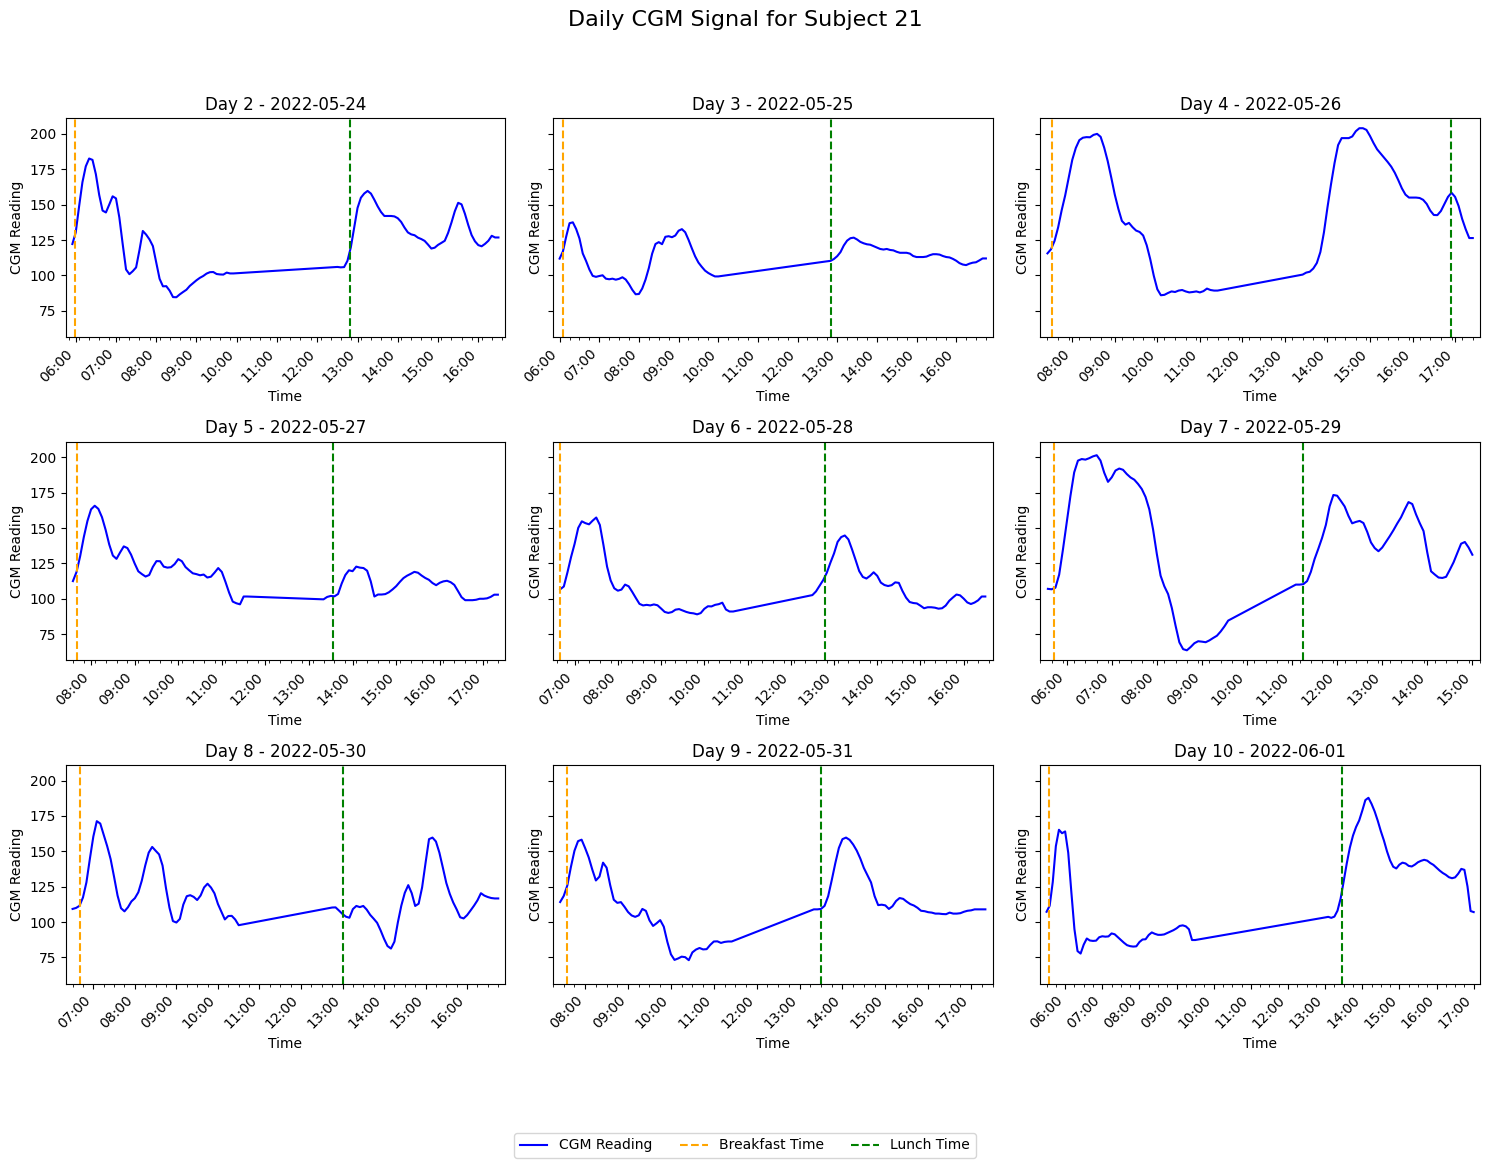

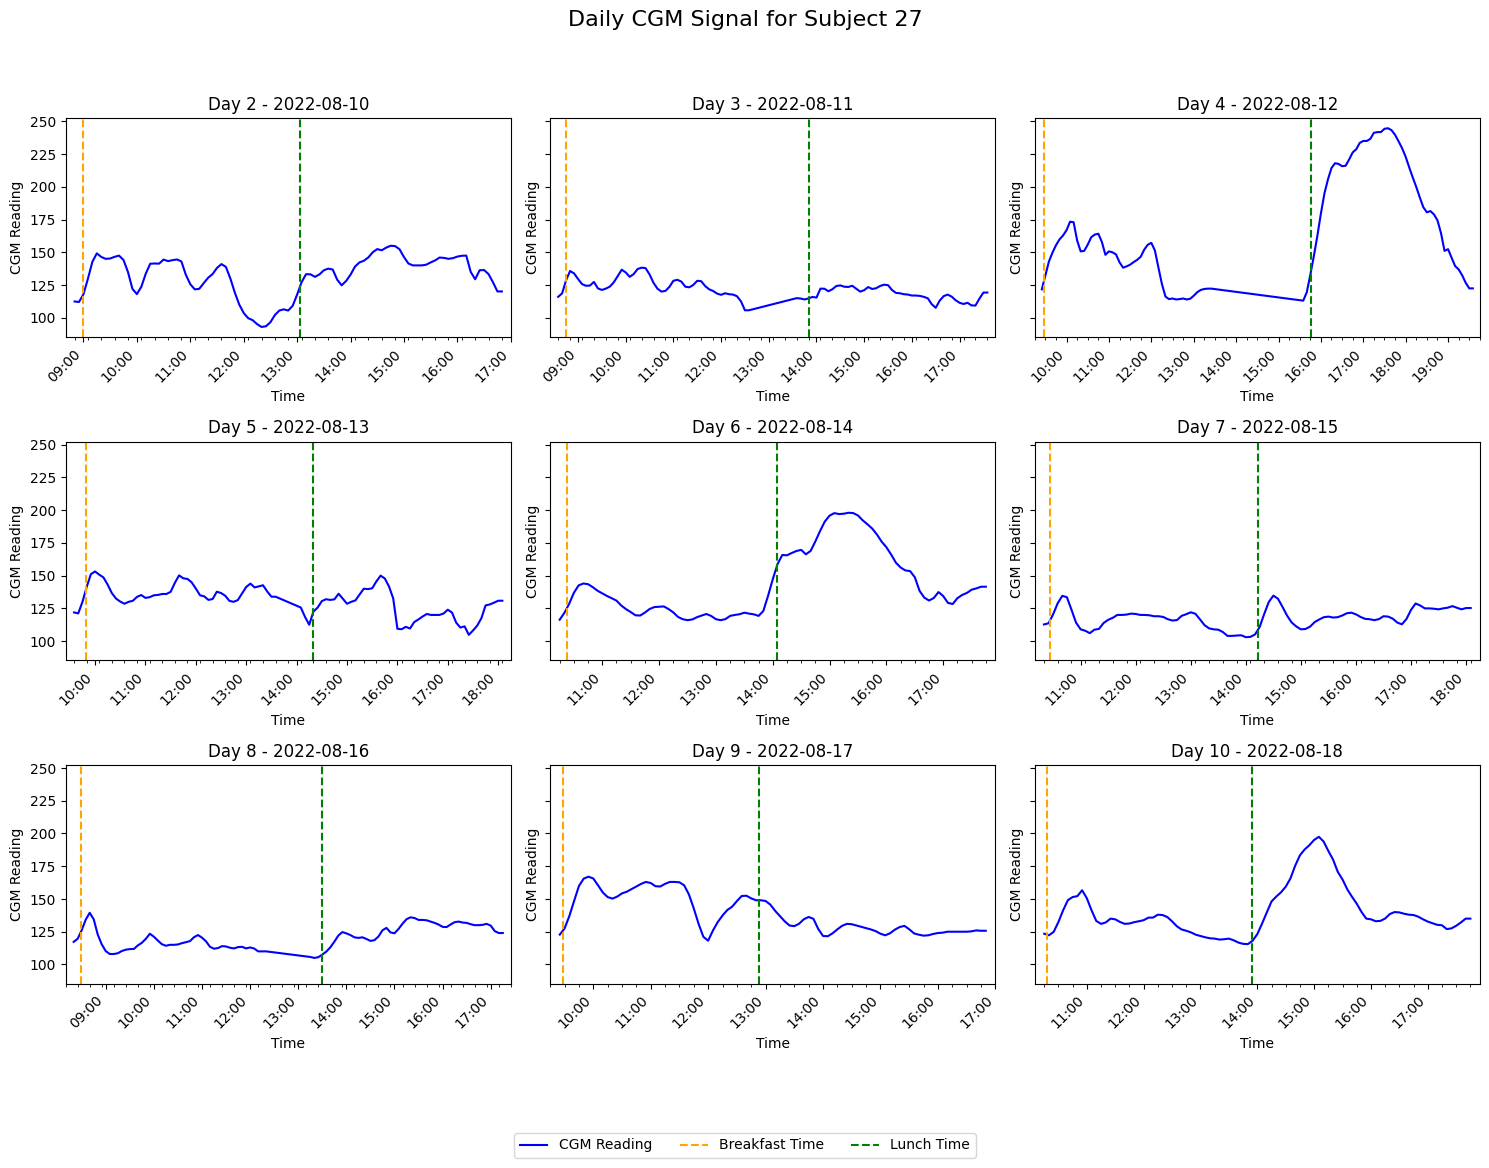

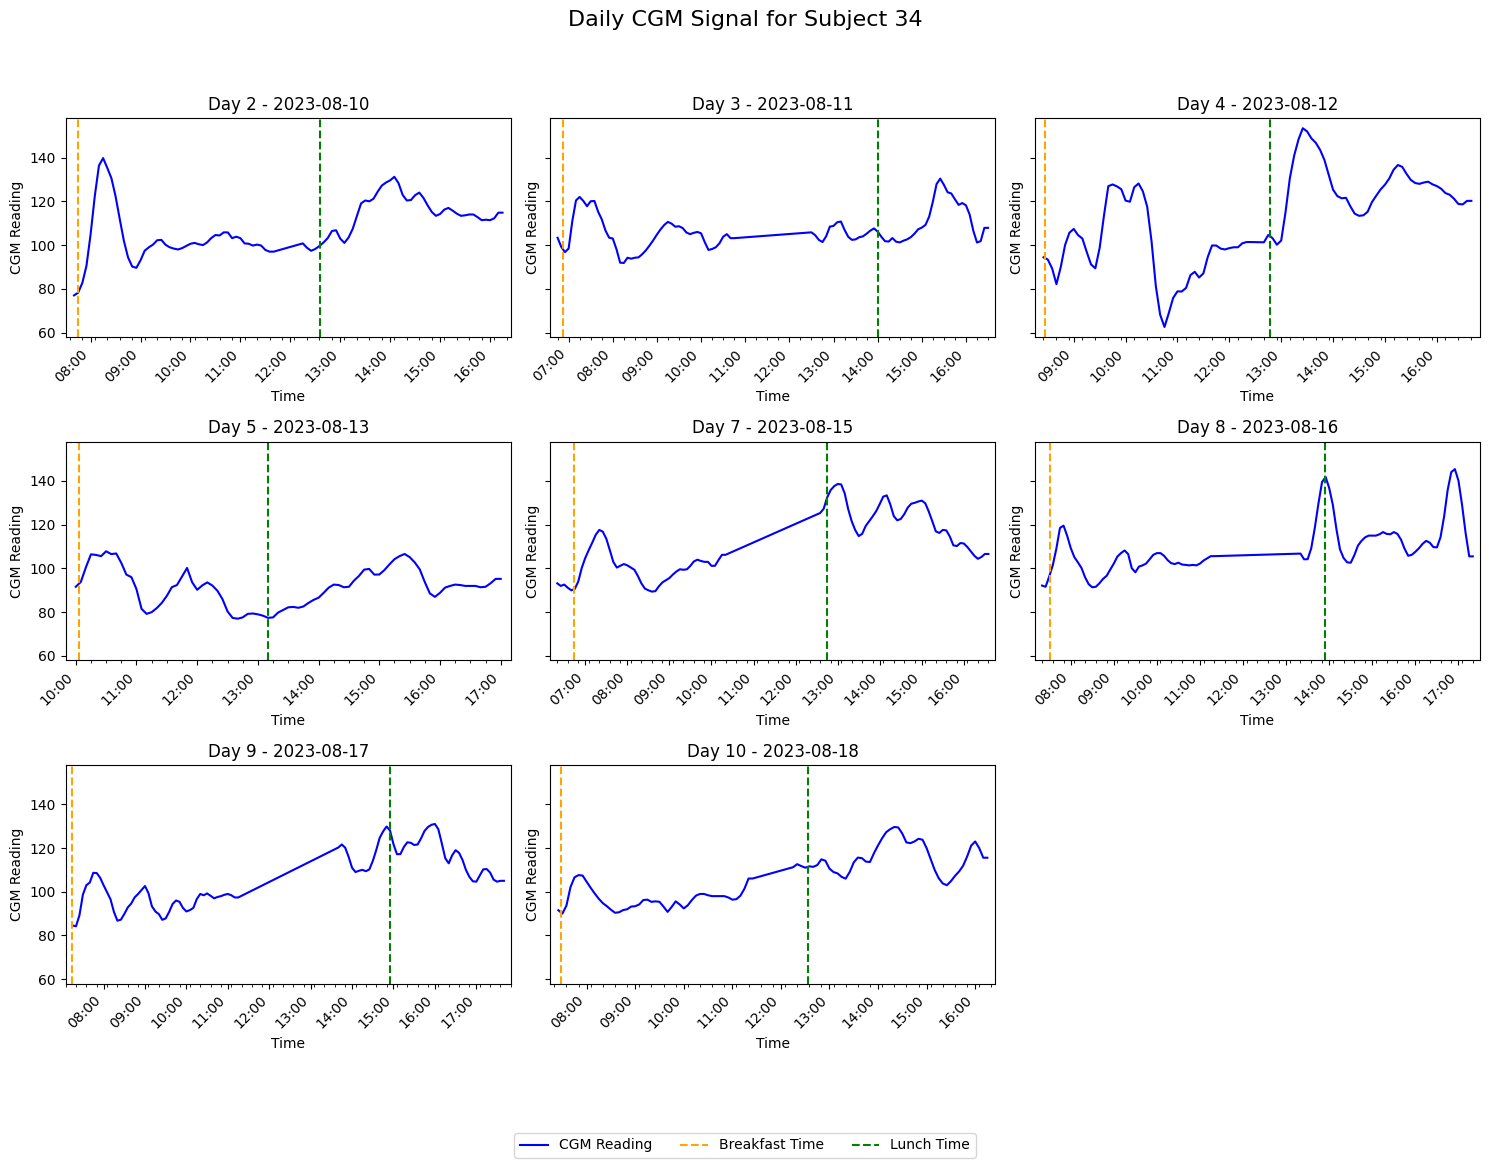

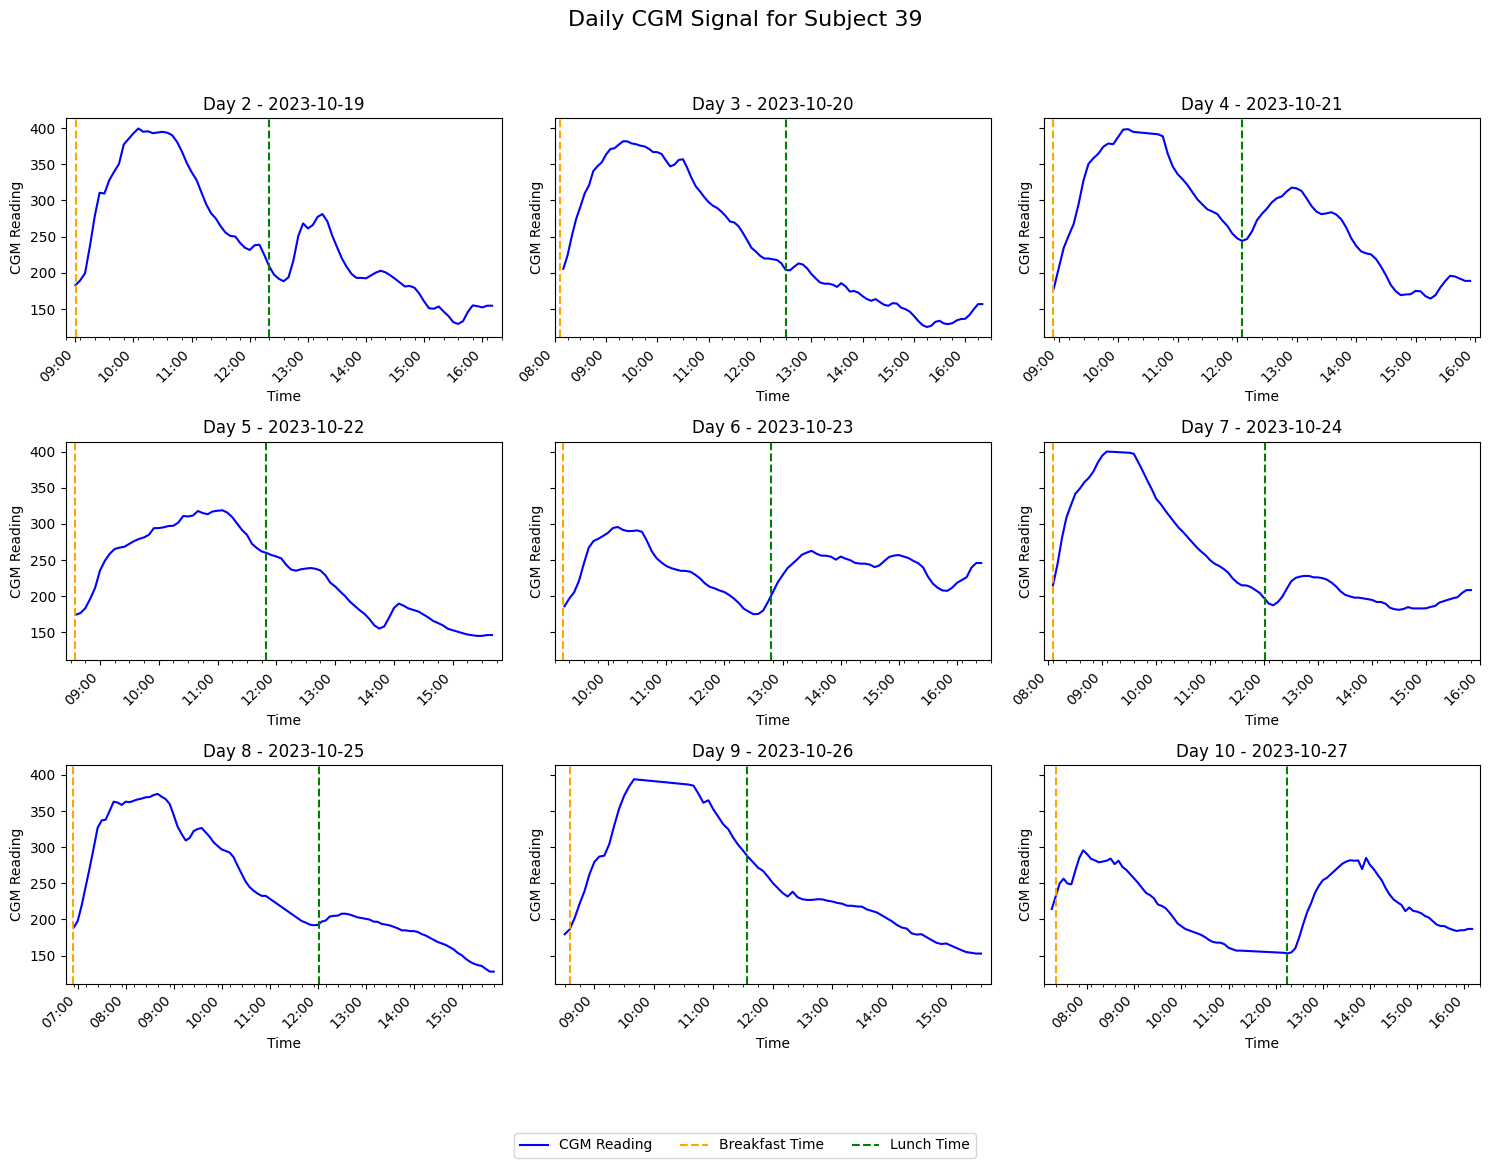

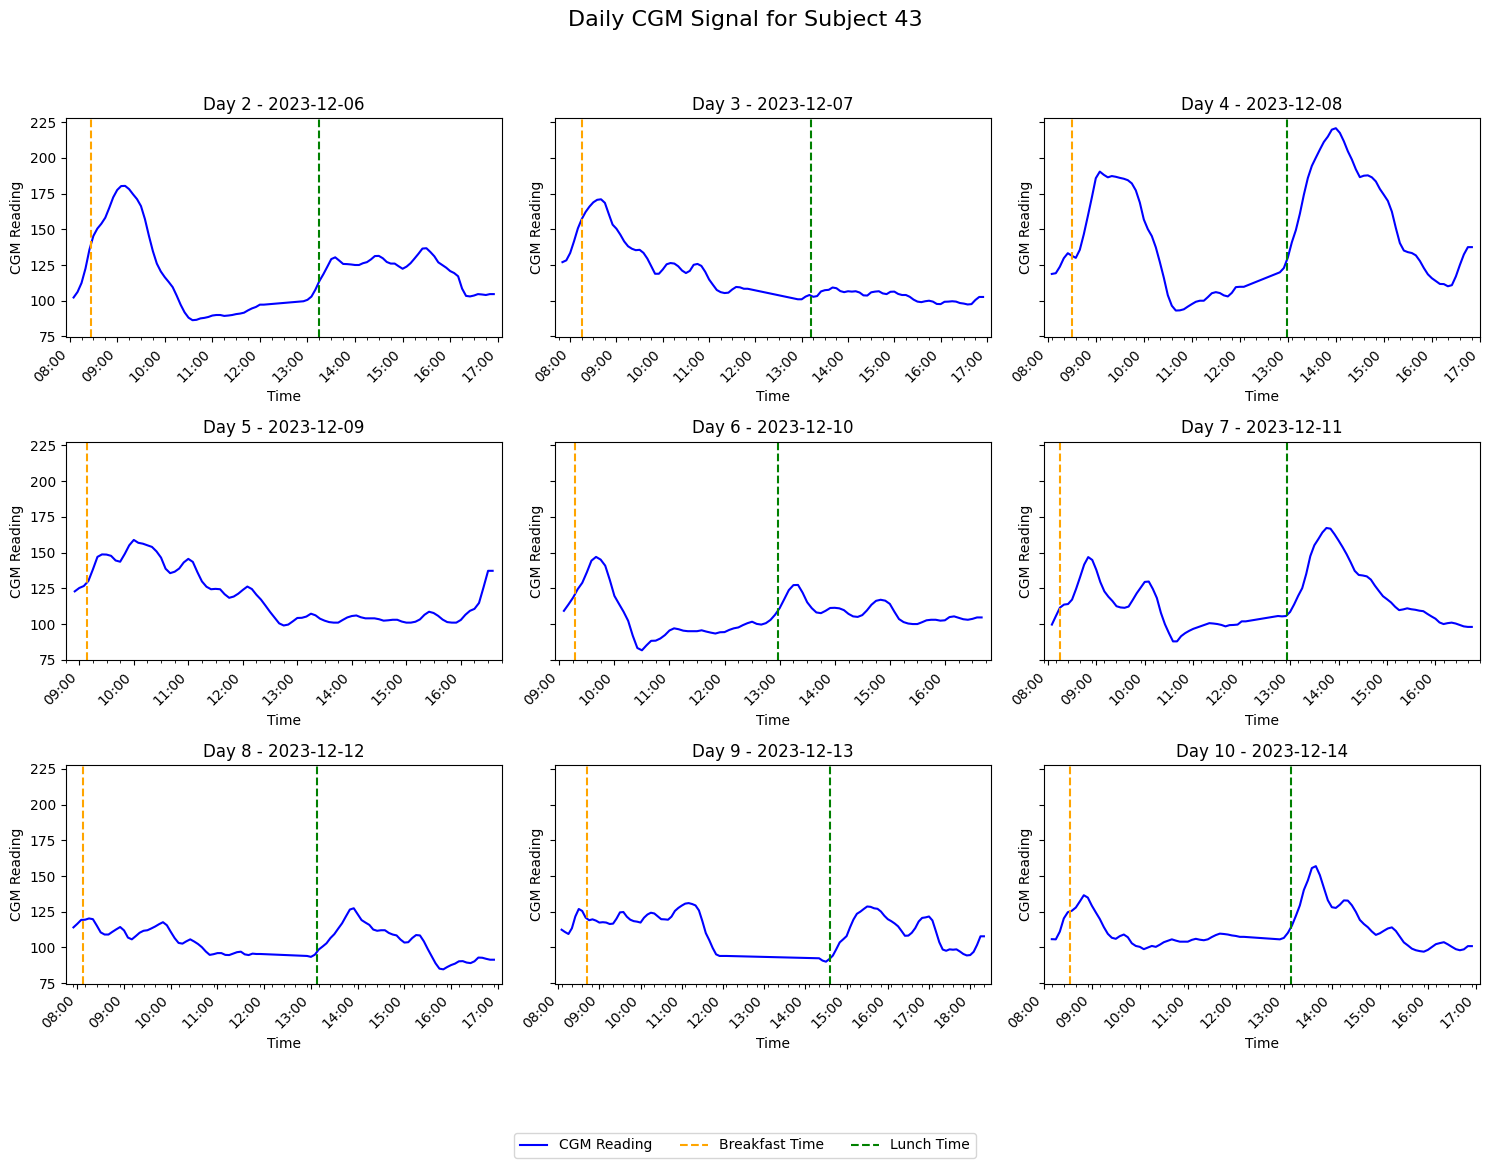

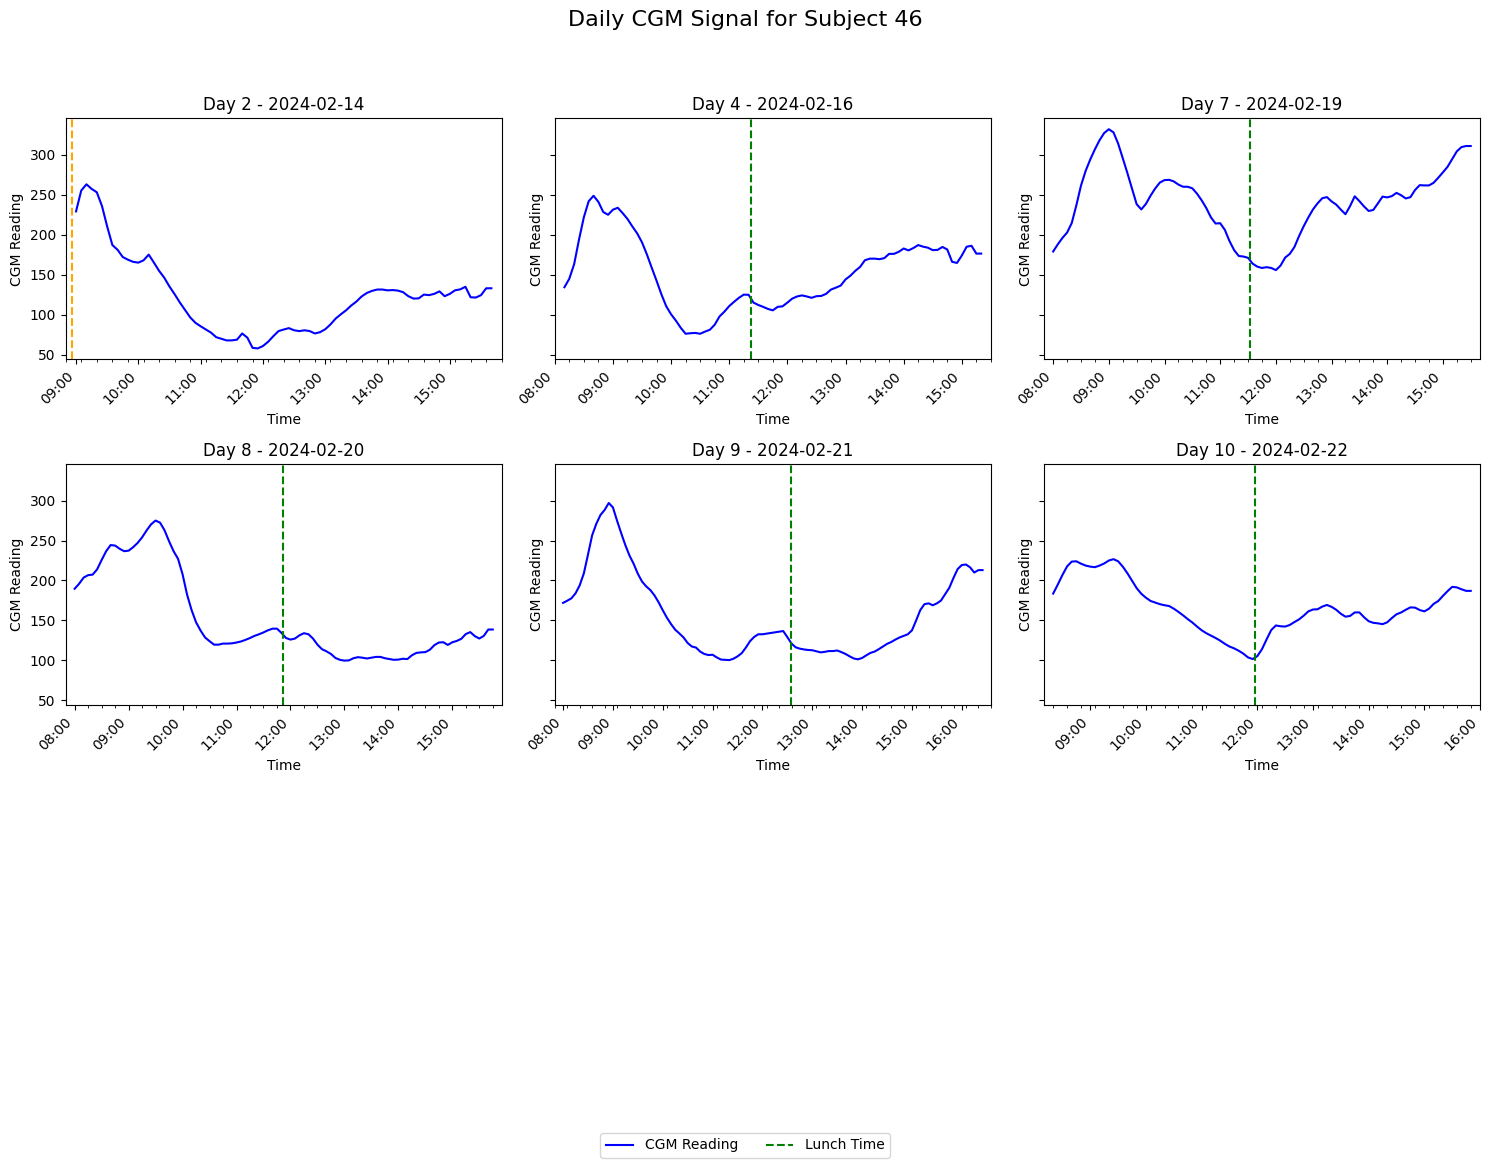

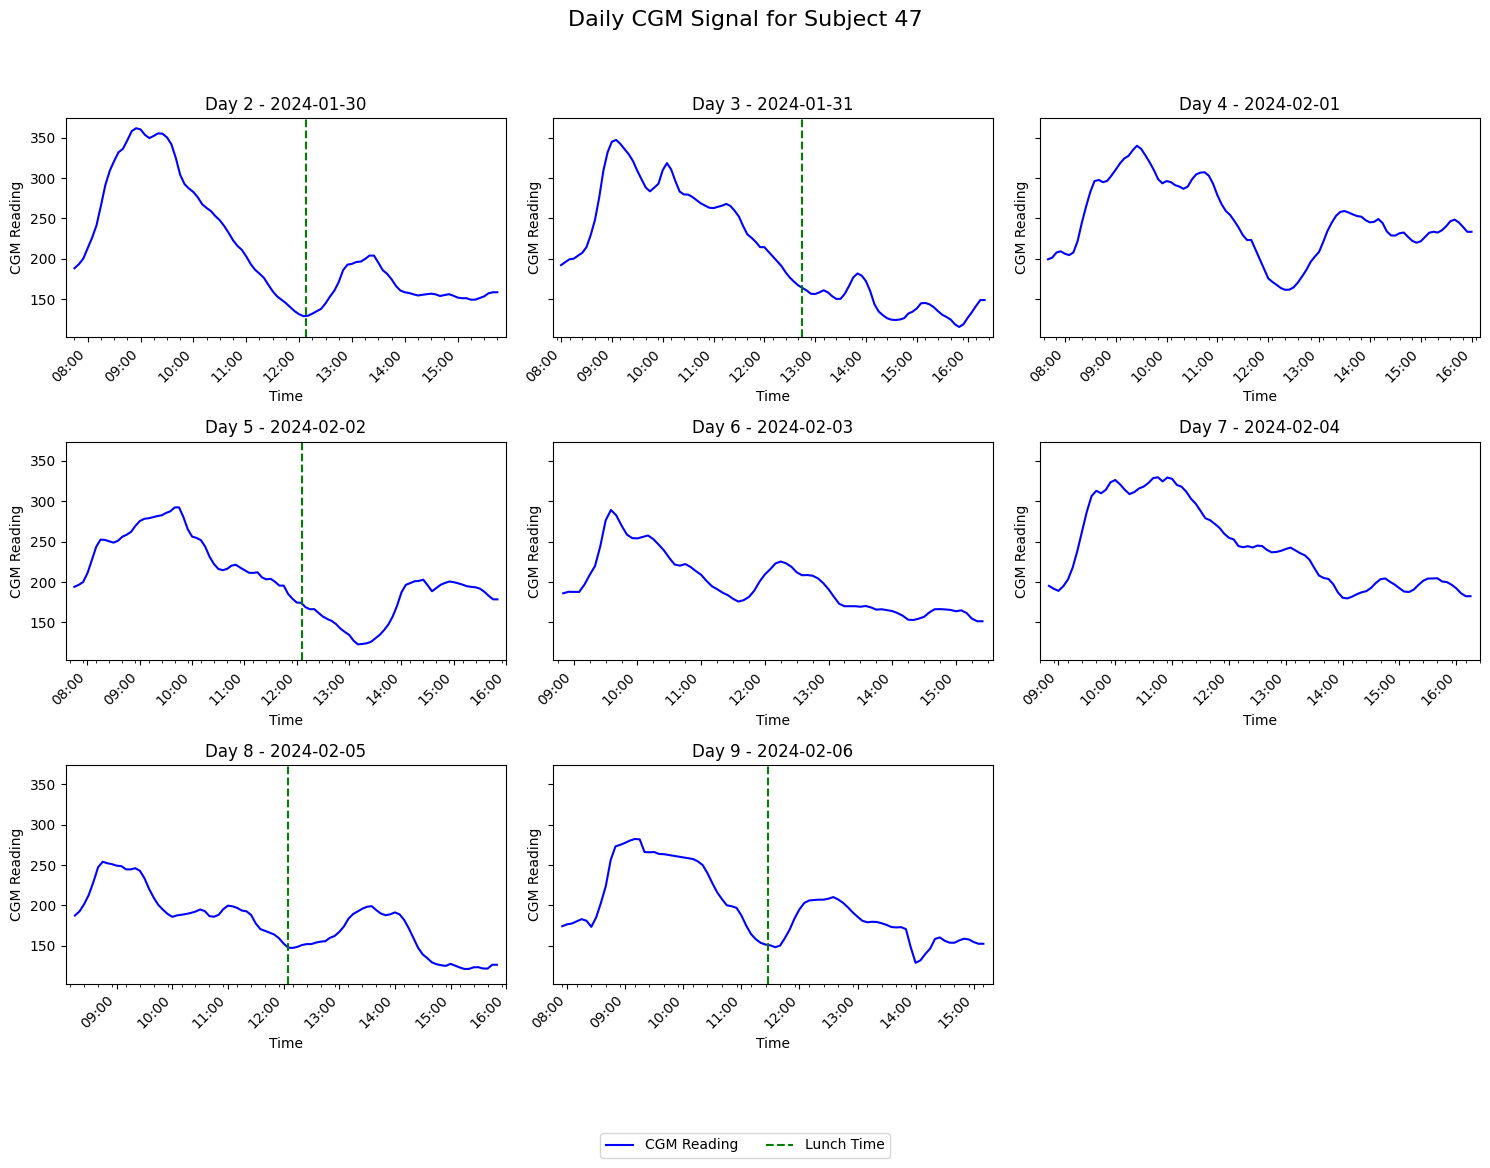

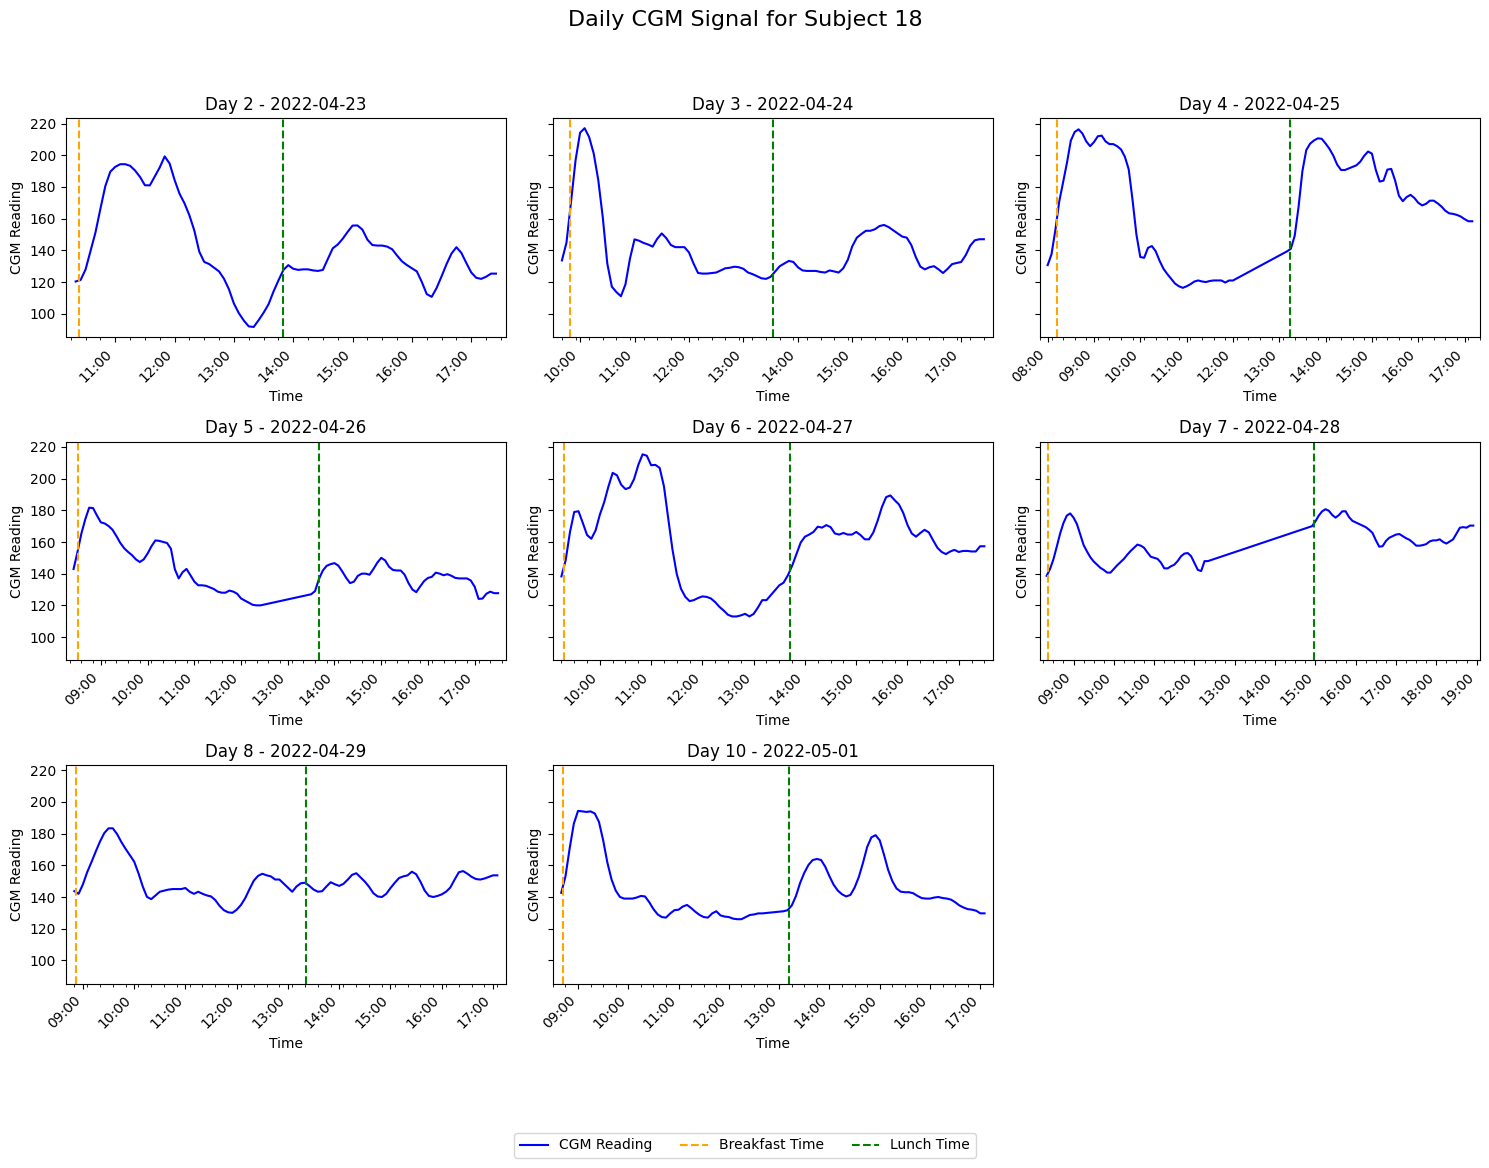

In [23]:
for id in expanded_df_test["Subject ID"].unique():
    plot_cgm_daily_for_subject(expanded_df_test, subject_id=id)

In [24]:
set(expanded_df["Subject ID"].unique()).intersection(set(expanded_df_test["Subject ID"].unique()))

set()

## Key insights
---
* CGM Data split into train vs test by subject IDs. There are 36 person in the training while there are 8 people in the test with no overlap. 
* The days for the studys are not unified across subjects. 
* Most people have 9 days of data, with some exceptions (e.g., only 7 days or 10 days).
* There are some missing data for the breakfast and lunch time for some subjects. 
